# Results visualization

### data files endings:
### _t: transformer
### _c: CNN
### _ct: CNN+transformer no positional encoding in transformer
### _ctp: CNN+ transformer with positional encoding in transformer

## 6 parts in Data visualization.

### PART 1: Different data representations on transformer. <br> PART 2: Different data representations on CNN_transformer with no positional encoding in transformer.<br> PART 3: Different data representations on CNN_transformer with learnable positional encoding in transformer.<br> PART 4: comparison of different models in same data representation <br> PART 5: Validation and testing MSE Comparisons for different representations.(ALL)** <br> PART 6: Converge speed comparison for different models (using original vector as data representation)

## packages

In [2]:
import seaborn as sns
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

In [3]:
print(os.getcwd())

C:\Users\Administrator-1\Desktop\New folder (6)\HI\ML\Experiment_2_10trails


In [4]:
sns.set(style = "whitegrid")
#sns.set_theme()("whitegrid", {'axes.grid' : False})

# Path

In [5]:
cnn_transformer_path =  os.getcwd()+"\\cnn_transformer\\"+"training_process\\"
transformer_path =  os.getcwd()+"\\transformer\\"+"training_process\\"
cnn_transformer_pe_path =  os.getcwd()+"\\cnn_transformer_pe\\"+"training_process\\"
cnn_path = os.getcwd()+"\\CNN_10trails_training_process\\"

# Methods

In [6]:
def plot_vali(x,title):
    x = x[:,1]
    plt.figure(figsize=(7,5))
    plt.title(f'validation performance for {title}')
    plt.plot(x, label='validation MSE',marker='o')
    plt.plot([], [], ' ', label=f"mean={round(np.mean(x),6)}")
    plt.plot([], [], ' ', label=f"std={round(np.std(x),6)}")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.grid()
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.grid()
    plt.legend()
    plt.show()
    print("validation mean=",np.mean(x))
    print("validation std=",np.std(x))

In [7]:
def plot_test(x,title):
    x = x[:,2]
    plt.figure(figsize=(7,5))
    plt.title(f'testing performance for {title}')
    plt.plot(x, label='testing MSE',marker='o')
    plt.plot([], [], ' ', label=f"mean={round(np.mean(x),6)}")
    plt.plot([], [], ' ', label=f"std={round(np.std(x),6)}")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.grid()
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()
    plt.show()
    print("test mean=",np.mean(x))
    print("test std=",np.std(x))

In [8]:
def plot_vali_test(x,title):
    x1 = x[:, 1]
    x2 = x[:, 2]
    plt.figure(figsize=(7,5))
    plt.title(f'Testing and validation for {title}')
    plt.plot(x1, label='validation MSE',marker='o')
    plt.plot(x2, label='testing MSE',marker='o')
    #plt.plot([], [], ' ', label=f"mean={round(np.mean(x),6)}")
    #plt.plot([], [], ' ', label=f"std={round(np.std(x),6)}")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.grid()
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()
    plt.show()
    #print("validation mean=",np.mean(x))
    #print("validation std=",np.std(x))

In [9]:
def vali_mse_comparison(mse_dict):
    plt.figure(figsize=(7,5))
    for x,y in mse_dict.items():
        y = y.to_numpy(copy=True)
        y = y[:,1]
        plt.plot(y, label=x,marker='o')
        plt.grid()
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.title(f'validation MSE by different representations')
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.legend(prop={'size': 8})
    

In [10]:
def test_mse_comparison(mse_dict):
    plt.figure(figsize=(7,5))
    for x,y in mse_dict.items():
        y= y.to_numpy(copy=True)
        y = y[:,2]
        plt.plot(y, label=x,marker='o')
    plt.grid()
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.title(f'testing MSE by different representations')
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.grid()
    plt.legend(prop={'size': 8})

In [11]:
def boxplot_vali(dictt, showmean):
    plt.figure(figsize=(9,5))
    A = []
    labelss = []
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        y = y[:,1]
        A.append(y)
        labelss.append(x)
    ax = sns.boxplot(A, showmeans=showmean)
    ax.grid()
    ax.set_xticklabels(labelss, rotation=45)
    plt.title(f'validation MSE boxplot')
    plt.ylabel('MSE')
    plt.show()

In [12]:
def boxplot_test(dictt, showmean):
    plt.figure(figsize=(9,5))
    A = []
    labelss = []
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        y = y[:,2]
        A.append(y)
        labelss.append(x)
    ax = sns.boxplot(A, showmeans=showmean)
    ax.grid()
    ax.set_xticklabels(labelss, rotation=45)
    plt.title(f'testing MSE boxplot')
    plt.ylabel('MSE')
    plt.show()

## Methods for comparing different methods

In [13]:
def compare_10_trails(dictt,title,test):
    plt.figure(figsize=(7,5))
    if(test==False):
        plt.title(f'validation MSE for {title}')
    else:
        plt.title(f'testing MSE for {title}')
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        if(test==False):
            y = y[:,1]
        elif(test==True):
            y = y[:,2]
        plt.plot(y, label=x,marker='o')
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.grid()
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.grid()
    plt.legend()
    plt.show()
    for x, y in dictt.items():
        y= y.to_numpy(copy=True)
        if(test==False):
            y = y[:,1]
        elif(test==True):
            y = y[:,2]
        if(test==True):
            print(f" for {x} testing: mean={np.mean(y):.6f}, std={np.std(y):.6f} ")
        else:
            print(f" for {x} validation: mean={np.mean(y):.6f}, std={np.std(y):.6f} ")

# Read CSV

In [149]:
s1_index_concatenate_ct = pd.read_csv(cnn_transformer_path + "s1_index_concatenate_ct.csv")
s2_no_pe_ct = pd.read_csv(cnn_transformer_path+"s2_no_pe_ct.csv")
s3_polynomial_1_ct = pd.read_csv(cnn_transformer_path+ "s3_polynomial_1_ct.csv")
s4_polynomial_0_ct = pd.read_csv(cnn_transformer_path+ "s4_polynomial_0_ct.csv")
s5_index_add_ct = pd.read_csv(cnn_transformer_path+ "s5_index_add_ct.csv")
s6_learnable_add_ct = pd.read_csv(cnn_transformer_path+ "s6_learnable_add_ct.csv")
s7_sin_add_ct = pd.read_csv(cnn_transformer_path+ "s7_sin_add_ct.csv")
s8_sin_concatenate_ct = pd.read_csv(cnn_transformer_path+ "s8_sin_concatenate_ct.csv")

In [150]:
s1_index_concatenate_ctp = pd.read_csv(cnn_transformer_pe_path + "s1_index_concatenate_ctp.csv")
s2_no_pe_ctp = pd.read_csv(cnn_transformer_pe_path+"s2_no_pe_ctp.csv")
s3_polynomial_1_ctp = pd.read_csv(cnn_transformer_pe_path+ "s3_polynomial_1_ctp.csv")
s4_polynomial_0_ctp = pd.read_csv(cnn_transformer_pe_path+ "s4_polynomial_0_ctp.csv")
s5_index_add_ctp = pd.read_csv(cnn_transformer_pe_path+ "s5_index_add_ctp.csv")
s6_learnable_add_ctp = pd.read_csv(cnn_transformer_pe_path+ "s6_learnable_add_ctp.csv")
s7_sin_add_ctp = pd.read_csv(cnn_transformer_pe_path+ "s7_sinusoidal_add_ctp.csv")
s8_sin_concatenate_ctp = pd.read_csv(cnn_transformer_pe_path+ "s8_sinusoidal_concatenate_ctp.csv")

In [151]:
s1_index_concatenate_t = pd.read_csv(transformer_path + "s1_index_concatenate.csv")
s2_no_pe_t = pd.read_csv(transformer_path+"s2_no_pe.csv")
s3_polynomial_1_t = pd.read_csv(transformer_path+ "s3_polynomial_1.csv")
#s4_polynomial_0_t = pd.read_csv(transformer_path+ "s4_index_add.csv")
s5_index_add_t = pd.read_csv(transformer_path+ "s4_index_add.csv")
s6_learnable_add_t = pd.read_csv(transformer_path+ "s5_learnable.csv")
s7_sin_add_t = pd.read_csv(transformer_path+ "s6_sinusoidal_add.csv")
s8_sin_concatenate_t = pd.read_csv(transformer_path+ "s7_sinusoidal_concatenate.csv")
s9_origina_pe_t = pd.read_csv(transformer_path+ "s8_original_pe.csv")

In [152]:
s1_index_concatenate_c = pd.read_csv(cnn_path + "index_concatenate_s2.csv")
s2_no_pe_c = pd.read_csv(cnn_path+"no_pe_s2.csv")
s3_polynomial_1_c = pd.read_csv(cnn_path+ "polynomial_1_s2.csv")
s4_polynomial_0_c = pd.read_csv(cnn_path+ "polynomial_0_s2.csv")
s5_index_add_c = pd.read_csv(cnn_path+ "index_add_s2.csv")
s6_learnable_add_c = pd.read_csv(cnn_path+ "learnable_adding_s2.csv")
s7_sin_add_c = pd.read_csv(cnn_path+ "sinusoidal_add_s2.csv")
s8_sin_concatenate_c = pd.read_csv(cnn_path+ "sinusoidal_concatenate_s2.csv")

## PART 1: Different data representations on transformer.

In [18]:
mse_dict = {
    "s1_index_concatenate_t": s1_index_concatenate_t,
    "s2_no_pe_t": s2_no_pe_t,
    "s3_polynomial_1_t": s3_polynomial_1_t,
    "s5_index_add_t": s5_index_add_t, 
    "s6_learnable_add_t":s6_learnable_add_t,
    "s7_sin_add_t":s7_sin_add_t, 
    "s8_sin_concatenate_t":s8_sin_concatenate_t,
    's9_origina_pe_t':s9_origina_pe_t,
}

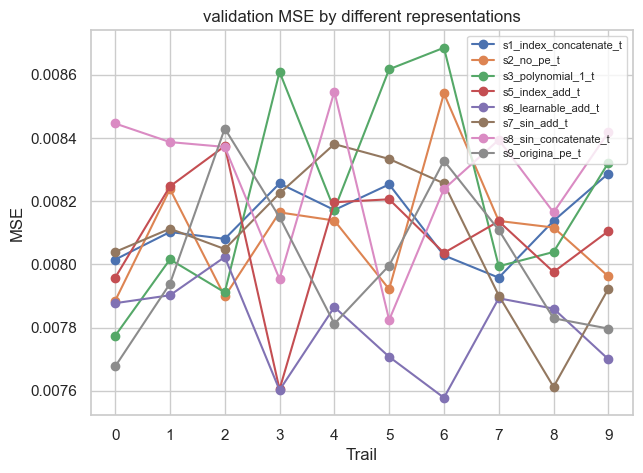

In [19]:
vali_mse_comparison(mse_dict)

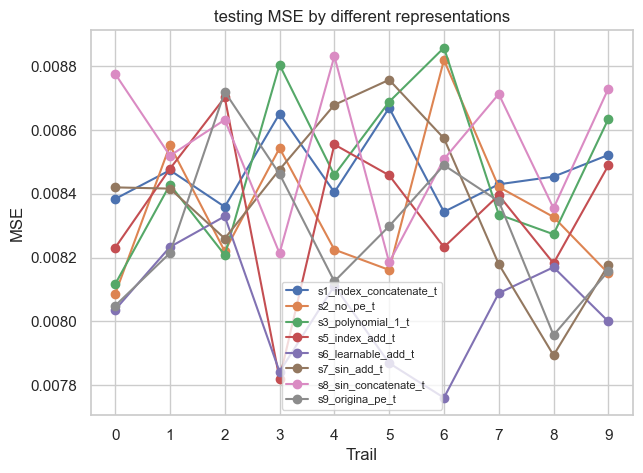

In [20]:
test_mse_comparison(mse_dict)

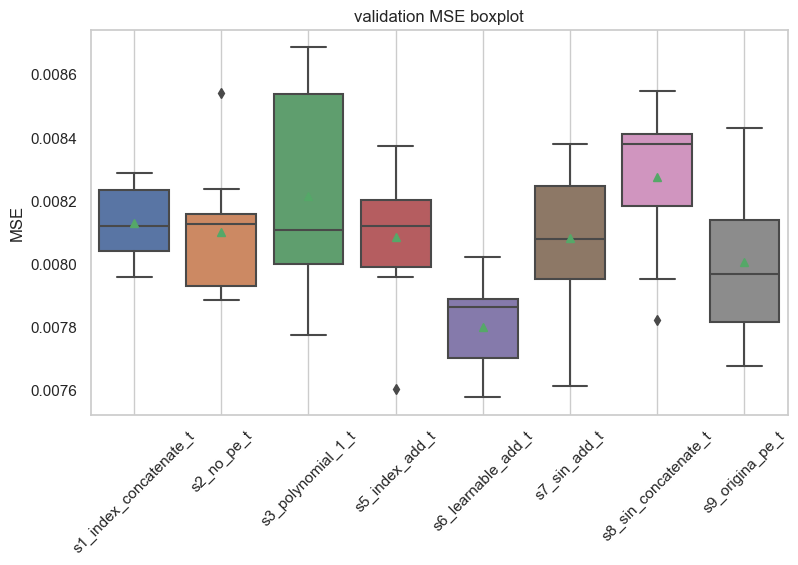

In [21]:
boxplot_vali(mse_dict, True)

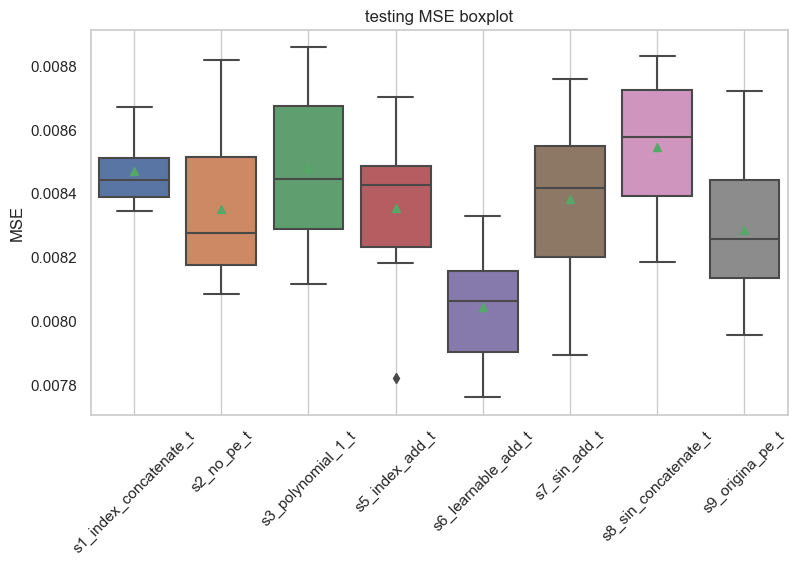

In [22]:
boxplot_test(mse_dict, True)

### The mean and std of each representations

In [23]:
def get_mean_std(x):
    #x = x.to_numpy(copy=True)
    return np.mean(x), np.std(x)

In [24]:
print("validation performance")
for x,y in mse_dict.items():
    y = y.to_numpy(copy=True)
    validation_mse = y[:,1]
    test_mse = y[:,2] 
    m1 ,s1 = get_mean_std(validation_mse)
    m2 ,s2 = get_mean_std(test_mse)
    print(f" mean={m1:.6f}, std={s1:.6f}  for {x}")

validation performance
 mean=0.008129, std=0.000107  for s1_index_concatenate_t
 mean=0.008100, std=0.000189  for s2_no_pe_t
 mean=0.008214, std=0.000309  for s3_polynomial_1_t
 mean=0.008084, std=0.000200  for s5_index_add_t
 mean=0.007801, std=0.000138  for s6_learnable_add_t
 mean=0.008083, std=0.000220  for s7_sin_add_t
 mean=0.008274, std=0.000219  for s8_sin_concatenate_t
 mean=0.008006, std=0.000232  for s9_origina_pe_t


In [25]:
print("testing performance")
for x,y in mse_dict.items():
    y = y.to_numpy(copy=True)
    test_mse = y[:,2] 
    m1 ,s1 = get_mean_std(test_mse)
    print(f" mean={m1:.6f}, std={s1:.6f}  for {x}")

testing performance
 mean=0.008469, std=0.000108  for s1_index_concatenate_t
 mean=0.008350, std=0.000219  for s2_no_pe_t
 mean=0.008480, std=0.000242  for s3_polynomial_1_t
 mean=0.008354, std=0.000235  for s5_index_add_t
 mean=0.008044, std=0.000171  for s6_learnable_add_t
 mean=0.008383, std=0.000248  for s7_sin_add_t
 mean=0.008546, std=0.000220  for s8_sin_concatenate_t
 mean=0.008285, std=0.000219  for s9_origina_pe_t


## PART 2: Different data representations on CNN_transformer with no positional encoding in transformer.

In [26]:
mse_dict = {
    "s1_index_concatenate_ct": s1_index_concatenate_ct,
    "s2_no_pe_ct": s2_no_pe_ct,
    "s3_polynomial_1_ct": s3_polynomial_1_ct,
    "s4_polynomial_0_ct": s4_polynomial_0_ct, 
    "s5_index_add_ct":s5_index_add_ct,
    "s6_learnable_add_ct":s6_learnable_add_ct, 
    "s7_sin_add_ct":s7_sin_add_ct,
    's8_sin_concatenate_ct':s8_sin_concatenate_ct,
}

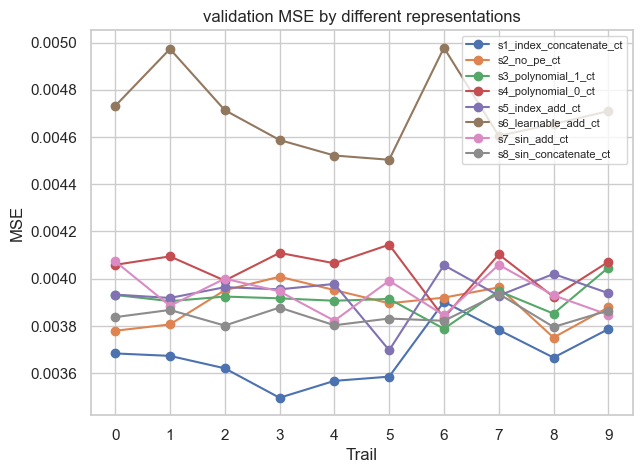

In [27]:
vali_mse_comparison(mse_dict)

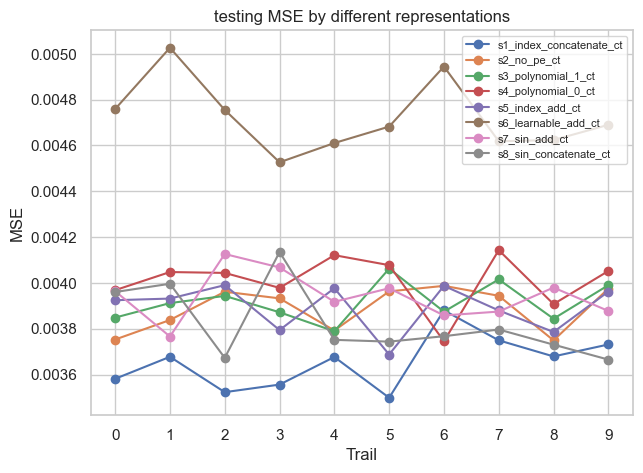

In [28]:
test_mse_comparison(mse_dict)

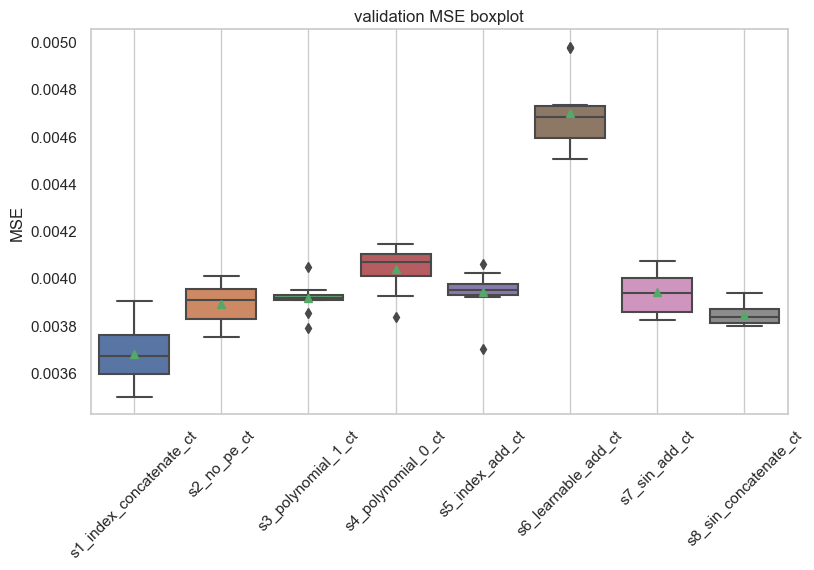

In [29]:
boxplot_vali(mse_dict, True)

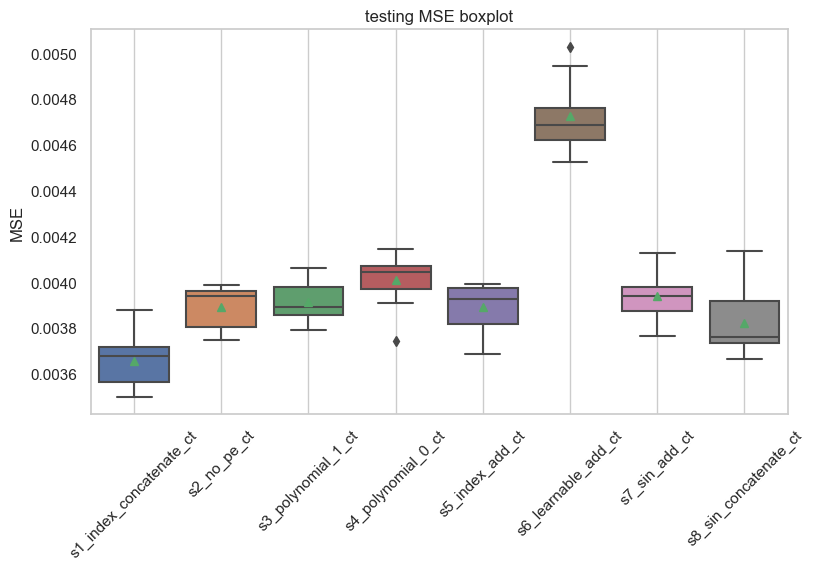

In [30]:
boxplot_test(mse_dict, True)

### The mean and std of each representations

In [31]:
def get_mean_std(x):
    #x = x.to_numpy(copy=True)
    return np.mean(x), np.std(x)

In [32]:
print("validation performance")
for x,y in mse_dict.items():
    y = y.to_numpy(copy=True)
    validation_mse = y[:,1]
    test_mse = y[:,2] 
    m1 ,s1 = get_mean_std(validation_mse)
    m2 ,s2 = get_mean_std(test_mse)
    print(f" mean={m1:.6f}, std={s1:.6f}  for {x}")

validation performance
 mean=0.003676, std=0.000114  for s1_index_concatenate_ct
 mean=0.003890, std=0.000082  for s2_no_pe_ct
 mean=0.003913, std=0.000062  for s3_polynomial_1_ct
 mean=0.004039, std=0.000091  for s4_polynomial_0_ct
 mean=0.003939, std=0.000091  for s5_index_add_ct
 mean=0.004698, std=0.000157  for s6_learnable_add_ct
 mean=0.003940, std=0.000085  for s7_sin_add_ct
 mean=0.003843, std=0.000041  for s8_sin_concatenate_ct


In [33]:
print("testing performance")
for x,y in mse_dict.items():
    y = y.to_numpy(copy=True)
    test_mse = y[:,2] 
    m1 ,s1 = get_mean_std(test_mse)
    print(f" mean={m1:.6f}, std={s1:.6f}  for {x}")

testing performance
 mean=0.003655, std=0.000111  for s1_index_concatenate_ct
 mean=0.003890, std=0.000091  for s2_no_pe_ct
 mean=0.003915, std=0.000082  for s3_polynomial_1_ct
 mean=0.004008, std=0.000111  for s4_polynomial_0_ct
 mean=0.003892, std=0.000098  for s5_index_add_ct
 mean=0.004724, std=0.000148  for s6_learnable_add_ct
 mean=0.003941, std=0.000100  for s7_sin_add_ct
 mean=0.003822, std=0.000147  for s8_sin_concatenate_ct


## PART 3: Different data representations on CNN_transformer with learnable positional encoding in transformer.

In [34]:
mse_dict = {
    "s1_index_concatenate_ctp": s1_index_concatenate_ctp,
    "s2_no_pe_ctp": s2_no_pe_ctp,
    "s3_polynomial_1_ctp": s3_polynomial_1_ctp,
    "s4_polynomial_0_ctp": s4_polynomial_0_ctp, 
    "s5_index_add_ctp":s5_index_add_ctp,
    "s6_learnable_add_ctp":s6_learnable_add_ctp, 
    "s7_sin_add_ctp":s7_sin_add_ctp,
    's8_sin_concatenate_ctp':s8_sin_concatenate_ctp,
}

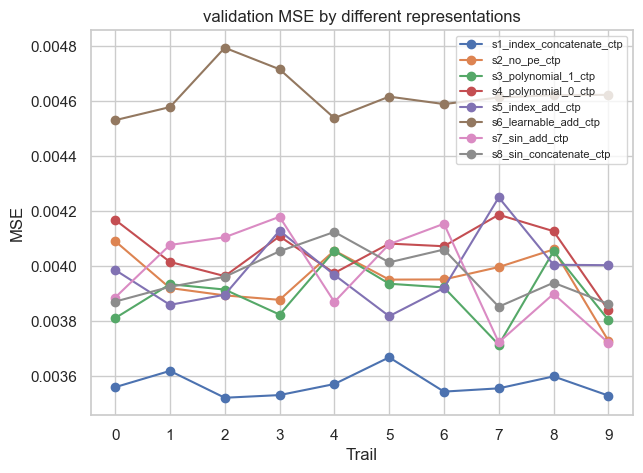

In [35]:
vali_mse_comparison(mse_dict)

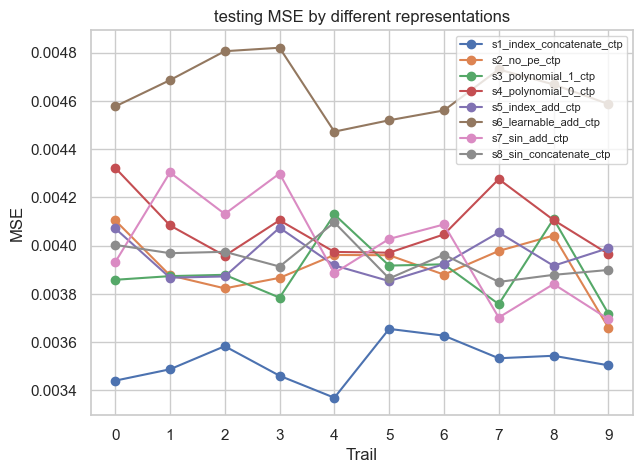

In [36]:
test_mse_comparison(mse_dict)

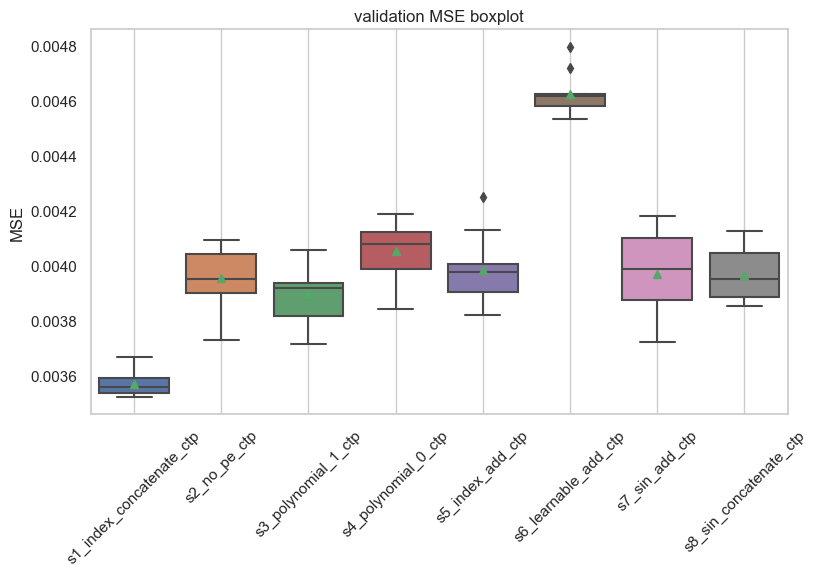

In [37]:
boxplot_vali(mse_dict, True)

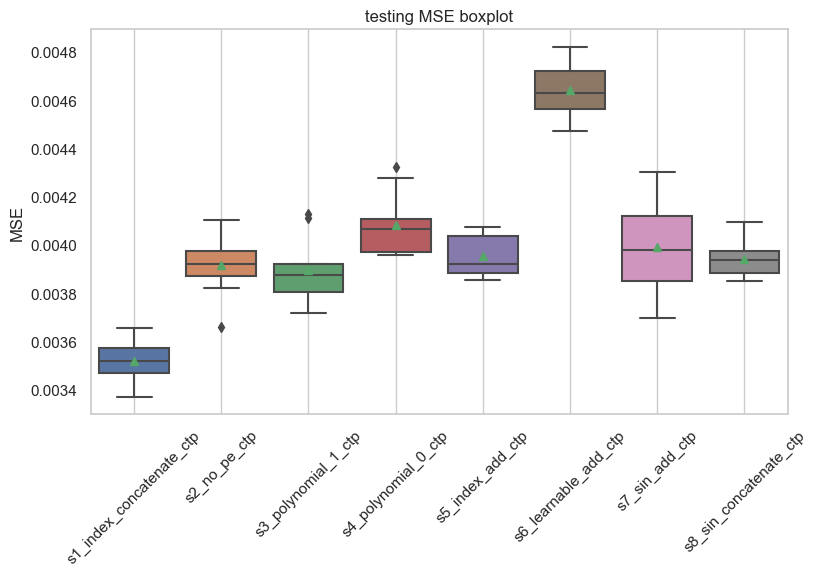

In [38]:
boxplot_test(mse_dict, True)

### The mean and std of each representations

In [39]:
def get_mean_std(x):
    #x = x.to_numpy(copy=True)
    return np.mean(x), np.std(x)

In [40]:
print("validation performance")
for x,y in mse_dict.items():
    y = y.to_numpy(copy=True)
    validation_mse = y[:,1]
    test_mse = y[:,2] 
    m1 ,s1 = get_mean_std(validation_mse)
    m2 ,s2 = get_mean_std(test_mse)
    print(f" mean={m1:.6f}, std={s1:.6f}  for {x}")

validation performance
 mean=0.003570, std=0.000044  for s1_index_concatenate_ctp
 mean=0.003953, std=0.000102  for s2_no_pe_ctp
 mean=0.003898, std=0.000104  for s3_polynomial_1_ctp
 mean=0.004054, std=0.000101  for s4_polynomial_0_ctp
 mean=0.003984, std=0.000122  for s5_index_add_ctp
 mean=0.004623, std=0.000075  for s6_learnable_add_ctp
 mean=0.003970, std=0.000163  for s7_sin_add_ctp
 mean=0.003967, std=0.000089  for s8_sin_concatenate_ctp


In [41]:
print("testing performance")
for x,y in mse_dict.items():
    y = y.to_numpy(copy=True)
    test_mse = y[:,2] 
    m1 ,s1 = get_mean_std(test_mse)
    print(f" mean={m1:.6f}, std={s1:.6f}  for {x}")

testing performance
 mean=0.003520, std=0.000083  for s1_index_concatenate_ctp
 mean=0.003915, std=0.000118  for s2_no_pe_ctp
 mean=0.003895, std=0.000129  for s3_polynomial_1_ctp
 mean=0.004081, std=0.000123  for s4_polynomial_0_ctp
 mean=0.003954, std=0.000082  for s5_index_add_ctp
 mean=0.004643, std=0.000113  for s6_learnable_add_ctp
 mean=0.003990, std=0.000208  for s7_sin_add_ctp
 mean=0.003941, std=0.000071  for s8_sin_concatenate_ctp


## PART 4: comparison of different models in same data representation

### Representation 1: index positional encoding then concatenate at axis 1.

The input matrix will be a 2 x 414 matrix, the first row will be positional embedding, the second row will be the values in different velocity.

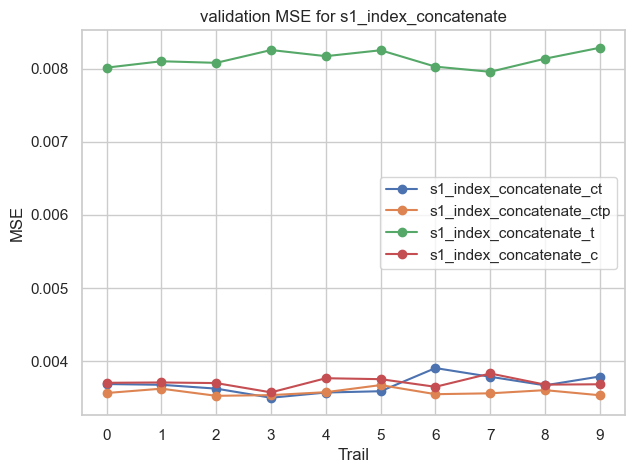

 for s1_index_concatenate_ct validation: mean=0.003676, std=0.000114 
 for s1_index_concatenate_ctp validation: mean=0.003570, std=0.000044 
 for s1_index_concatenate_t validation: mean=0.008129, std=0.000107 
 for s1_index_concatenate_c validation: mean=0.003701, std=0.000066 


In [42]:
data =  {
    "s1_index_concatenate_ct": s1_index_concatenate_ct,
    "s1_index_concatenate_ctp": s1_index_concatenate_ctp,
    "s1_index_concatenate_t": s1_index_concatenate_t,
    "s1_index_concatenate_c":s1_index_concatenate_c,
}
compare_10_trails(data,"s1_index_concatenate", False)

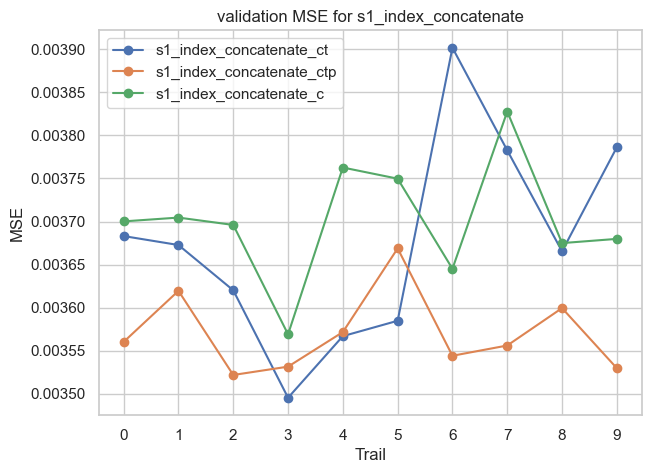

 for s1_index_concatenate_ct validation: mean=0.003676, std=0.000114 
 for s1_index_concatenate_ctp validation: mean=0.003570, std=0.000044 
 for s1_index_concatenate_c validation: mean=0.003701, std=0.000066 


In [43]:
data =  {
    "s1_index_concatenate_ct": s1_index_concatenate_ct,
    "s1_index_concatenate_ctp": s1_index_concatenate_ctp,
    's1_index_concatenate_c':s1_index_concatenate_c,
}
compare_10_trails(data,"s1_index_concatenate", False)

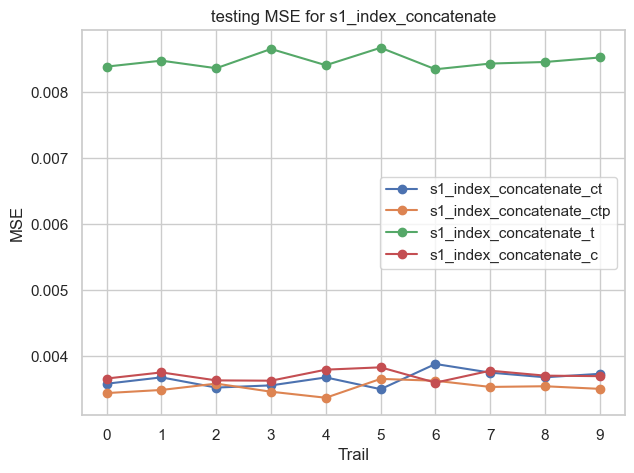

 for s1_index_concatenate_ct testing: mean=0.003655, std=0.000111 
 for s1_index_concatenate_ctp testing: mean=0.003520, std=0.000083 
 for s1_index_concatenate_t testing: mean=0.008469, std=0.000108 
 for s1_index_concatenate_c testing: mean=0.003707, std=0.000075 


In [44]:
data =  {
    "s1_index_concatenate_ct": s1_index_concatenate_ct,
    "s1_index_concatenate_ctp": s1_index_concatenate_ctp,
    "s1_index_concatenate_t": s1_index_concatenate_t,
    's1_index_concatenate_c':s1_index_concatenate_c,
}
compare_10_trails(data,"s1_index_concatenate", True)

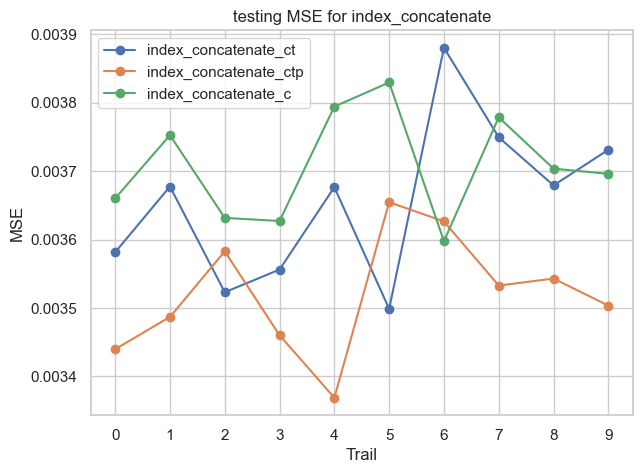

 for index_concatenate_ct testing: mean=0.003655, std=0.000111 
 for index_concatenate_ctp testing: mean=0.003520, std=0.000083 
 for index_concatenate_c testing: mean=0.003707, std=0.000075 


In [250]:
data =  {
    "index_concatenate_ct": s1_index_concatenate_ct,
    "index_concatenate_ctp": s1_index_concatenate_ctp,
    'index_concatenate_c':s1_index_concatenate_c,
}
compare_10_trails(data,"index_concatenate", True)

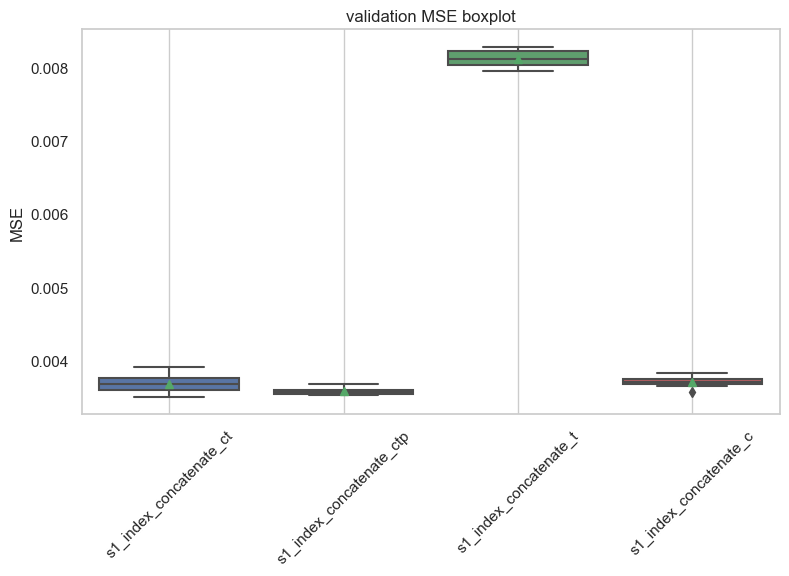

In [46]:
data =  {
    "s1_index_concatenate_ct": s1_index_concatenate_ct,
    "s1_index_concatenate_ctp": s1_index_concatenate_ctp,
    "s1_index_concatenate_t": s1_index_concatenate_t,
    's1_index_concatenate_c':s1_index_concatenate_c,
}
boxplot_vali(data, True)

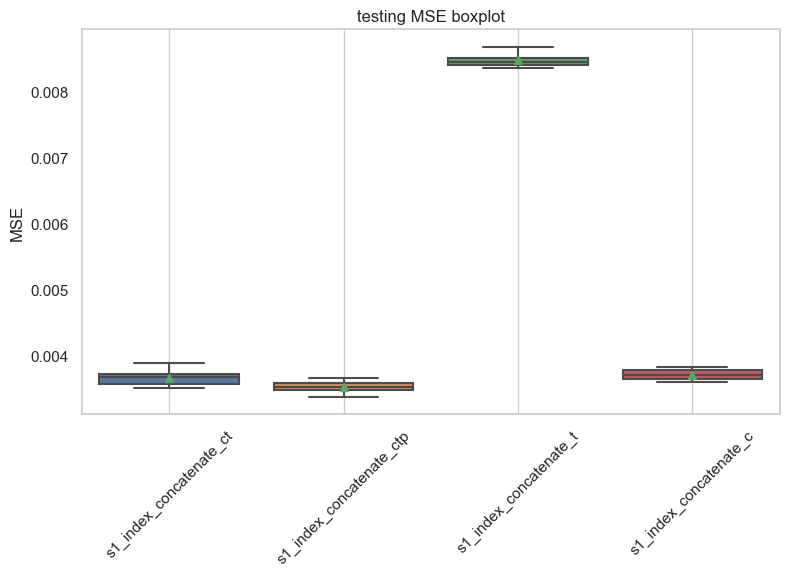

In [47]:
boxplot_test(data, True)

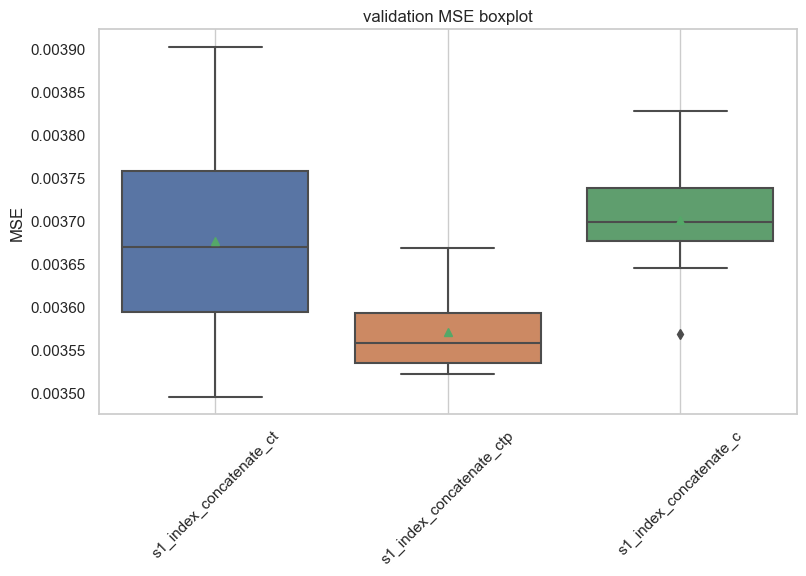

In [48]:
data =  {
    "s1_index_concatenate_ct": s1_index_concatenate_ct,
    "s1_index_concatenate_ctp": s1_index_concatenate_ctp,
    's1_index_concatenate_c':s1_index_concatenate_c,
}
boxplot_vali(data, True)

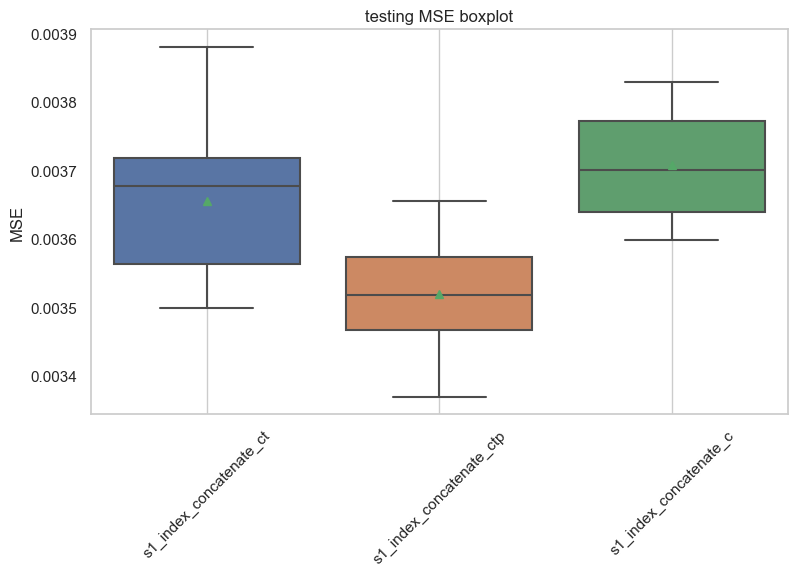

In [49]:
data =  {
    "s1_index_concatenate_ct": s1_index_concatenate_ct,
    "s1_index_concatenate_ctp": s1_index_concatenate_ctp,
    's1_index_concatenate_c':s1_index_concatenate_c,
}
boxplot_test(data, True)

In [50]:
# training process

### Representation 2: original vector.

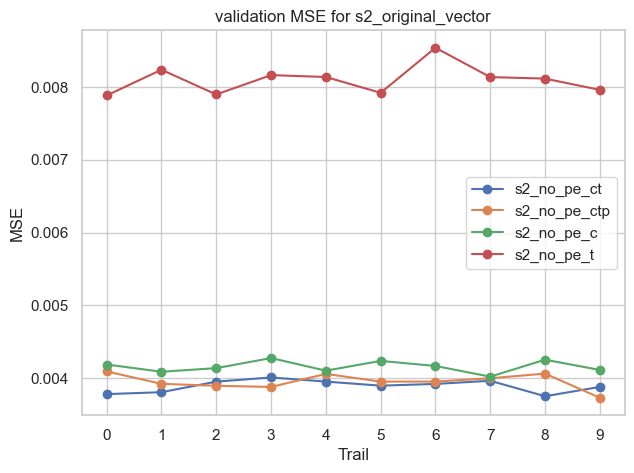

 for s2_no_pe_ct validation: mean=0.003890, std=0.000082 
 for s2_no_pe_ctp validation: mean=0.003953, std=0.000102 
 for s2_no_pe_c validation: mean=0.004157, std=0.000077 
 for s2_no_pe_t validation: mean=0.008100, std=0.000189 


In [51]:
data =  {
    "s2_no_pe_ct": s2_no_pe_ct,
    "s2_no_pe_ctp": s2_no_pe_ctp,
    "s2_no_pe_c": s2_no_pe_c,
    "s2_no_pe_t":s2_no_pe_t,
}
compare_10_trails(data,"s2_original_vector", False)

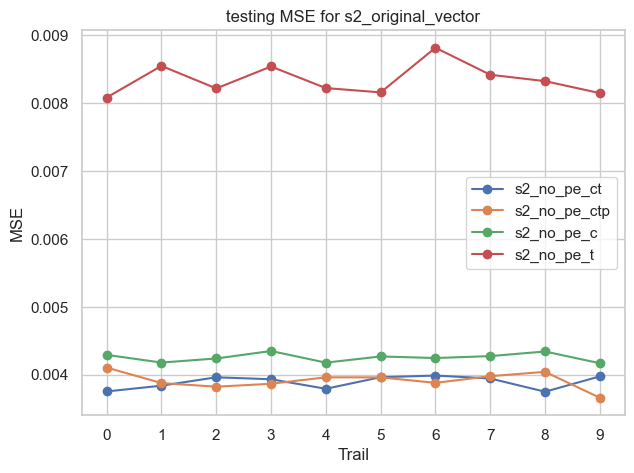

 for s2_no_pe_ct testing: mean=0.003890, std=0.000091 
 for s2_no_pe_ctp testing: mean=0.003915, std=0.000118 
 for s2_no_pe_c testing: mean=0.004254, std=0.000062 
 for s2_no_pe_t testing: mean=0.008350, std=0.000219 


In [52]:
compare_10_trails(data,"s2_original_vector", True)

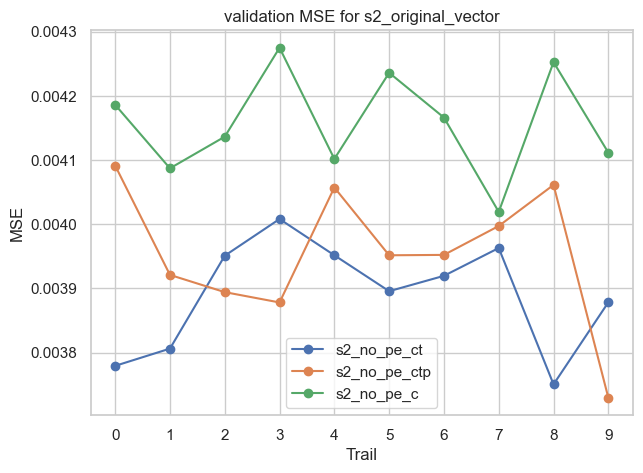

 for s2_no_pe_ct validation: mean=0.003890, std=0.000082 
 for s2_no_pe_ctp validation: mean=0.003953, std=0.000102 
 for s2_no_pe_c validation: mean=0.004157, std=0.000077 


In [53]:
data =  {
    "s2_no_pe_ct": s2_no_pe_ct,
    "s2_no_pe_ctp": s2_no_pe_ctp,
    "s2_no_pe_c": s2_no_pe_c,
}
compare_10_trails(data,"s2_original_vector", False)

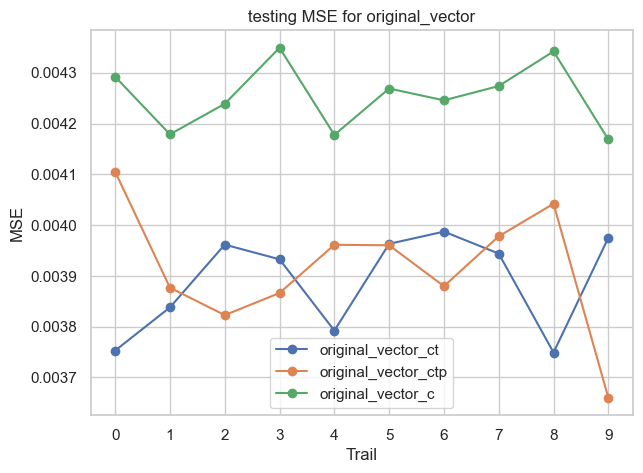

 for original_vector_ct testing: mean=0.003890, std=0.000091 
 for original_vector_ctp testing: mean=0.003915, std=0.000118 
 for original_vector_c testing: mean=0.004254, std=0.000062 


In [233]:
data =  {
    "original_vector_ct": s2_no_pe_ct,
    "original_vector_ctp": s2_no_pe_ctp,
    "original_vector_c": s2_no_pe_c,
}
compare_10_trails(data,"original_vector", True)

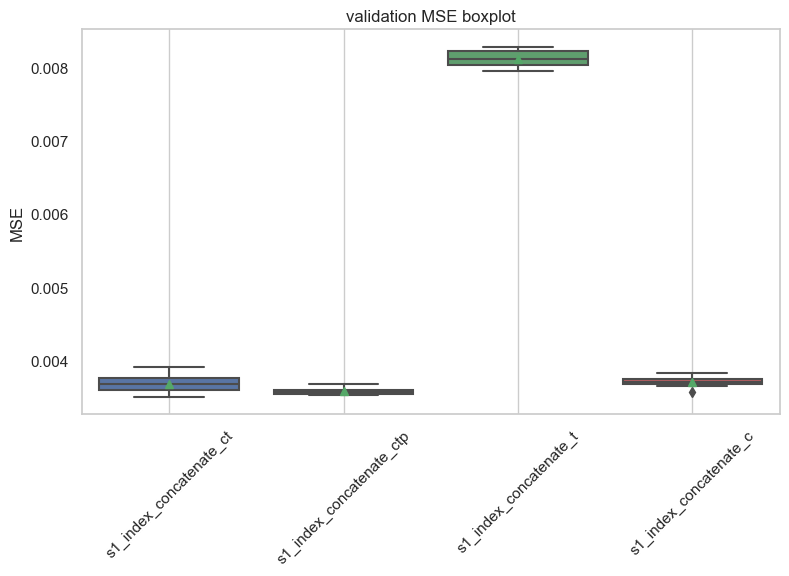

In [55]:
data =  {
    "s1_index_concatenate_ct": s1_index_concatenate_ct,
    "s1_index_concatenate_ctp": s1_index_concatenate_ctp,
    "s1_index_concatenate_t": s1_index_concatenate_t,
    's1_index_concatenate_c':s1_index_concatenate_c,
}
boxplot_vali(data, True)

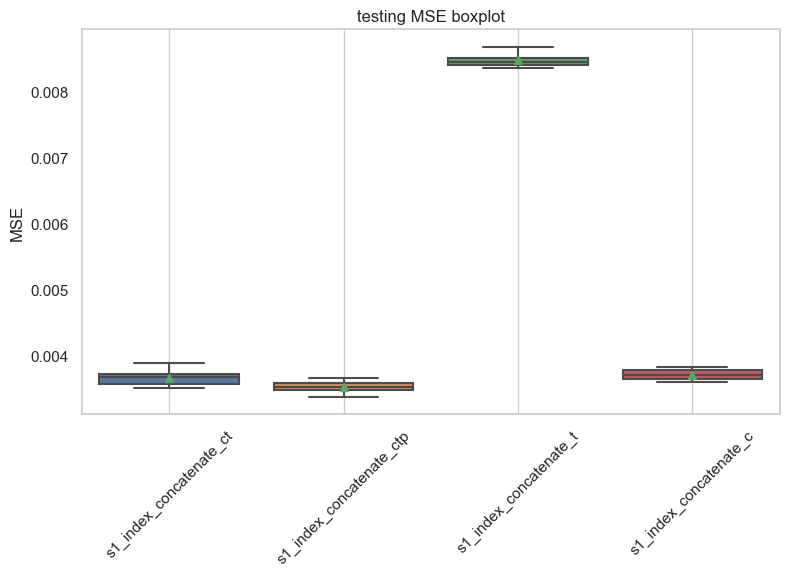

In [56]:
boxplot_test(data, True)

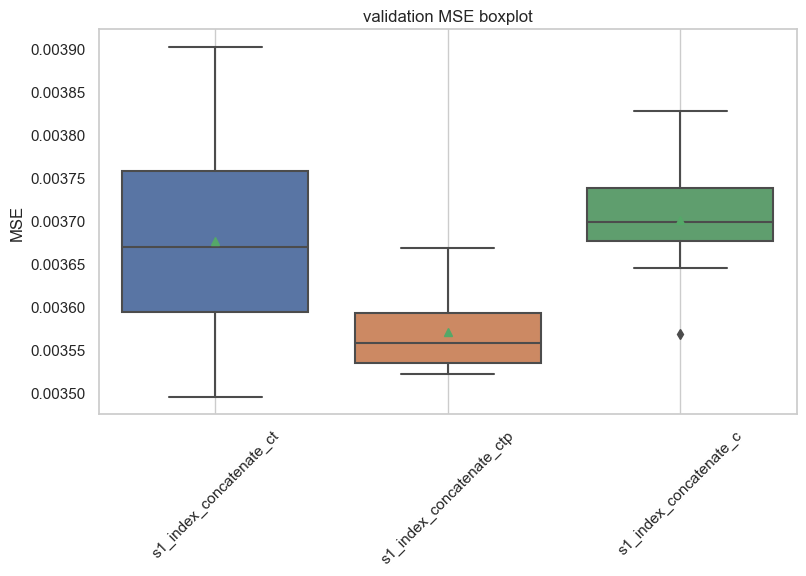

In [57]:
data =  {
    "s1_index_concatenate_ct": s1_index_concatenate_ct,
    "s1_index_concatenate_ctp": s1_index_concatenate_ctp,
    's1_index_concatenate_c':s1_index_concatenate_c,
}
boxplot_vali(data, True)


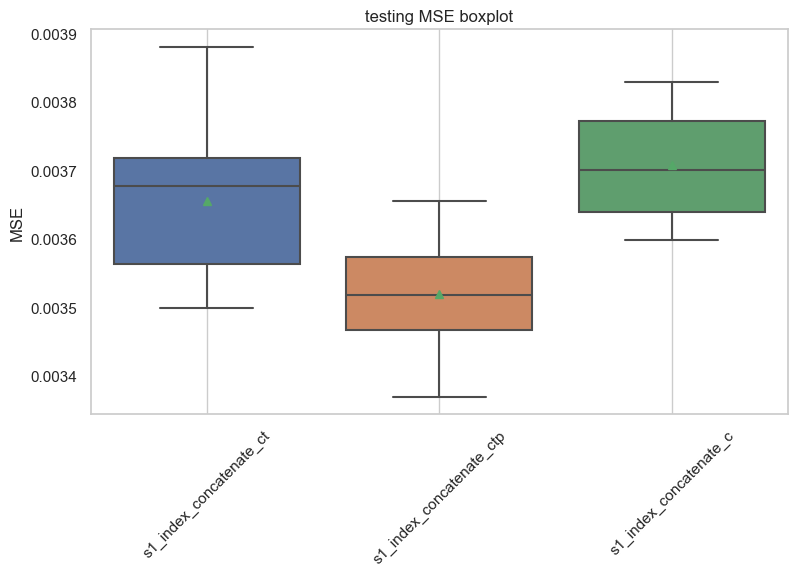

In [58]:
boxplot_test(data, True)

## Representation 3: polynomial concatenate at axis 1.

### concatenate polynomial features at axis 1.

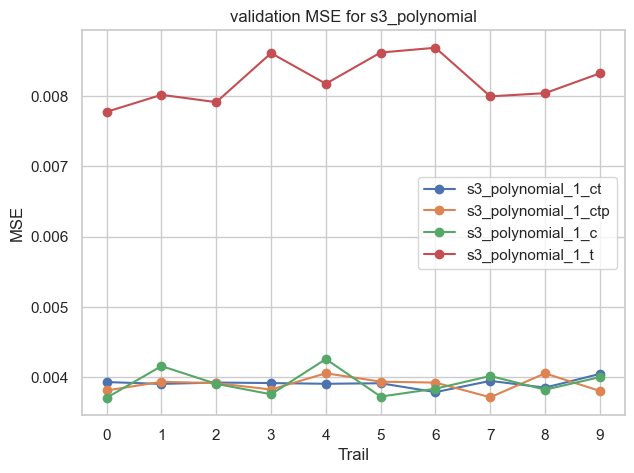

 for s3_polynomial_1_ct validation: mean=0.003913, std=0.000062 
 for s3_polynomial_1_ctp validation: mean=0.003898, std=0.000104 
 for s3_polynomial_1_c validation: mean=0.003919, std=0.000177 
 for s3_polynomial_1_t validation: mean=0.008214, std=0.000309 


In [59]:
data =  {
    "s3_polynomial_1_ct": s3_polynomial_1_ct,
    "s3_polynomial_1_ctp": s3_polynomial_1_ctp,
    "s3_polynomial_1_c": s3_polynomial_1_c,
    "s3_polynomial_1_t":s3_polynomial_1_t,
}

data_no_t  =  {
    "s3_polynomial_1_ct": s3_polynomial_1_ct,
    "s3_polynomial_1_ctp": s3_polynomial_1_ctp,
    "s3_polynomial_1_c": s3_polynomial_1_c,
}
compare_10_trails(data,"s3_polynomial", False)

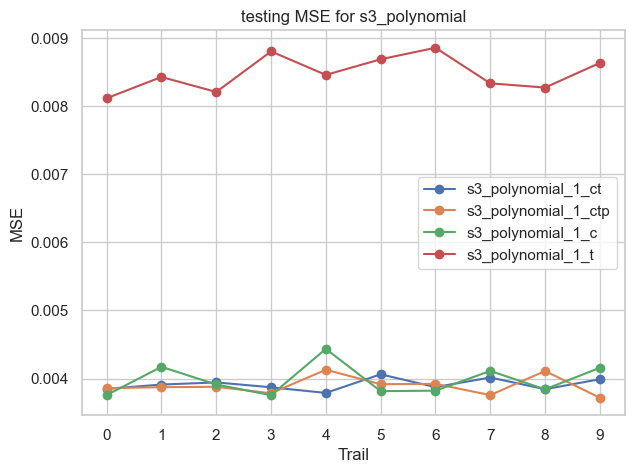

 for s3_polynomial_1_ct testing: mean=0.003915, std=0.000082 
 for s3_polynomial_1_ctp testing: mean=0.003895, std=0.000129 
 for s3_polynomial_1_c testing: mean=0.003978, std=0.000216 
 for s3_polynomial_1_t testing: mean=0.008480, std=0.000242 


In [60]:
compare_10_trails(data,"s3_polynomial", True)

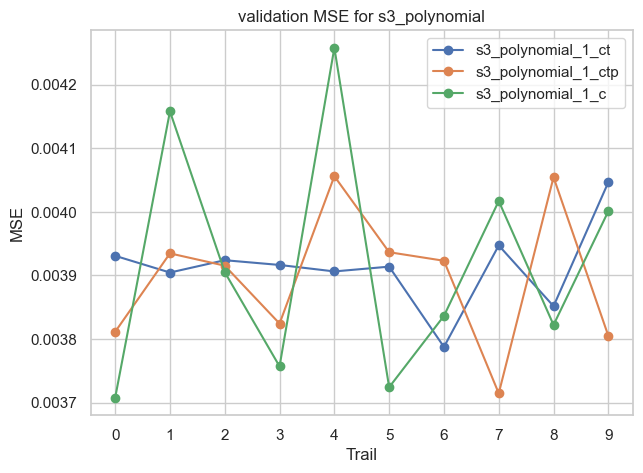

 for s3_polynomial_1_ct validation: mean=0.003913, std=0.000062 
 for s3_polynomial_1_ctp validation: mean=0.003898, std=0.000104 
 for s3_polynomial_1_c validation: mean=0.003919, std=0.000177 


In [61]:
compare_10_trails(data_no_t,"s3_polynomial", False)

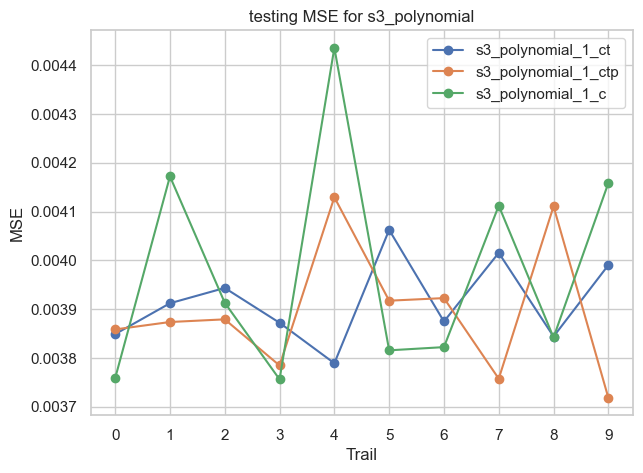

 for s3_polynomial_1_ct testing: mean=0.003915, std=0.000082 
 for s3_polynomial_1_ctp testing: mean=0.003895, std=0.000129 
 for s3_polynomial_1_c testing: mean=0.003978, std=0.000216 


In [62]:
compare_10_trails(data_no_t,"s3_polynomial", True)

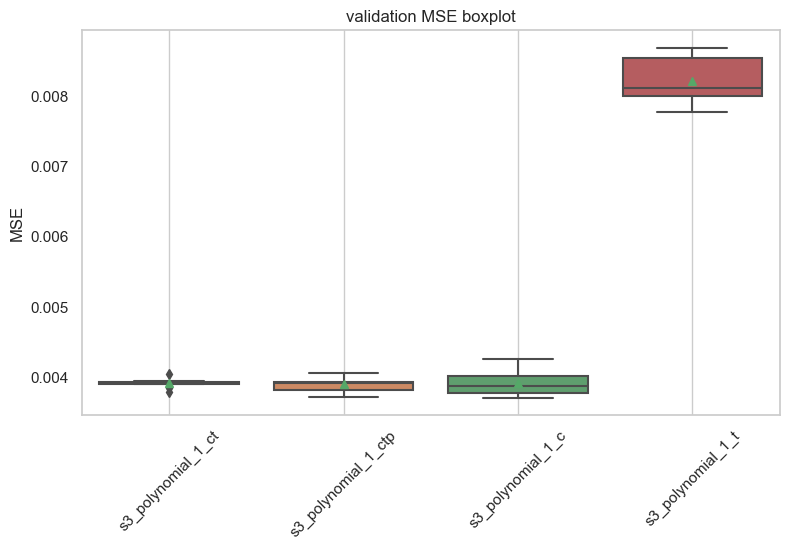

In [63]:
boxplot_vali(data, True)

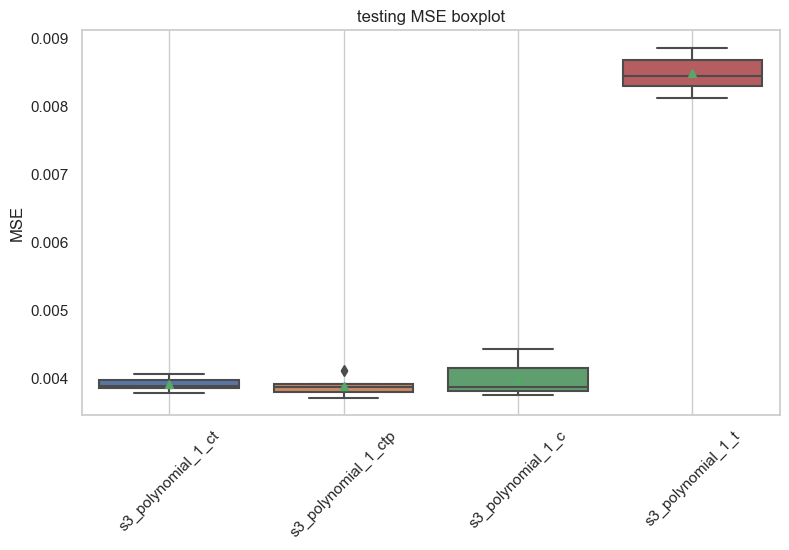

In [64]:
boxplot_test(data, True)

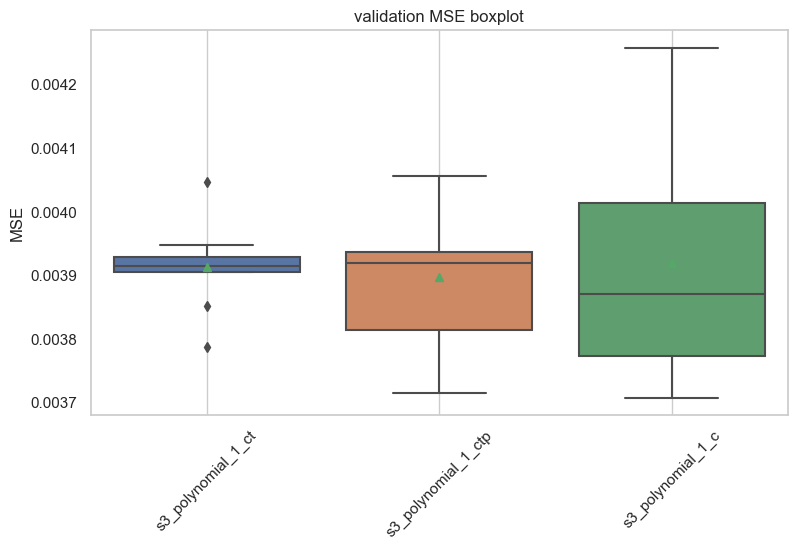

In [65]:
boxplot_vali(data_no_t, True)

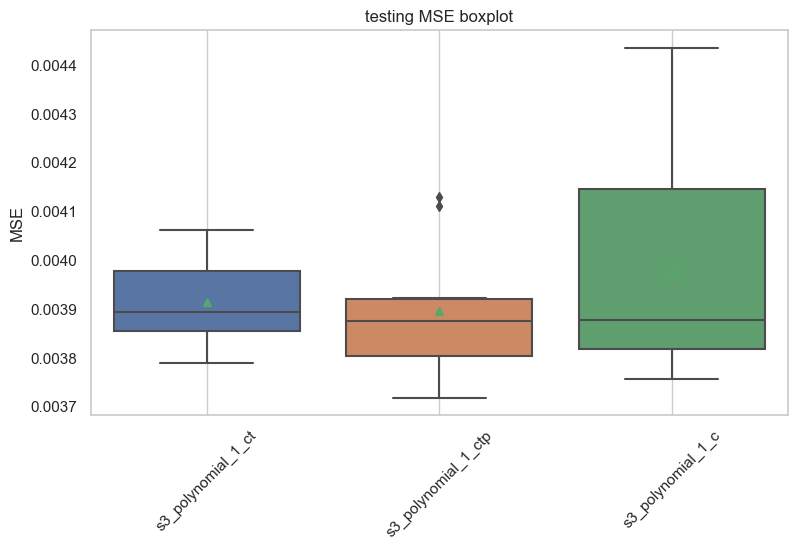

In [66]:
boxplot_test(data_no_t, True)

## Representation 4: polynomial features concatenate at axis 0.

### Square the original vector and concatenate at axis 0.<br> Transformer model deal this operation the same as concatenate at axis 1, so no transformer model experiments done for this representation.

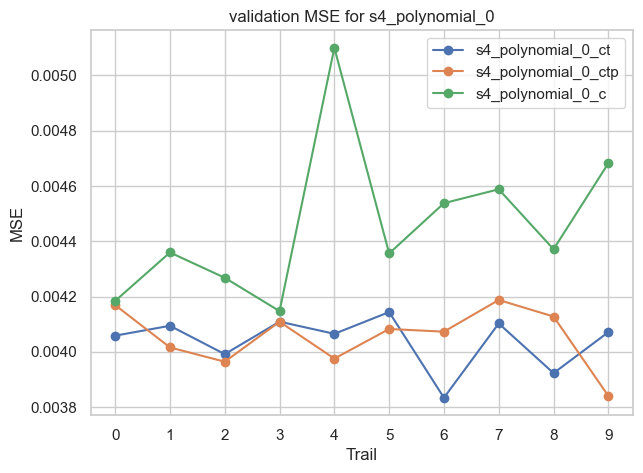

 for s4_polynomial_0_ct validation: mean=0.004039, std=0.000091 
 for s4_polynomial_0_ctp validation: mean=0.004054, std=0.000101 
 for s4_polynomial_0_c validation: mean=0.004459, std=0.000268 


In [67]:
data =  {
    "s4_polynomial_0_ct": s4_polynomial_0_ct,
    "s4_polynomial_0_ctp": s4_polynomial_0_ctp,
    "s4_polynomial_0_c": s4_polynomial_0_c,
}
compare_10_trails(data,"s4_polynomial_0", False)

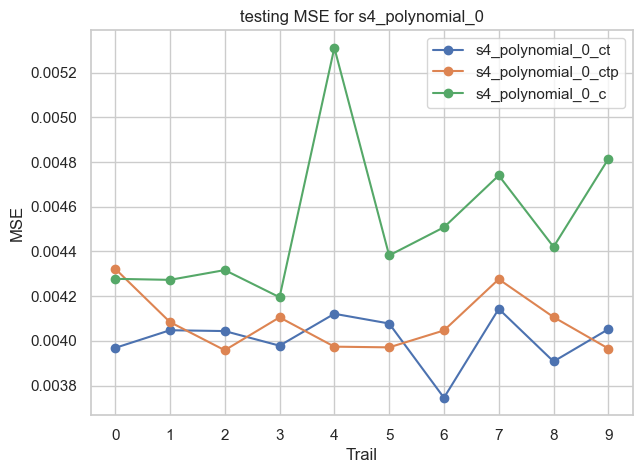

 for s4_polynomial_0_ct testing: mean=0.004008, std=0.000111 
 for s4_polynomial_0_ctp testing: mean=0.004081, std=0.000123 
 for s4_polynomial_0_c testing: mean=0.004524, std=0.000325 


In [68]:
compare_10_trails(data,"s4_polynomial_0", True)

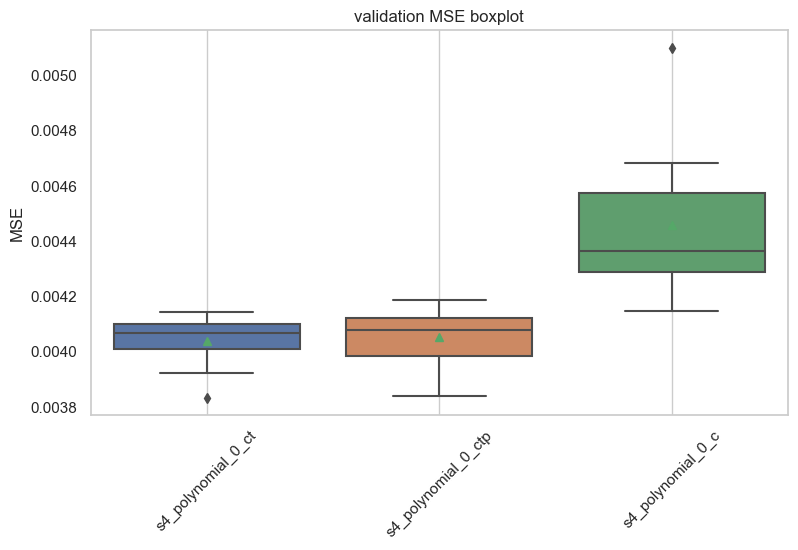

In [69]:
boxplot_vali(data, True)

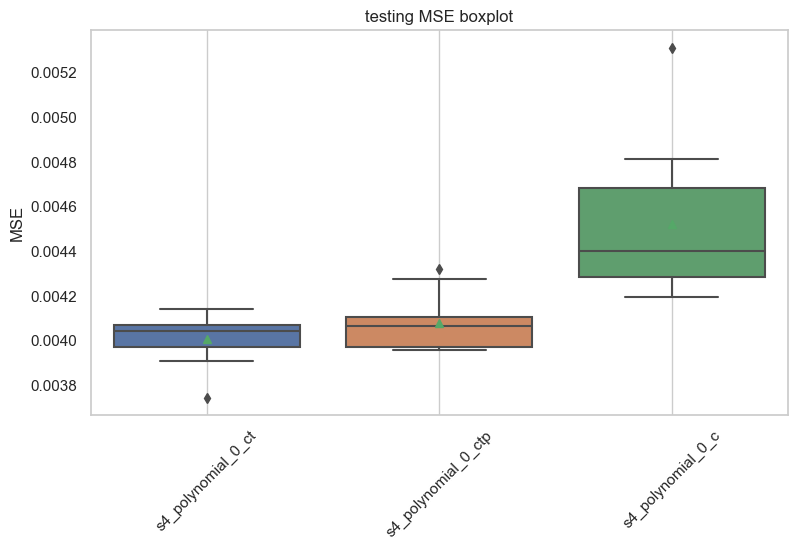

In [70]:
boxplot_test(data, True)

## Representation 5: adding index positional encoding to original vector

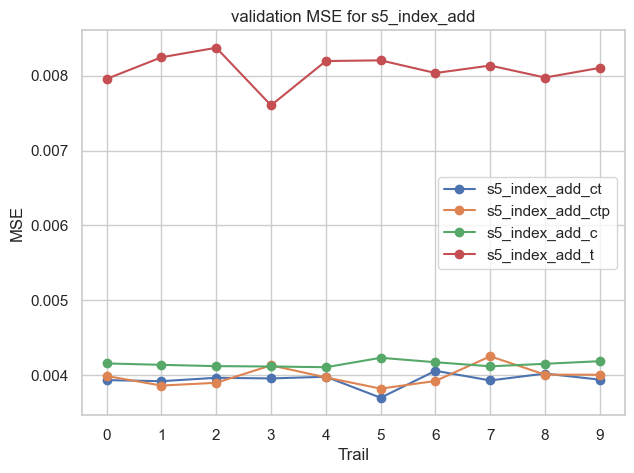

 for s5_index_add_ct validation: mean=0.003939, std=0.000091 
 for s5_index_add_ctp validation: mean=0.003984, std=0.000122 
 for s5_index_add_c validation: mean=0.004148, std=0.000037 
 for s5_index_add_t validation: mean=0.008084, std=0.000200 


In [71]:
#s5_index_add_ct
data =  {
    "s5_index_add_ct": s5_index_add_ct,
    "s5_index_add_ctp": s5_index_add_ctp,
    "s5_index_add_c": s5_index_add_c,
    "s5_index_add_t":s5_index_add_t,
}

data_no_t =  {
    "s5_index_add_ct": s5_index_add_ct,
    "s5_index_add_ctp": s5_index_add_ctp,
    "s5_index_add_c": s5_index_add_c,
}
compare_10_trails(data,"s5_index_add", False)

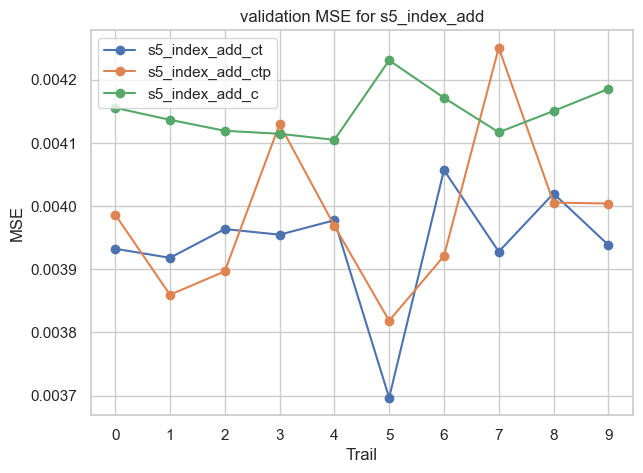

 for s5_index_add_ct validation: mean=0.003939, std=0.000091 
 for s5_index_add_ctp validation: mean=0.003984, std=0.000122 
 for s5_index_add_c validation: mean=0.004148, std=0.000037 


In [72]:
compare_10_trails(data_no_t,"s5_index_add", False)

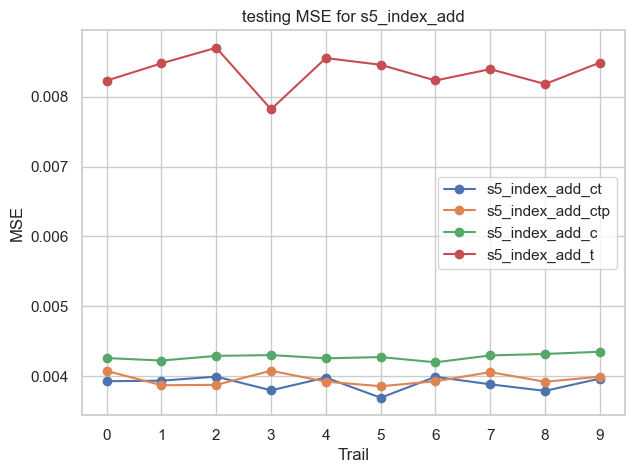

 for s5_index_add_ct testing: mean=0.003892, std=0.000098 
 for s5_index_add_ctp testing: mean=0.003954, std=0.000082 
 for s5_index_add_c testing: mean=0.004274, std=0.000042 
 for s5_index_add_t testing: mean=0.008354, std=0.000235 


In [73]:
compare_10_trails(data,"s5_index_add", True)

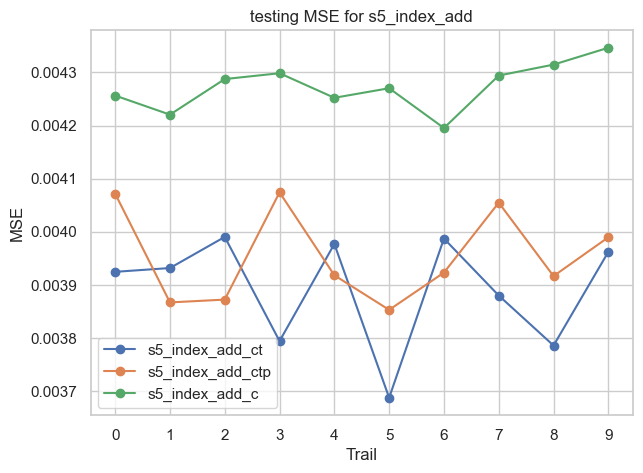

 for s5_index_add_ct testing: mean=0.003892, std=0.000098 
 for s5_index_add_ctp testing: mean=0.003954, std=0.000082 
 for s5_index_add_c testing: mean=0.004274, std=0.000042 


In [74]:
compare_10_trails(data_no_t,"s5_index_add", True)

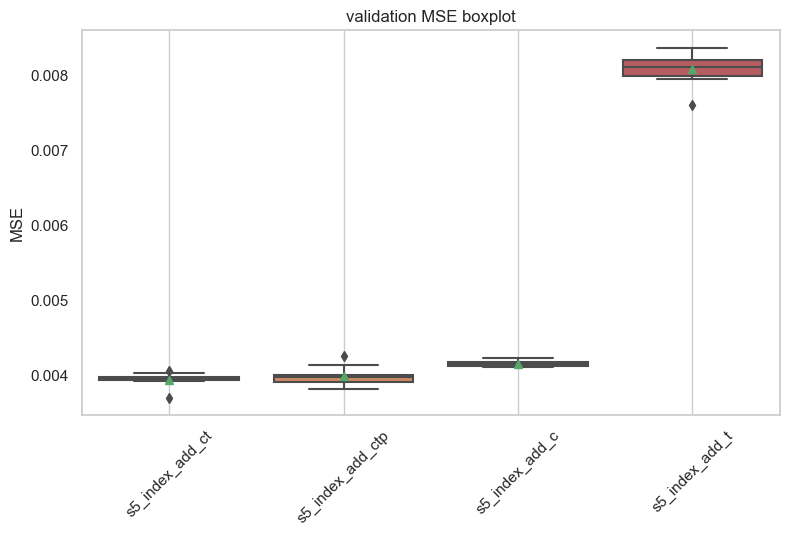

In [75]:
boxplot_vali(data, True)

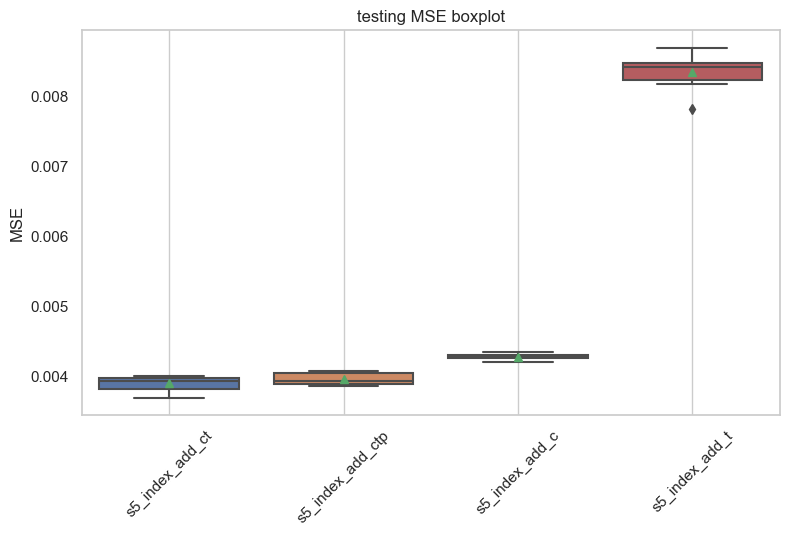

In [76]:
boxplot_test(data, True)

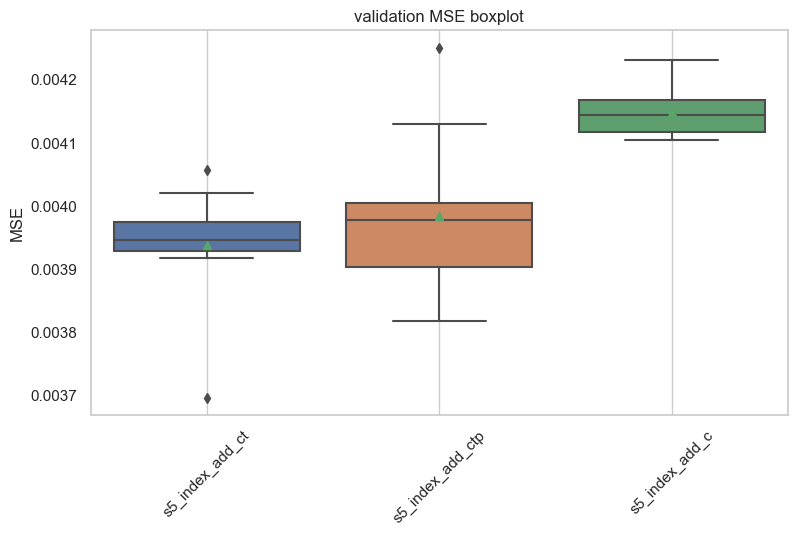

In [77]:
boxplot_vali(data_no_t, True)

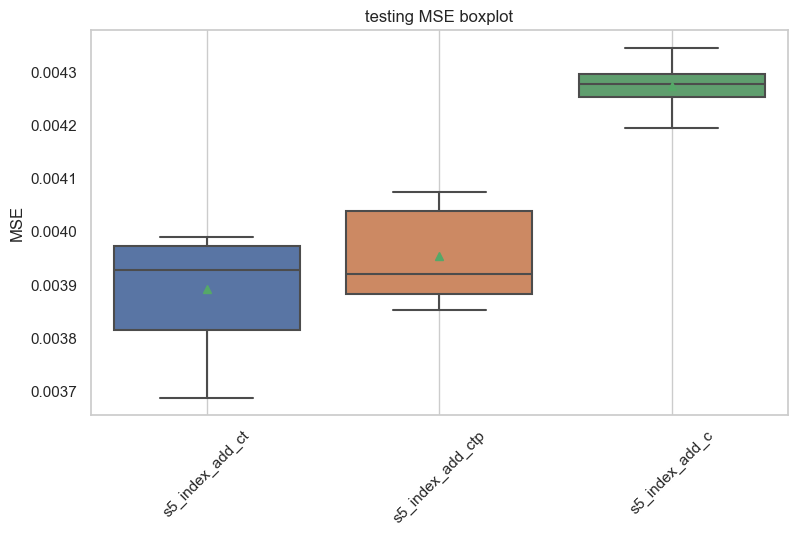

In [78]:
boxplot_test(data_no_t, True)

## Representation 6: learnable positional encoding add to original vector

### Learnable positional encoding will be of shape [1, n], where n is the number of features (in this case is 414). This positional encoding will be added to the input tensor at the begining of the CNN.

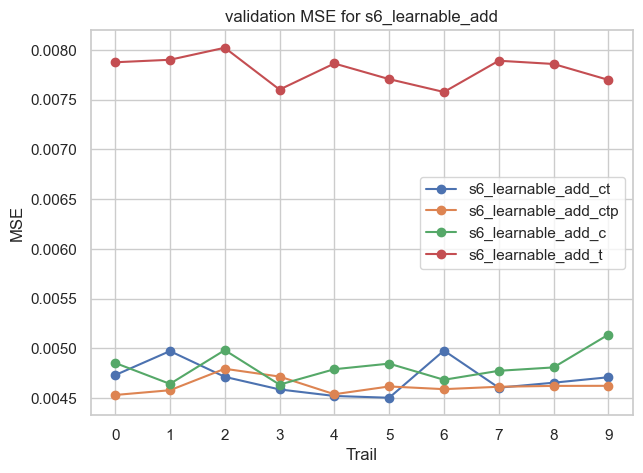

 for s6_learnable_add_ct validation: mean=0.004698, std=0.000157 
 for s6_learnable_add_ctp validation: mean=0.004623, std=0.000075 
 for s6_learnable_add_c validation: mean=0.004816, std=0.000147 
 for s6_learnable_add_t validation: mean=0.007801, std=0.000138 


In [79]:
data =  {
    "s6_learnable_add_ct": s6_learnable_add_ct,
    "s6_learnable_add_ctp": s6_learnable_add_ctp,
    "s6_learnable_add_c": s6_learnable_add_c,
    "s6_learnable_add_t":s6_learnable_add_t,
}
data_no_t =  {
    "s6_learnable_add_ct": s6_learnable_add_ct,
    "s6_learnable_add_ctp": s6_learnable_add_ctp,
    "s6_learnable_add_c": s6_learnable_add_c,
}
data_no_tc =  {
    "s6_learnable_add_ct": s6_learnable_add_ct,
    "s6_learnable_add_ctp": s6_learnable_add_ctp,
}
compare_10_trails(data,"s6_learnable_add", False)

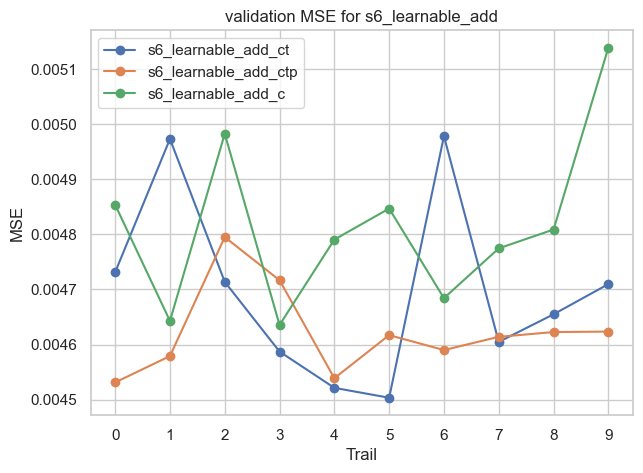

 for s6_learnable_add_ct validation: mean=0.004698, std=0.000157 
 for s6_learnable_add_ctp validation: mean=0.004623, std=0.000075 
 for s6_learnable_add_c validation: mean=0.004816, std=0.000147 


In [80]:
compare_10_trails(data_no_t,"s6_learnable_add", False)

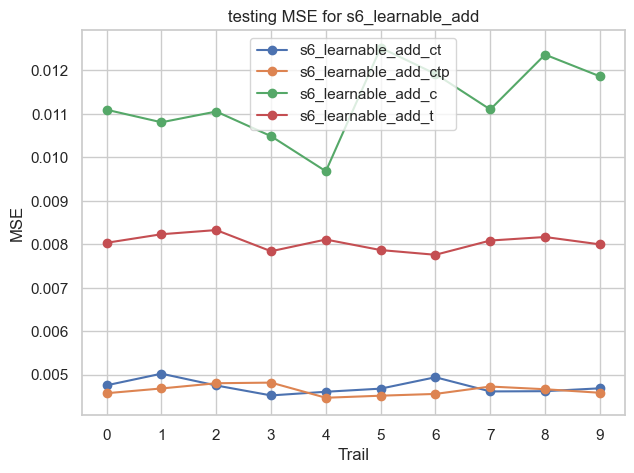

 for s6_learnable_add_ct testing: mean=0.004724, std=0.000148 
 for s6_learnable_add_ctp testing: mean=0.004643, std=0.000113 
 for s6_learnable_add_c testing: mean=0.011290, std=0.000836 
 for s6_learnable_add_t testing: mean=0.008044, std=0.000171 


In [81]:
compare_10_trails(data,"s6_learnable_add", True)

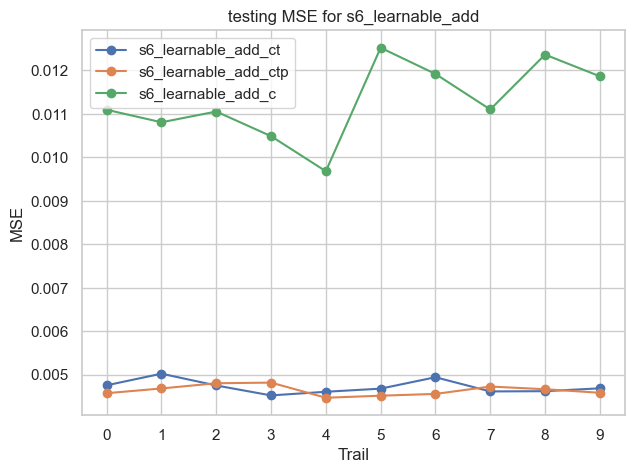

 for s6_learnable_add_ct testing: mean=0.004724, std=0.000148 
 for s6_learnable_add_ctp testing: mean=0.004643, std=0.000113 
 for s6_learnable_add_c testing: mean=0.011290, std=0.000836 


In [82]:
compare_10_trails(data_no_t,"s6_learnable_add", True)

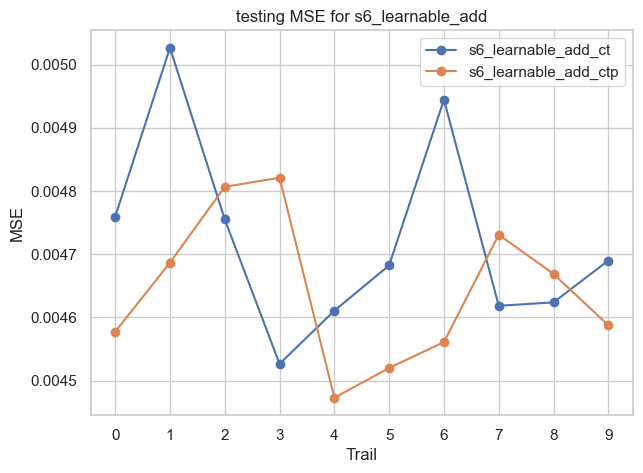

 for s6_learnable_add_ct testing: mean=0.004724, std=0.000148 
 for s6_learnable_add_ctp testing: mean=0.004643, std=0.000113 


In [83]:
compare_10_trails(data_no_tc,"s6_learnable_add", True)

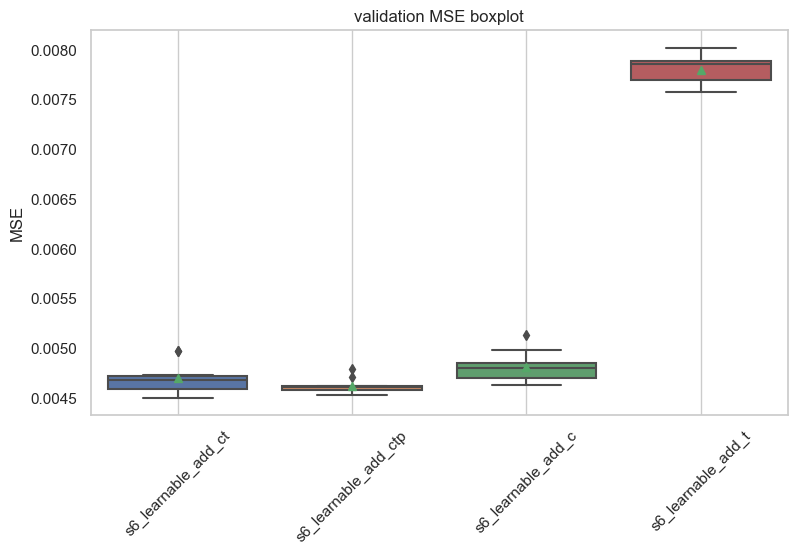

In [84]:
boxplot_vali(data, True)

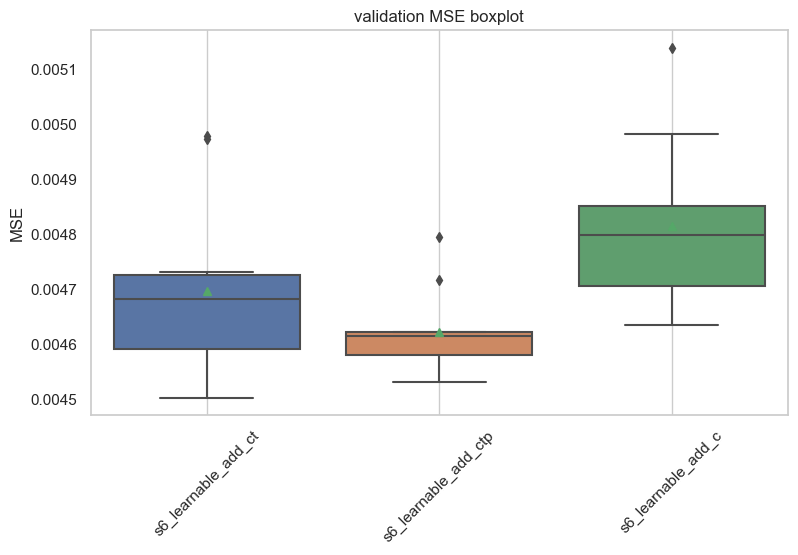

In [85]:
boxplot_vali(data_no_t, True)

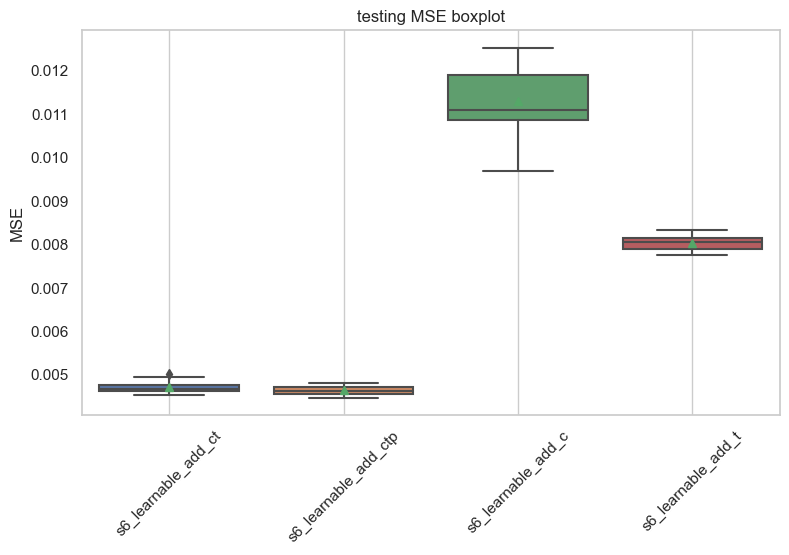

In [86]:
boxplot_test(data, True)

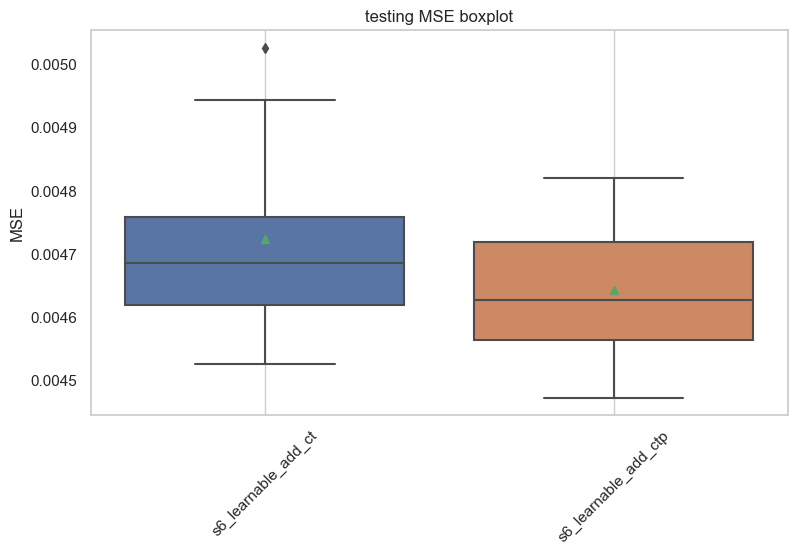

In [87]:
boxplot_test(data_no_tc, True)

## Representation 7: Using sin(.) to generate positional encoding then add to original vector

### This method use p[i] = sin(i) to generate the positional encoding. Here, the i is the index positional vector with form of [[1,2, 3, ..., 414] / 414 ]

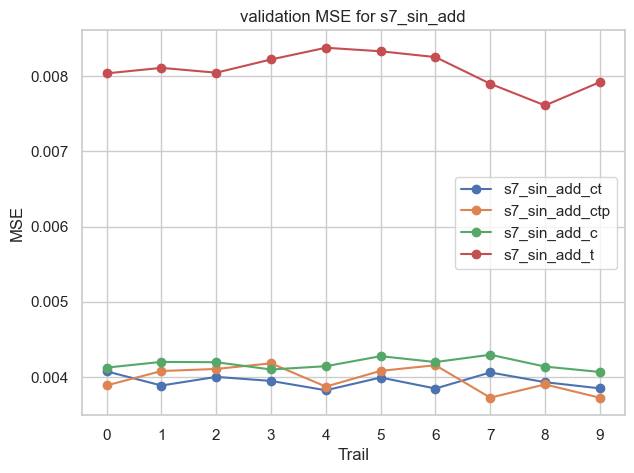

 for s7_sin_add_ct validation: mean=0.003940, std=0.000085 
 for s7_sin_add_ctp validation: mean=0.003970, std=0.000163 
 for s7_sin_add_c validation: mean=0.004173, std=0.000070 
 for s7_sin_add_t validation: mean=0.008083, std=0.000220 


In [88]:
data =  {
    "s7_sin_add_ct": s7_sin_add_ct,
    "s7_sin_add_ctp": s7_sin_add_ctp,
    "s7_sin_add_c": s7_sin_add_c,
    "s7_sin_add_t":s7_sin_add_t,
}
data_no_t =  {
    "s7_sin_add_ct": s7_sin_add_ct,
    "s7_sin_add_ctp": s7_sin_add_ctp,
}
compare_10_trails(data,"s7_sin_add", False)

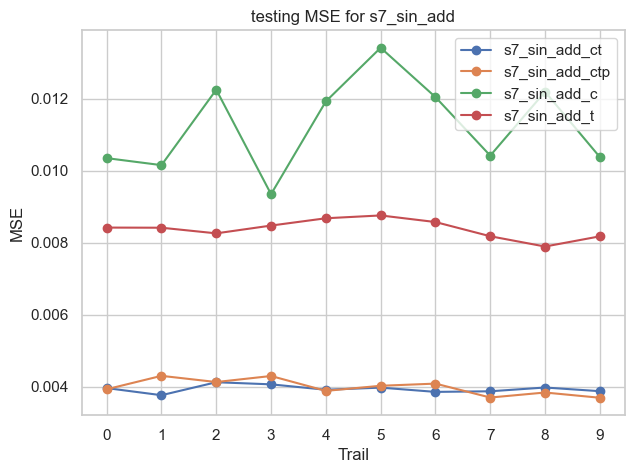

 for s7_sin_add_ct testing: mean=0.003941, std=0.000100 
 for s7_sin_add_ctp testing: mean=0.003990, std=0.000208 
 for s7_sin_add_c testing: mean=0.011246, std=0.001214 
 for s7_sin_add_t testing: mean=0.008383, std=0.000248 


In [89]:
compare_10_trails(data,"s7_sin_add", True)

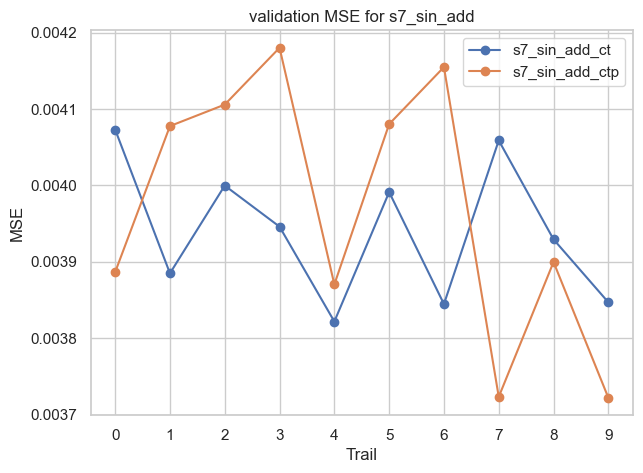

 for s7_sin_add_ct validation: mean=0.003940, std=0.000085 
 for s7_sin_add_ctp validation: mean=0.003970, std=0.000163 


In [90]:
compare_10_trails(data_no_t,"s7_sin_add", False)

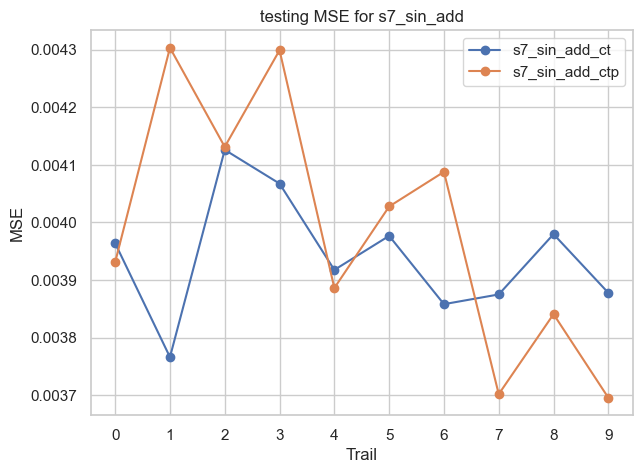

 for s7_sin_add_ct testing: mean=0.003941, std=0.000100 
 for s7_sin_add_ctp testing: mean=0.003990, std=0.000208 


In [91]:
compare_10_trails(data_no_t,"s7_sin_add", True)

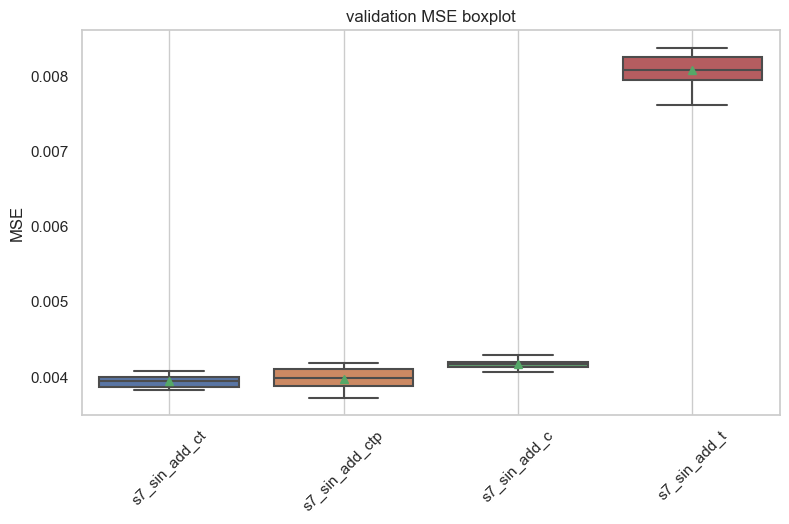

In [92]:
boxplot_vali(data, True)

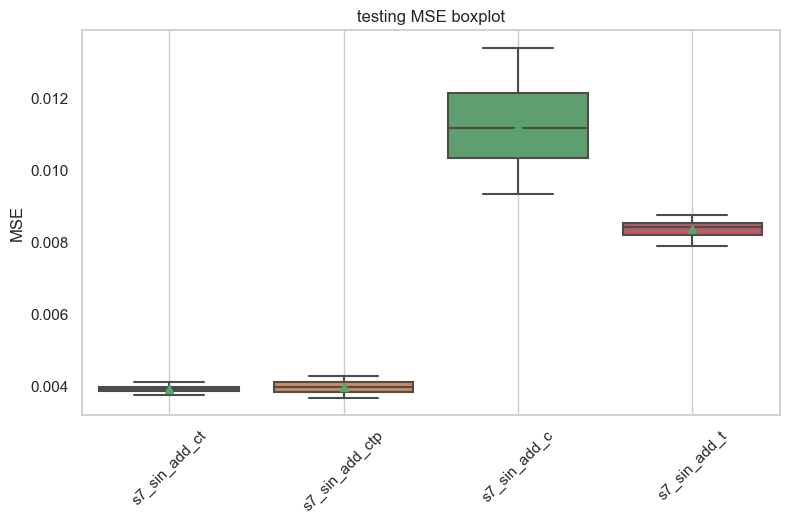

In [93]:
boxplot_test(data, True)

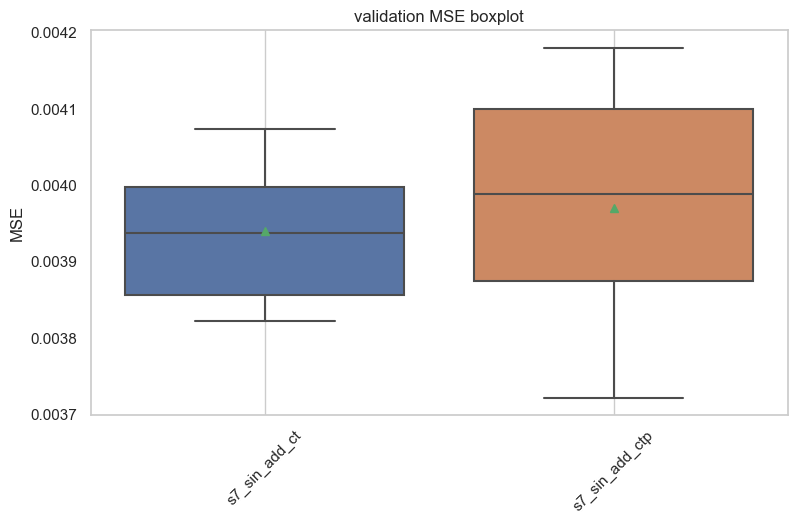

In [94]:
boxplot_vali(data_no_t, True)

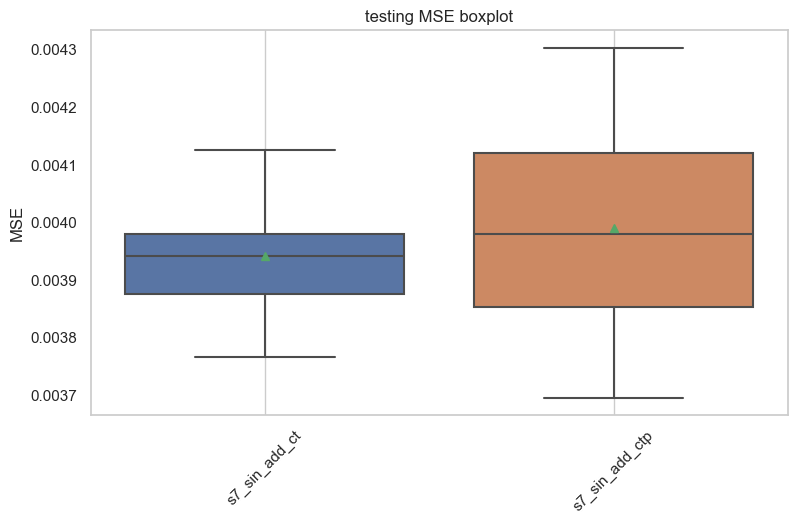

In [95]:
boxplot_test(data_no_t, True)

## Representation 8: Using sin(.) to generate positional encoding and concatenate at axis 1.

### This method use p[i] = sin(i) to generate the positional encoding. Here,the i is the index positional vector with form of [[1,2, 3, ..., 414] / 414 ]. Then this vector will be concatenated at axis 1.

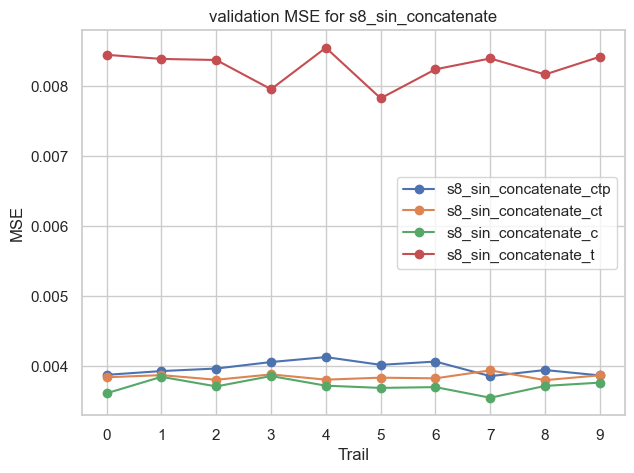

 for s8_sin_concatenate_ctp validation: mean=0.003967, std=0.000089 
 for s8_sin_concatenate_ct validation: mean=0.003843, std=0.000041 
 for s8_sin_concatenate_c validation: mean=0.003713, std=0.000089 
 for s8_sin_concatenate_t validation: mean=0.008274, std=0.000219 


In [96]:
data =  {
    "s8_sin_concatenate_ctp": s8_sin_concatenate_ctp,
    "s8_sin_concatenate_ct": s8_sin_concatenate_ct,
    "s8_sin_concatenate_c": s8_sin_concatenate_c,
    "s8_sin_concatenate_t": s8_sin_concatenate_t,
}

data_no_t =  {
    "s8_sin_concatenate_ctp": s8_sin_concatenate_ctp,
    "s8_sin_concatenate_ct": s8_sin_concatenate_ct,
    #"s8_sin_concatenate_c": s8_sin_concatenate_c,
}
compare_10_trails(data,"s8_sin_concatenate", False)

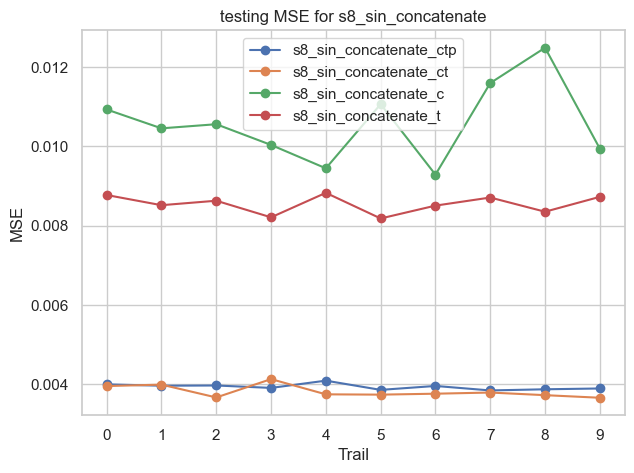

 for s8_sin_concatenate_ctp testing: mean=0.003941, std=0.000071 
 for s8_sin_concatenate_ct testing: mean=0.003822, std=0.000147 
 for s8_sin_concatenate_c testing: mean=0.010582, std=0.000932 
 for s8_sin_concatenate_t testing: mean=0.008546, std=0.000220 


In [97]:
compare_10_trails(data,"s8_sin_concatenate", True)

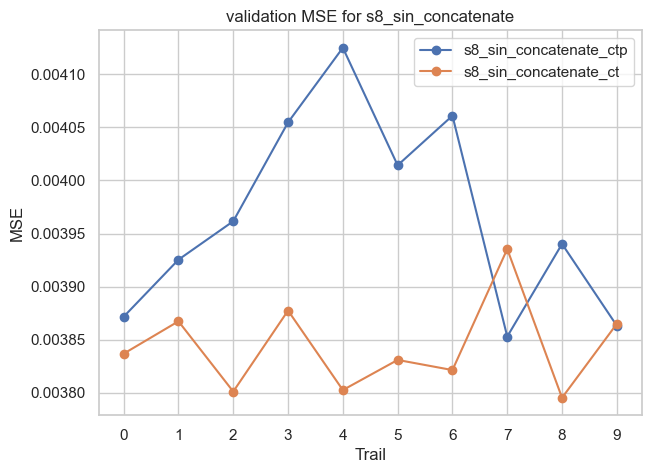

 for s8_sin_concatenate_ctp validation: mean=0.003967, std=0.000089 
 for s8_sin_concatenate_ct validation: mean=0.003843, std=0.000041 


In [98]:
compare_10_trails(data_no_t,"s8_sin_concatenate", False)

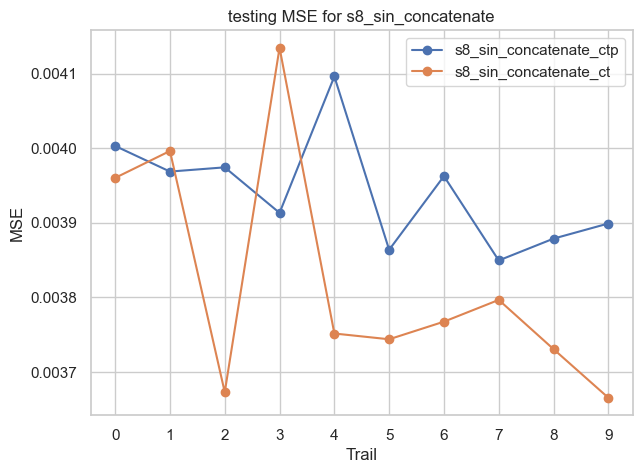

 for s8_sin_concatenate_ctp testing: mean=0.003941, std=0.000071 
 for s8_sin_concatenate_ct testing: mean=0.003822, std=0.000147 


In [99]:
compare_10_trails(data_no_t,"s8_sin_concatenate", True)

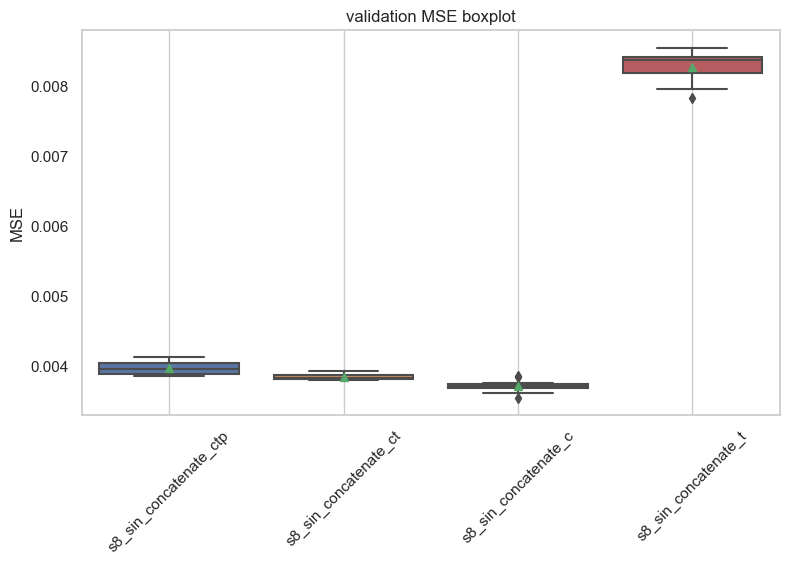

In [100]:
boxplot_vali(data, True)

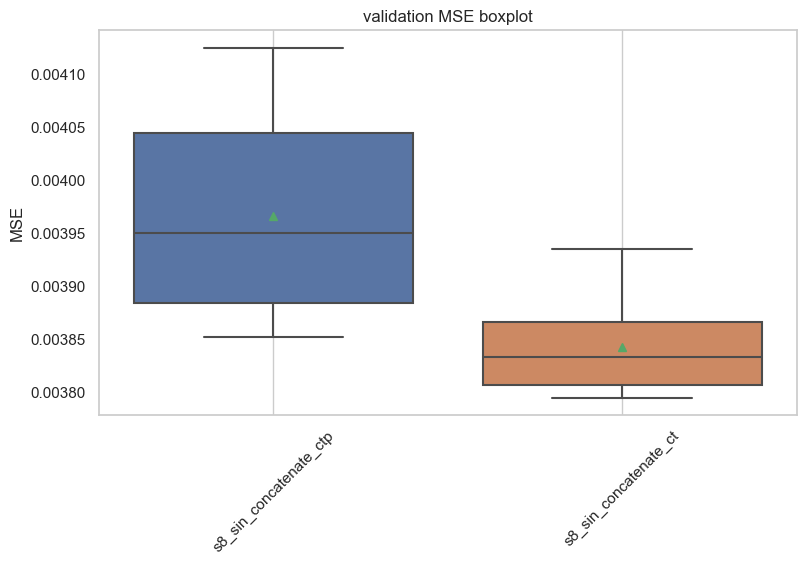

In [101]:
boxplot_vali(data_no_t, True)

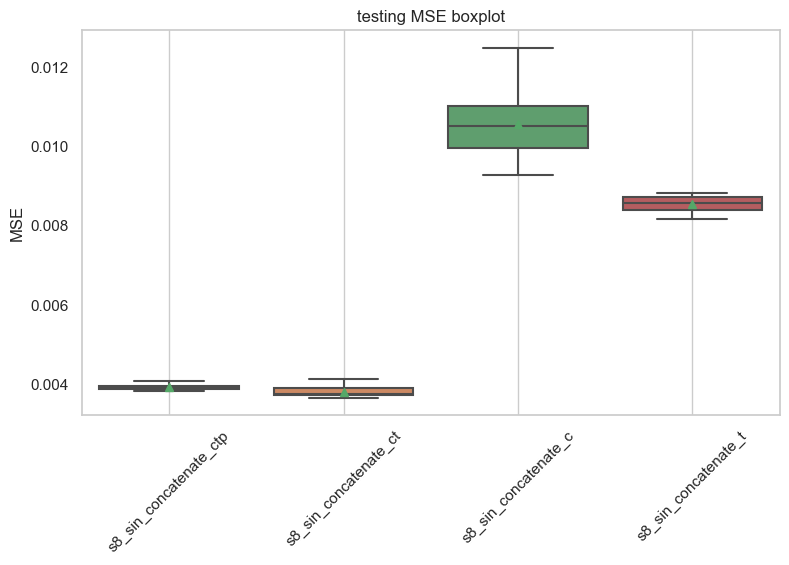

In [102]:
boxplot_test(data, True)

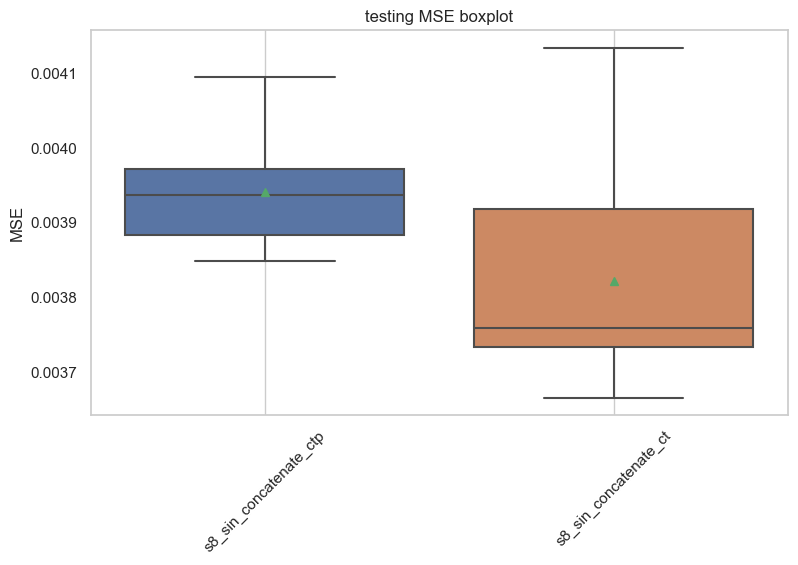

In [103]:
boxplot_test(data_no_t, True)

## Representation 9: Using the original transformer positional encoding method in transformer model.

## This representation only done in transformer model. Since its higher MSE than learnable positional encoding, we did not test it in CNN_transformer model.

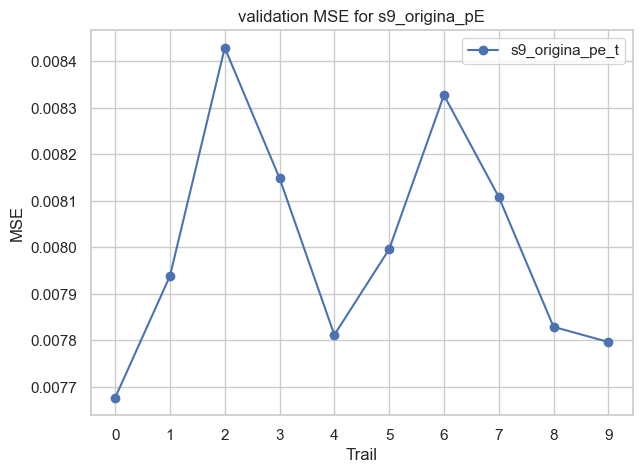

 for s9_origina_pe_t validation: mean=0.008006, std=0.000232 


In [104]:
data =  {
    "s9_origina_pe_t": s9_origina_pe_t,
}
compare_10_trails(data,"s9_origina_pE", False)

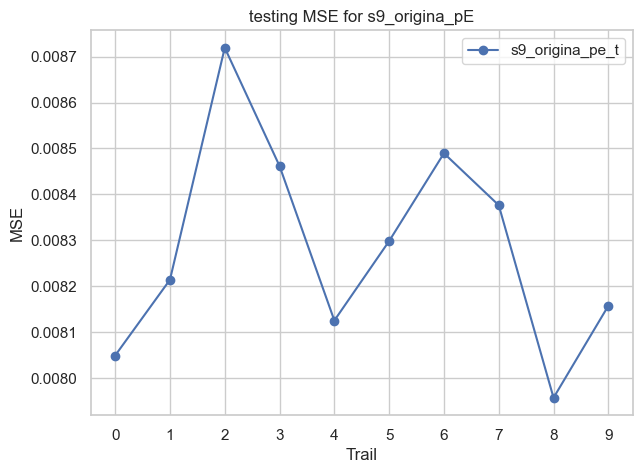

 for s9_origina_pe_t testing: mean=0.008285, std=0.000219 


In [105]:
compare_10_trails(data,"s9_origina_pE", True)

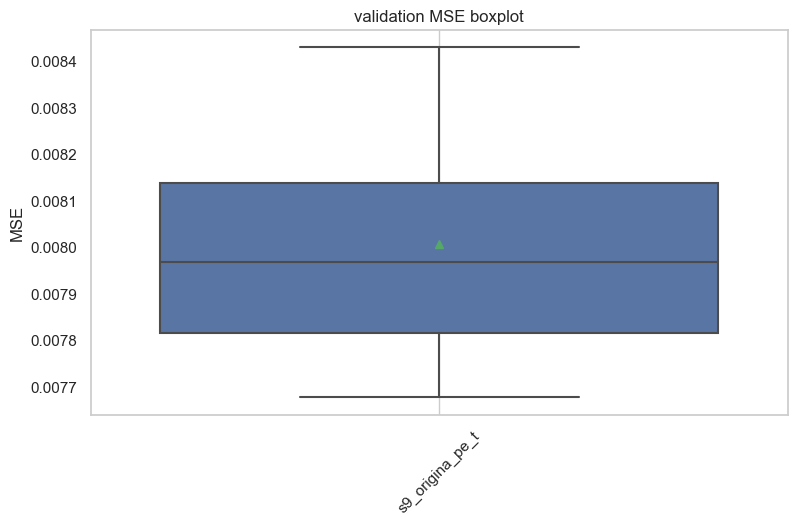

In [106]:
boxplot_vali(data, True)

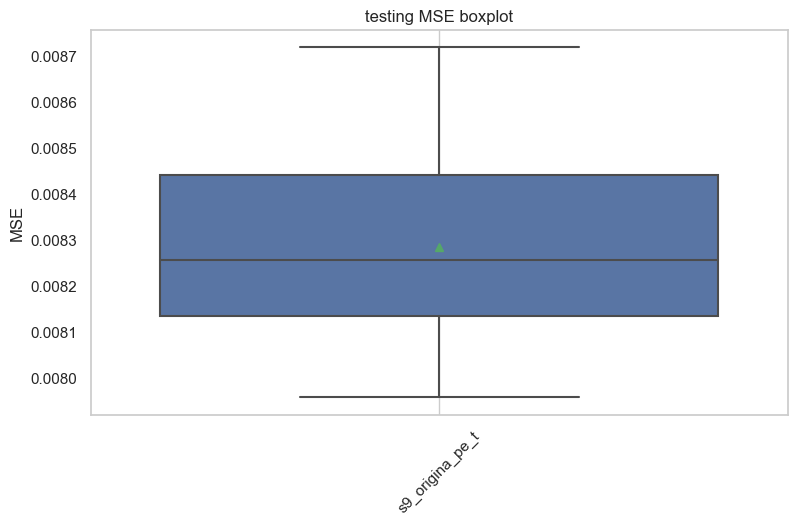

In [107]:
boxplot_test(data, True)

# PART 5: Validation and testing MSE Comparisons for different representations. (ALL)

## _c: CNN.
## _t: Transformer.
## _ct: CNN_transformer.
## _ctp: CNN_transformer with learnbale positional encoding in transformer.

s1_index_concatenate = concatenate index positional embedding at axis 1<br>
s2_no_pe = original vector<br>
s3_polynomial_1 = concatenate polynomial features at axis 1<br>
s4_polynomial_0 = concatenate polynomial features at axis 0<br>
s5_index_add = adding index positional encoding to original vector <br>
s6_learnable_add = adding learnable positional encoding to original vetcor <br>
s7_sin_add = adding sin() positional encoding to original vector<br>
s8_sin_concatenate = concatenate sin() positional encoding to axis 1<br>

In [108]:
def vali_mse_comparison(mse_dict):
    plt.figure(figsize=(20,10))
    #colors = plt.cm.rainbow(np.linspace(0, 1, len(mse_dict)))
    i=0
    for x,y in mse_dict.items():
        y = y.to_numpy(copy=True)
        y = y[:,1]
        plt.plot(y, label=x,marker='o')
        plt.grid()
        i=i+1
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.title(f'validation MSE by different representations and models')
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.legend(prop={'size': 8})

In [109]:
def test_mse_comparison(mse_dict):
    plt.figure(figsize=(20,10))
    for x,y in mse_dict.items():
        y= y.to_numpy(copy=True)
        y = y[:,2]
        plt.plot(y, label=x,marker='o')
    plt.grid()
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.title(f'testing MSE by different representations and models')
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.grid()
    plt.legend(prop={'size': 8})

In [110]:
def boxplot_vali(dictt, showmean):
    plt.figure(figsize=(20,10))
    A = []
    labelss = []
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        y = y[:,1]
        A.append(y)
        labelss.append(x)
    ax = sns.boxplot(A, showmeans=showmean)
    ax.grid()
    ax.set_xticklabels(labelss, rotation=60)
    plt.title(f'validation MSE boxplot')
    plt.ylabel('MSE')
    plt.show()

In [111]:
def boxplot_test(dictt, showmean):
    plt.figure(figsize=(20,10))
    A = []
    labelss = []
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        y = y[:,2]
        A.append(y)
        labelss.append(x)
    ax = sns.boxplot(A, showmeans=showmean)
    ax.grid()
    ax.set_xticklabels(labelss, rotation=60, fontsize=25)
    plt.title(f'testing MSE boxplot')
    plt.ylabel('MSE')
    plt.show()

In [112]:
mse_dict = {
    "s1_index_concatenate_ct": s1_index_concatenate_ct,
    "s1_index_concatenate_ctp": s1_index_concatenate_ctp,
    "s1_index_concatenate_c": s1_index_concatenate_c,
    "s1_index_concatenate_t": s1_index_concatenate_t,
    #
    "s2_no_pe_ct": s2_no_pe_ct,
    "s2_no_pe_ctp": s2_no_pe_ctp,
    "s2_no_pe_c": s2_no_pe_c,
    "s2_no_pe_t": s2_no_pe_t,
    #
    "s3_polynomial_1_ct": s3_polynomial_1_ct,
    "s3_polynomial_1_ctp": s3_polynomial_1_ctp,
    "s3_polynomial_1_c": s3_polynomial_1_c,
    "s3_polynomial_1_t": s3_polynomial_1_t,
    #
    "s4_polynomial_0_ct": s4_polynomial_0_ct, 
    "s4_polynomial_0_ctp": s4_polynomial_0_ctp, 
    "s4_polynomial_0_c": s4_polynomial_0_c, 
    #
    "s5_index_add_ct":s5_index_add_ct,
    "s5_index_add_ctp":s5_index_add_ctp,
    "s5_index_add_c":s5_index_add_c,
    "s5_index_add_t": s5_index_add_t, 
    #
    "s6_learnable_add_ct":s6_learnable_add_ct,
    "s6_learnable_add_ctp":s6_learnable_add_ctp,
    "s6_learnable_add_c":s6_learnable_add_c, 
    "s6_learnable_add_t":s6_learnable_add_t,
    #
    "s7_sin_add_ct":s7_sin_add_ct, 
    "s7_sin_add_ctp":s7_sin_add_ctp,
    "s7_sin_add_c":s7_sin_add_c,
    "s7_sin_add_t":s7_sin_add_t, 
    #
    "s8_sin_concatenate_ct":s8_sin_concatenate_ct,
    's8_sin_concatenate_ctp':s8_sin_concatenate_ctp,
    's8_sin_concatenate_c':s8_sin_concatenate_c,
    "s8_sin_concatenate_t":s8_sin_concatenate_t,
    #
    's9_origina_pe_t':s9_origina_pe_t,
}


mse_dict_no_t = {
    "s1_index_concatenate_ct": s1_index_concatenate_ct,
    "s1_index_concatenate_ctp": s1_index_concatenate_ctp,
    "s1_index_concatenate_c": s1_index_concatenate_c,

    #
    "s2_no_pe_ct": s2_no_pe_ct,
    "s2_no_pe_ctp": s2_no_pe_ctp,
    "s2_no_pe_c": s2_no_pe_c,
    #
    "s3_polynomial_1_ct": s3_polynomial_1_ct,
    "s3_polynomial_1_ctp": s3_polynomial_1_ctp,
    "s3_polynomial_1_c": s3_polynomial_1_c,
    #
    "s4_polynomial_0_ct": s4_polynomial_0_ct, 
    "s4_polynomial_0_ctp": s4_polynomial_0_ctp, 
    "s4_polynomial_0_c": s4_polynomial_0_c, 
    #
    "s5_index_add_ct":s5_index_add_ct,
    "s5_index_add_ctp":s5_index_add_ctp,
    "s5_index_add_c":s5_index_add_c,
    #
    "s6_learnable_add_ct":s6_learnable_add_ct,
    "s6_learnable_add_ctp":s6_learnable_add_ctp,
    #"s6_learnable_add_c":s6_learnable_add_c, 
    #
    "s7_sin_add_ct":s7_sin_add_ct, 
    "s7_sin_add_ctp":s7_sin_add_ctp,
    #"s7_sin_add_c":s7_sin_add_c,
    #
    "s8_sin_concatenate_ct":s8_sin_concatenate_ct,
    's8_sin_concatenate_ctp':s8_sin_concatenate_ctp,
    #'s8_sin_concatenate_c':s8_sin_concatenate_c,
    #
}

In [113]:
def sort_testing_MSE_dict(dictt):
    A = {}
    result = {}
    i = 0
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        y = y[:,2]
        mean = np.mean(y)
        o = {x: mean}
        A.update(o)
    A = {k: v for k, v in sorted(A.items(), key=lambda item: item[1])}
    #print(A)
    for x,y in A.items():
        #print(x)
        y = dictt.get(x)
        #print(y)
        o = {x: y}
        result.update(o)
    return result

### MSE boxplot for all models and representations. 

### Same representation has been put together with order of [_ct, _ctp, _c, _t] , each of which coresponds to CNN_transformer, CNN_transformer with learnable positional encoding, CNN, transformer.

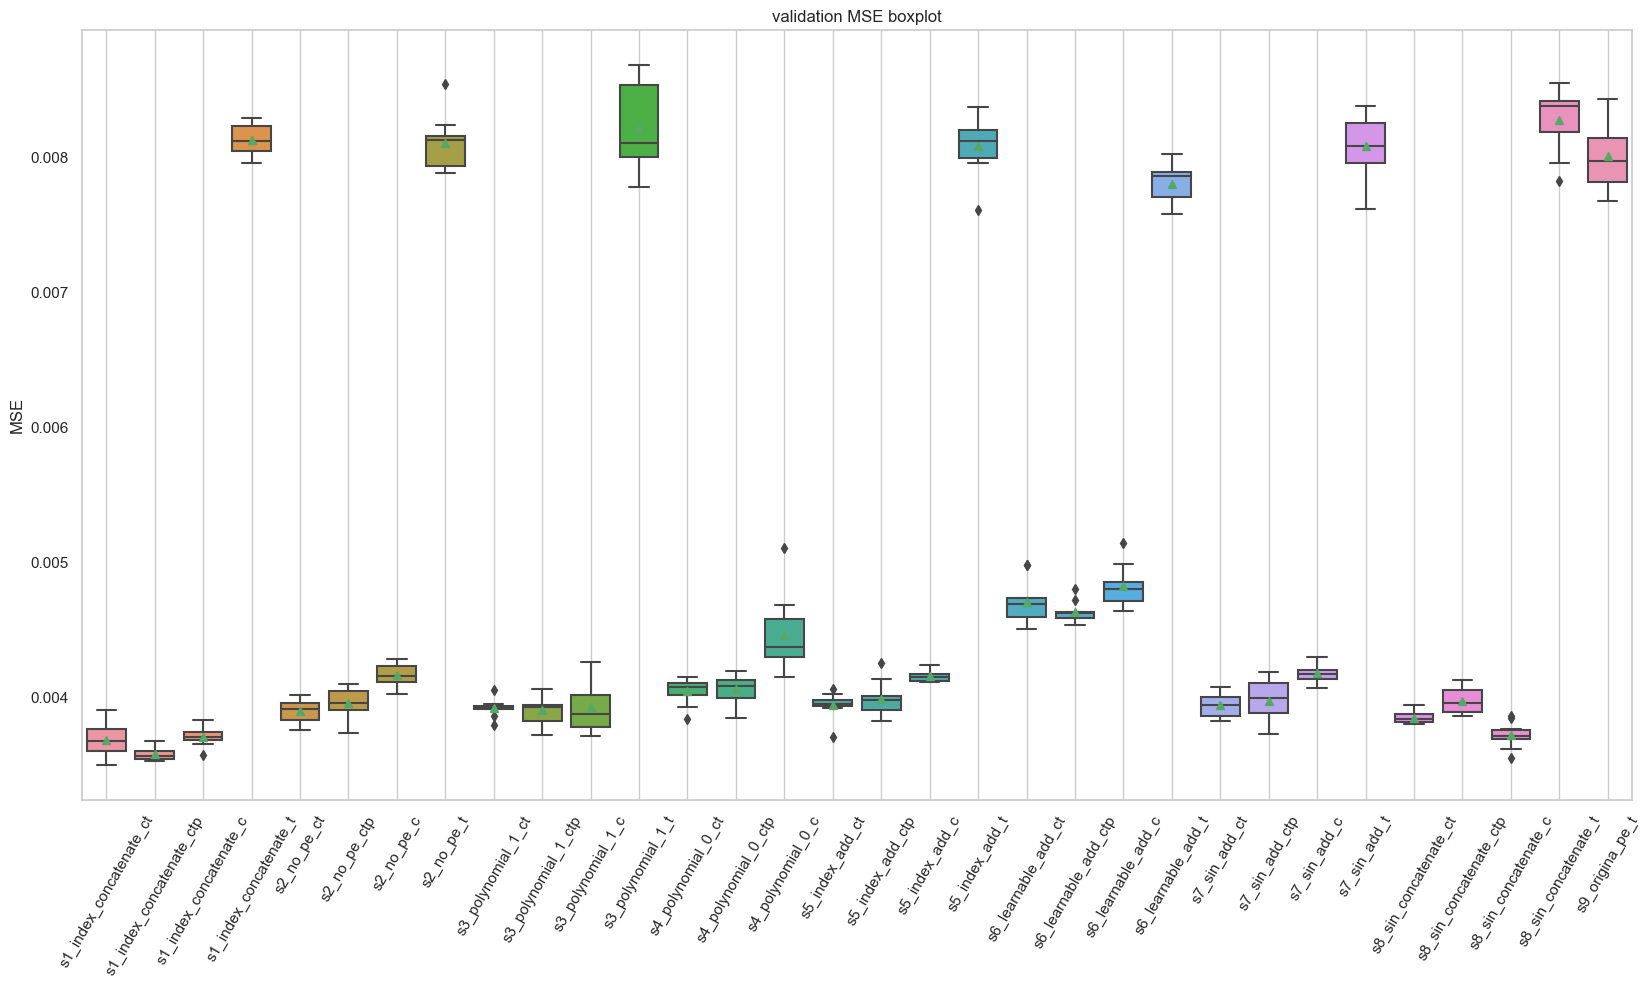

In [114]:
boxplot_vali(mse_dict, True)

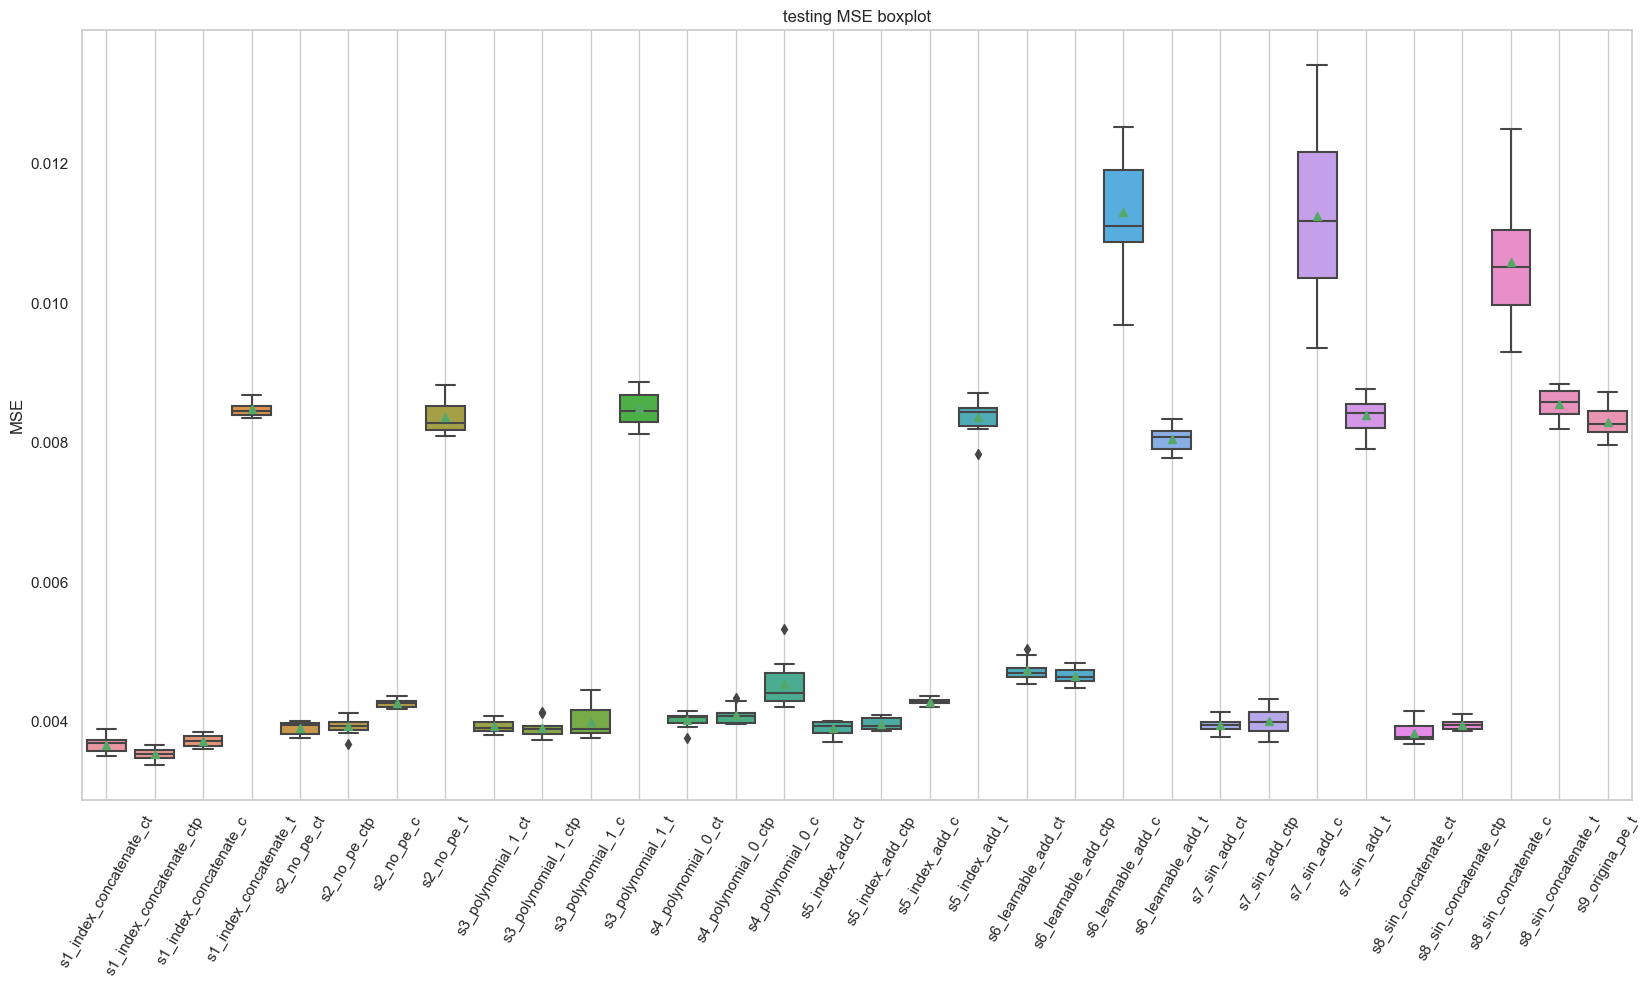

In [115]:
boxplot_test(mse_dict, True)

### MSE boxplot excludes transformer models and s6, s7, s8 of CNN

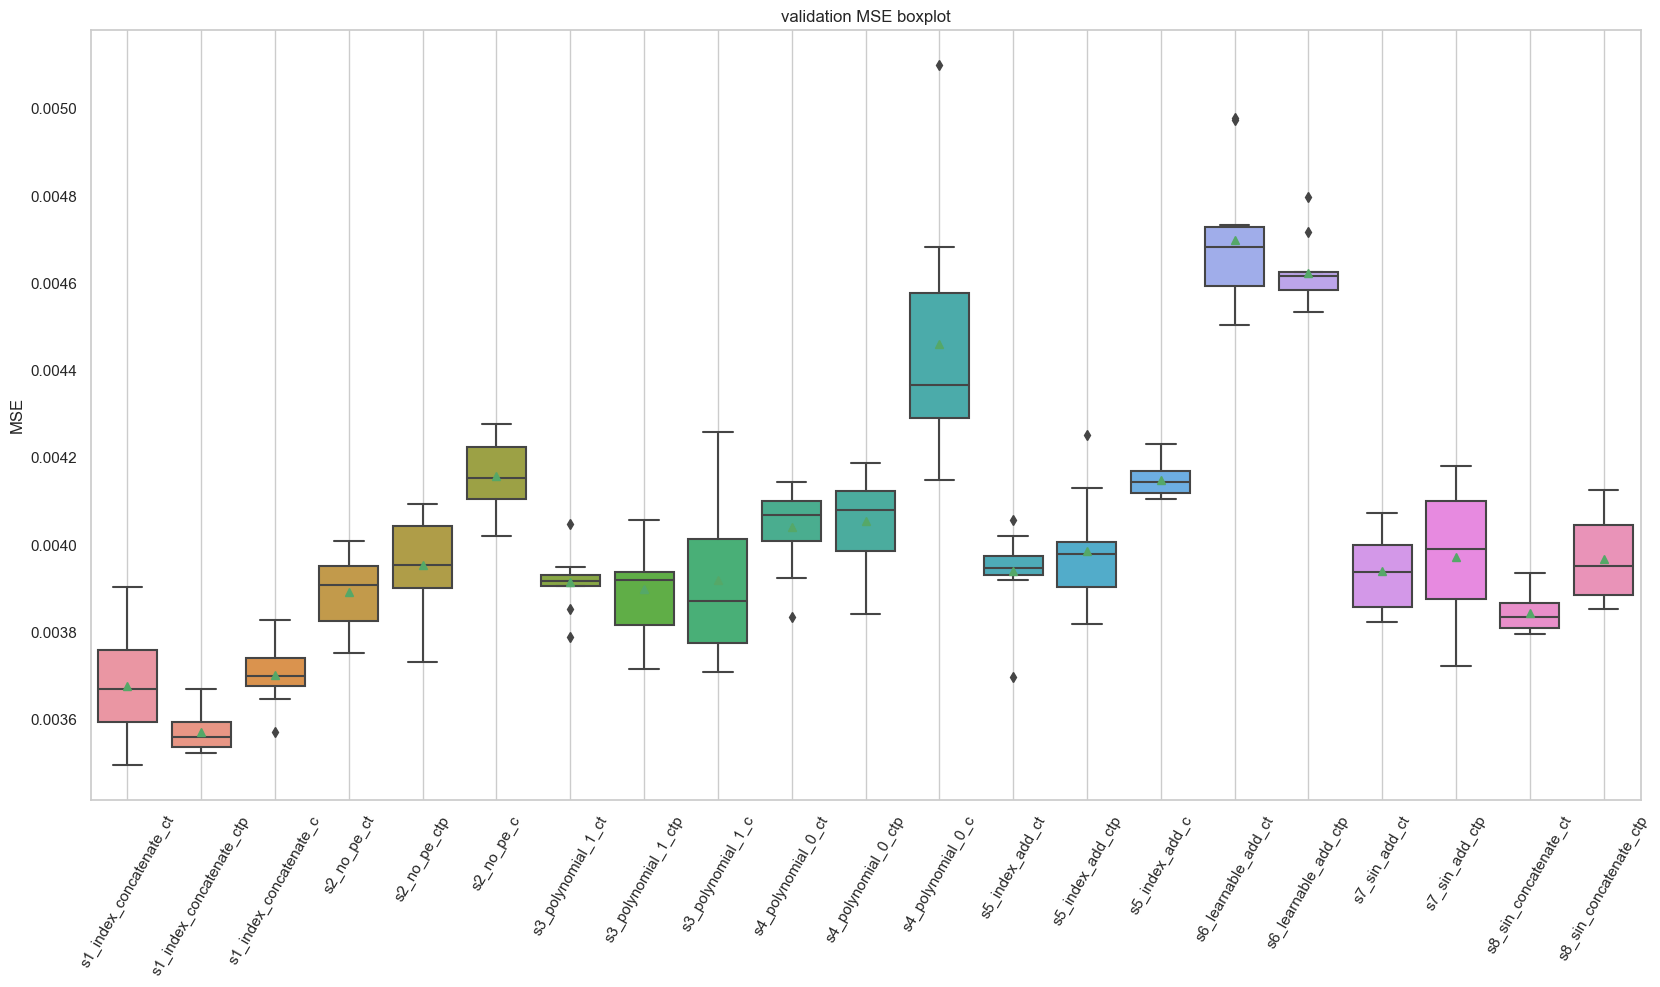

In [116]:
boxplot_vali(mse_dict_no_t, True)

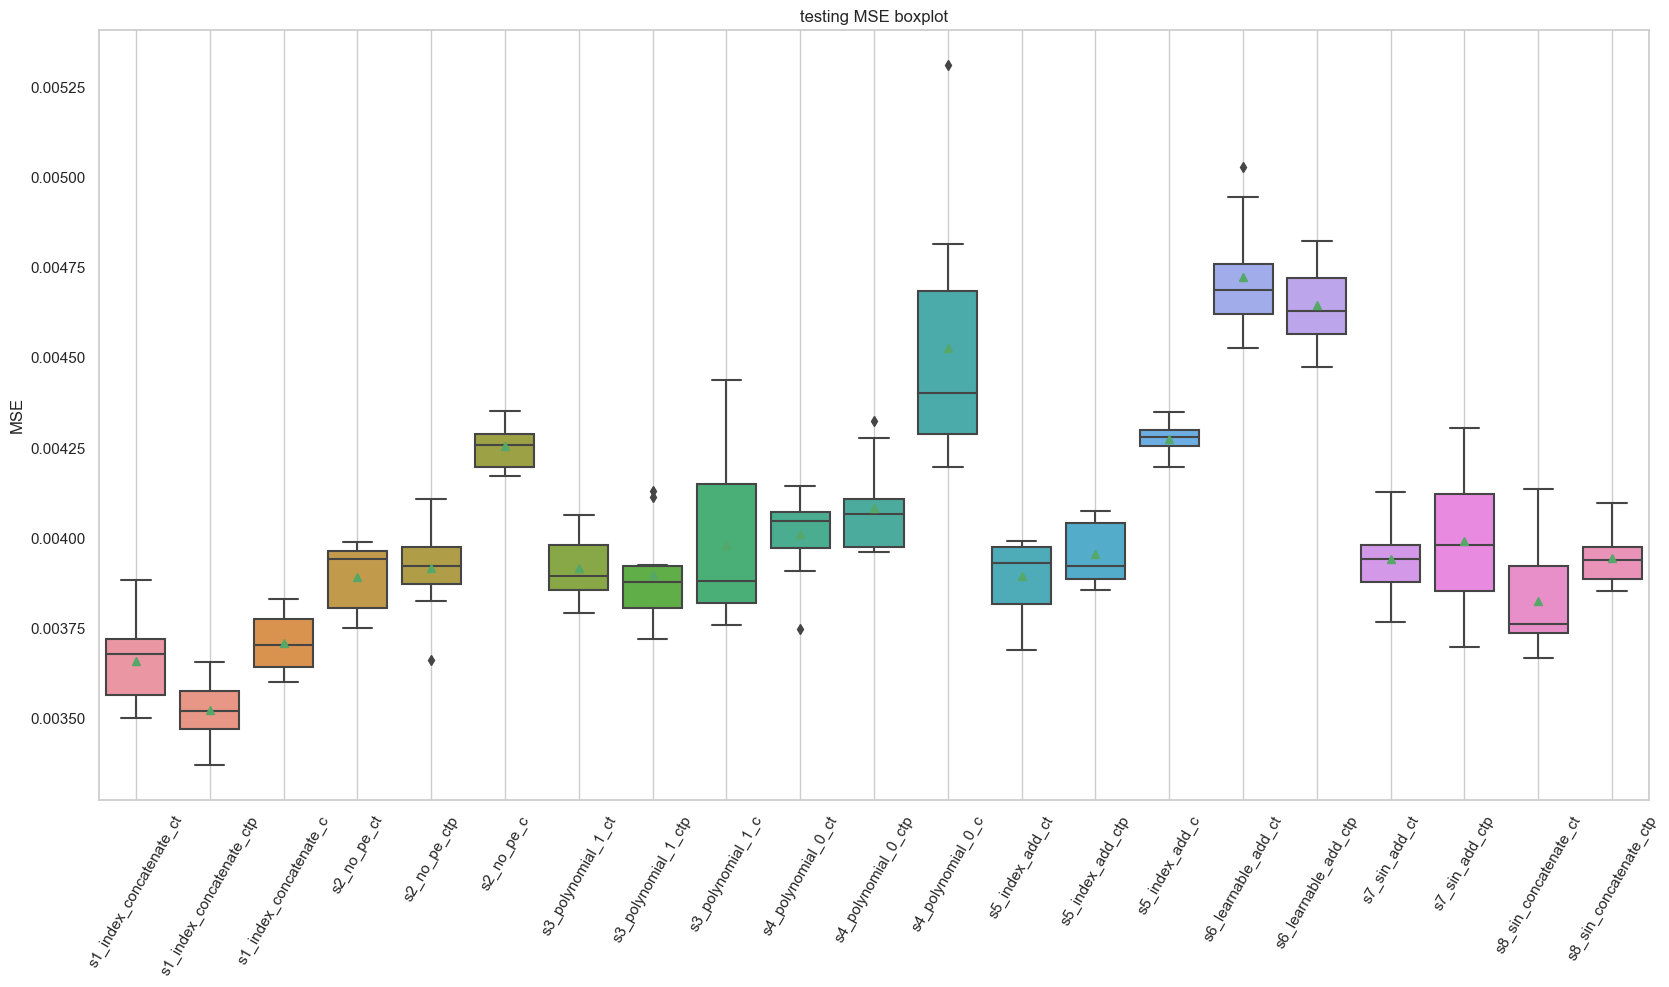

In [117]:
boxplot_test(mse_dict_no_t, True)

### Sorted MSE boxplot acorading to testing MSE mean values from small to large 

In [118]:
mse_dict = sort_testing_MSE_dict(mse_dict)

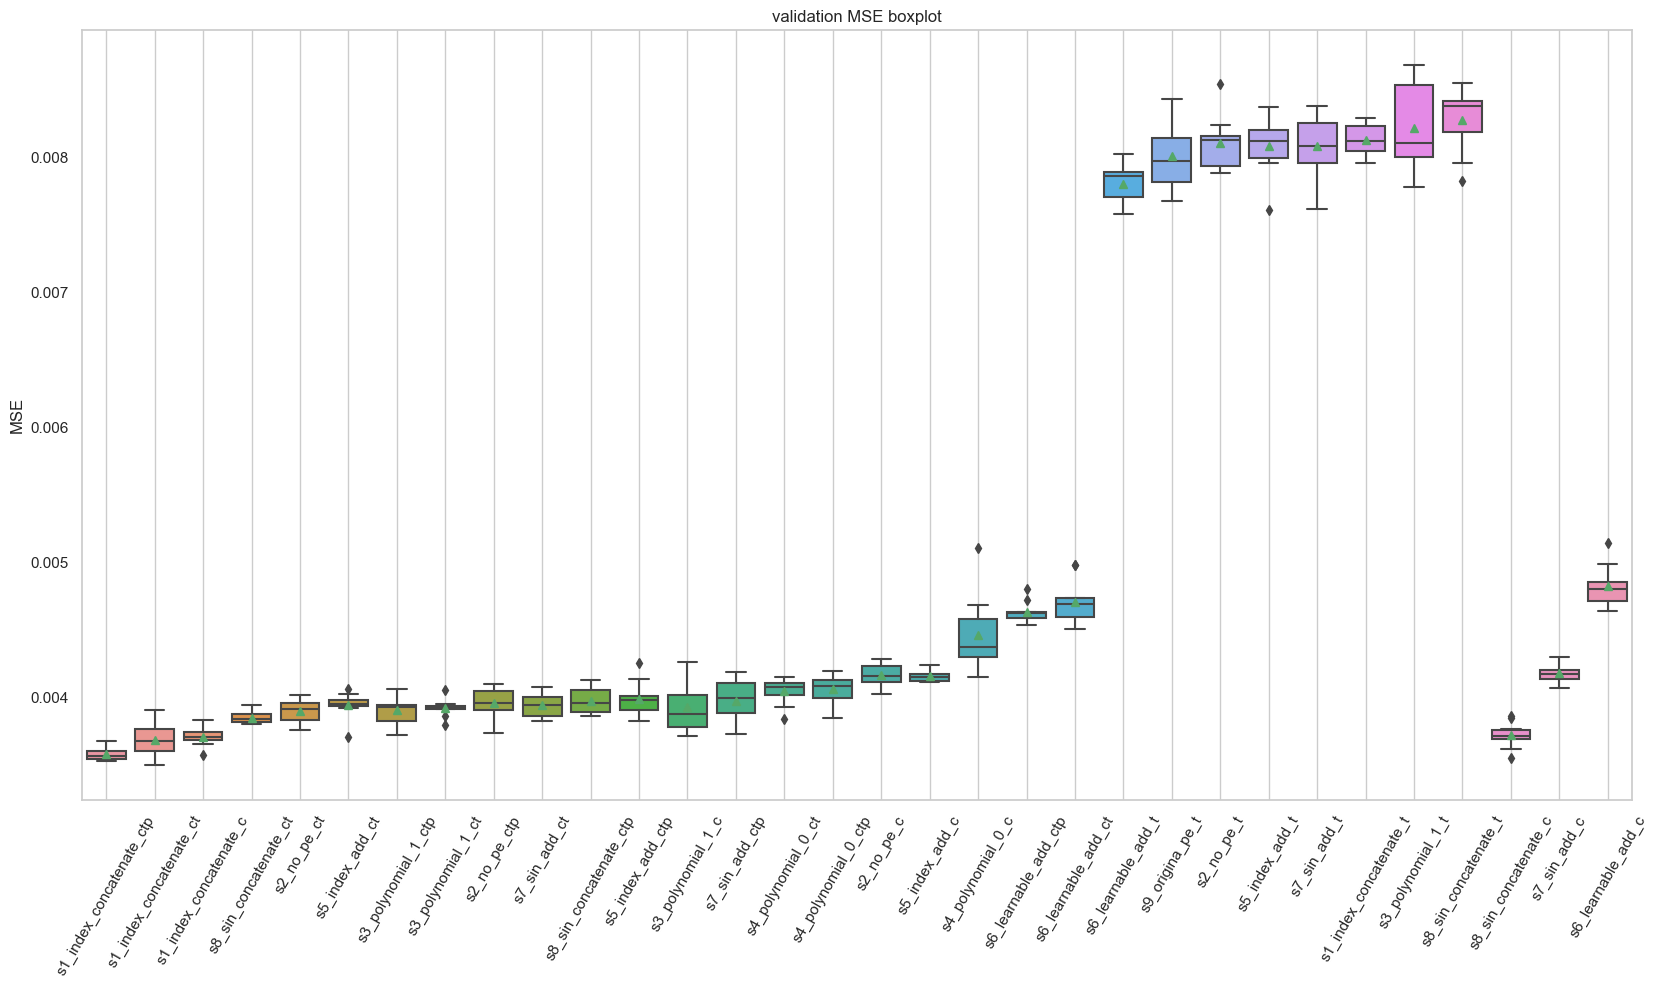

In [119]:
boxplot_vali(mse_dict, True)

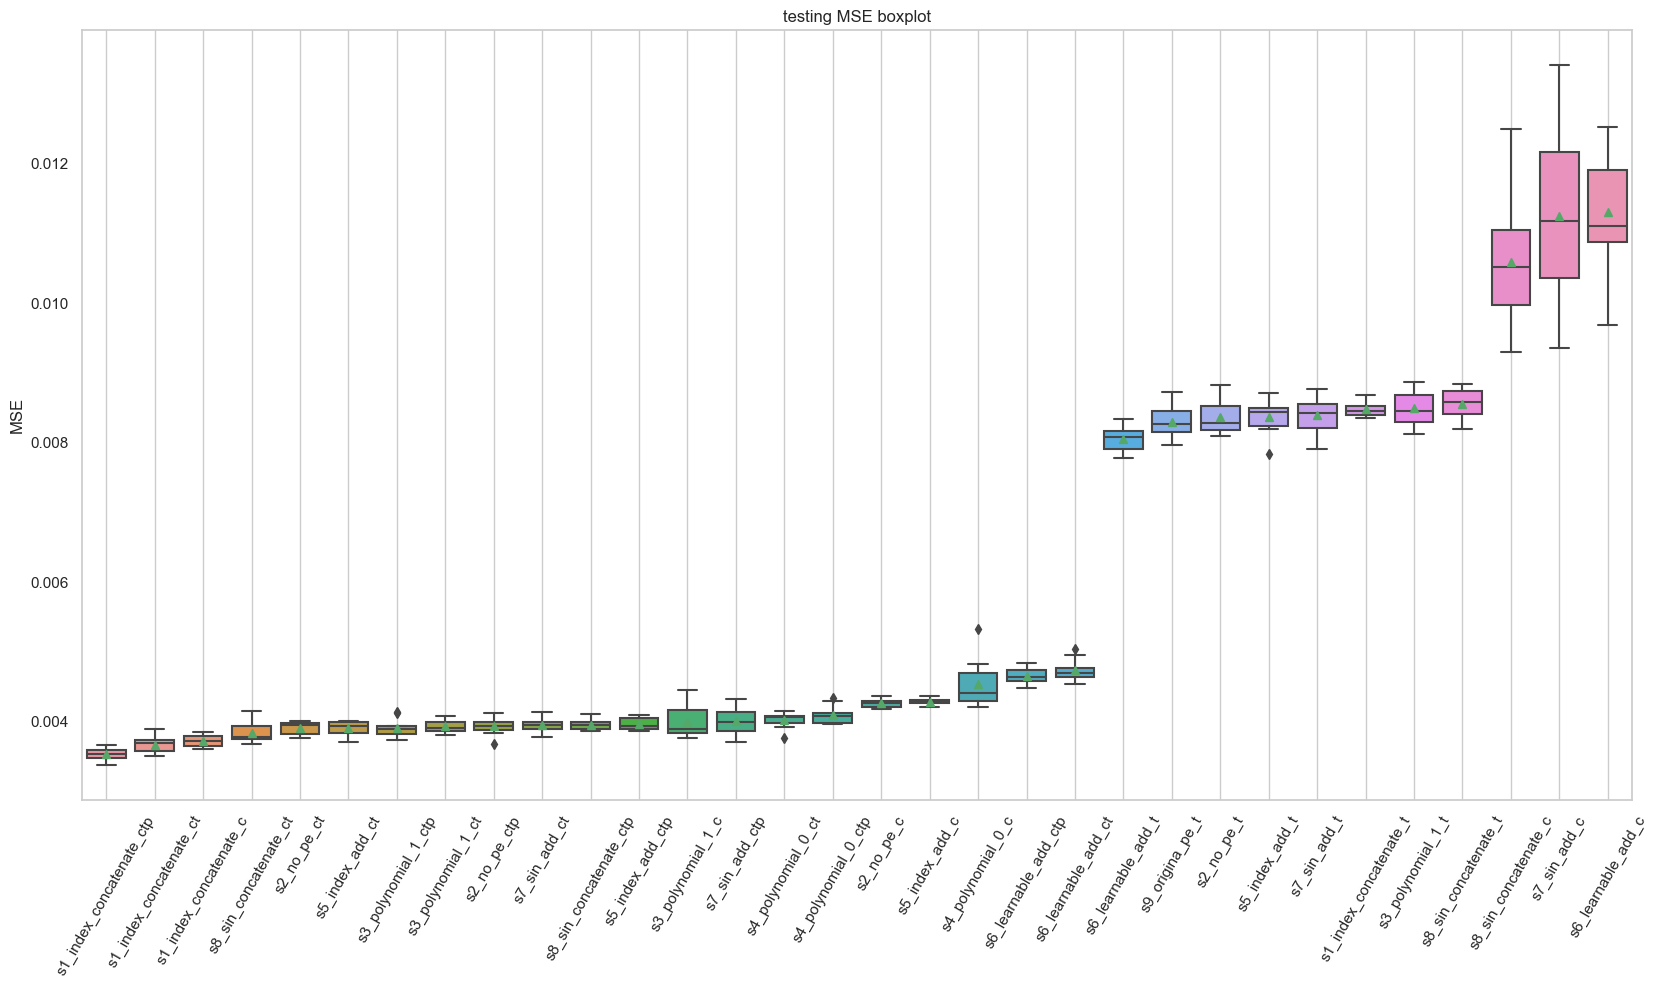

In [120]:
boxplot_test(mse_dict, True)

### Sorted MSE boxplot excludes transformer models and s6, s7, s8 of CNN

In [121]:
mse_dict_no_t = sort_testing_MSE_dict(mse_dict_no_t)

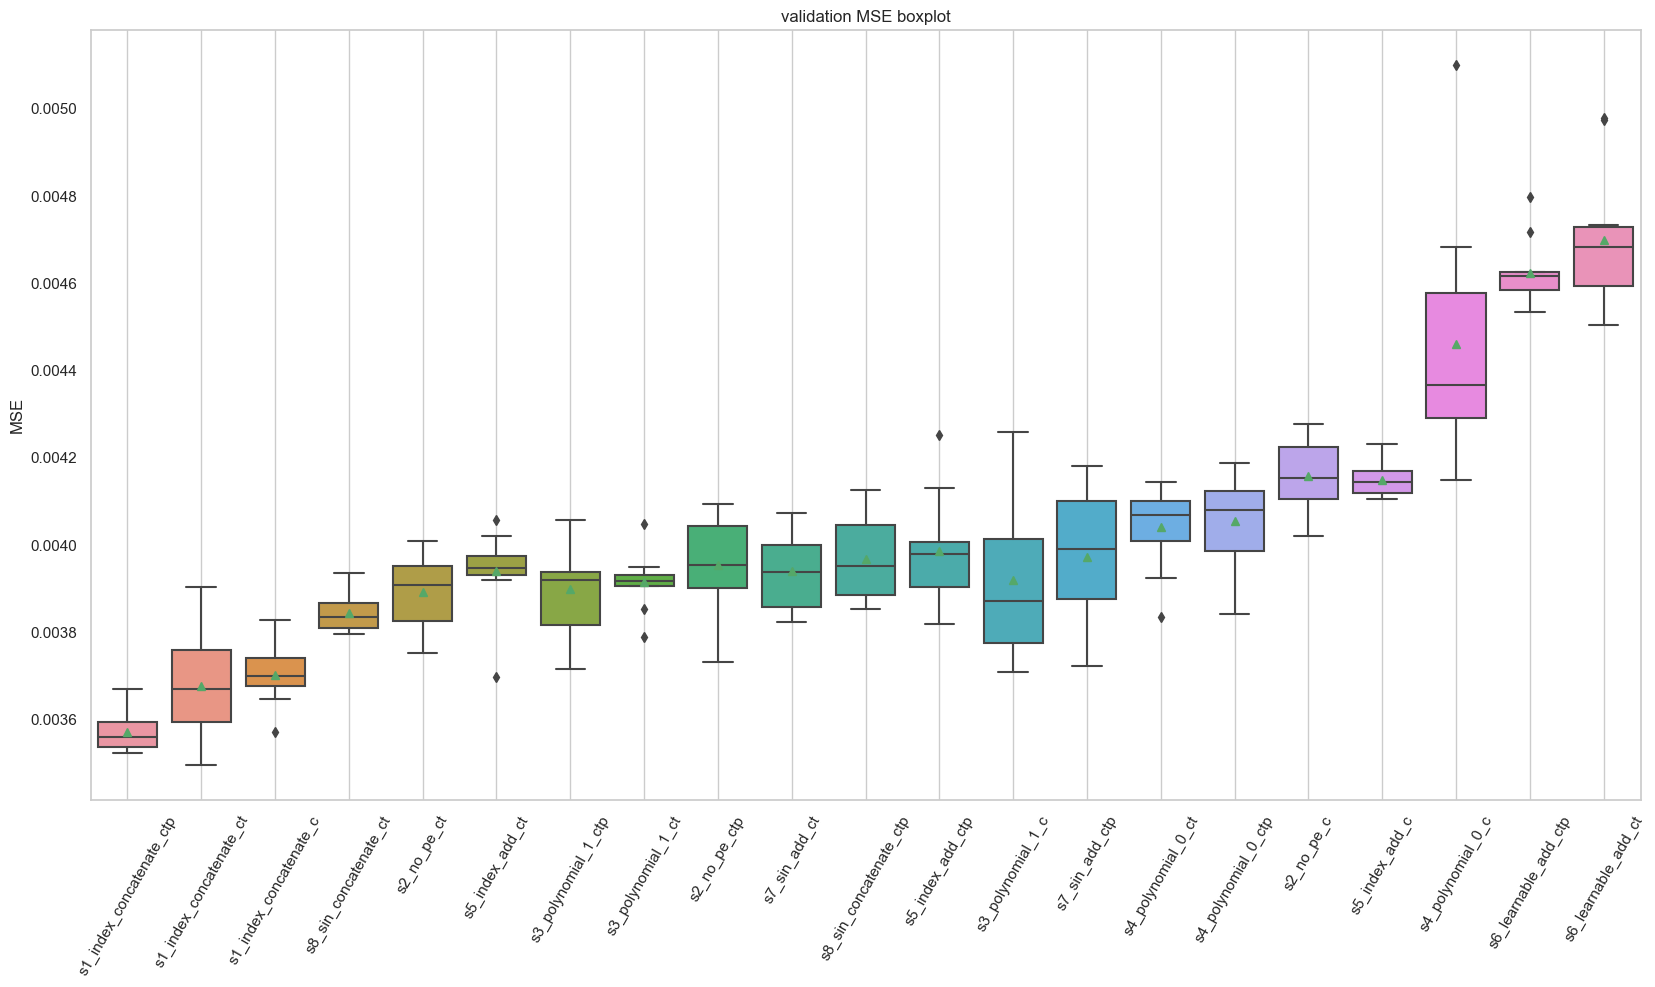

In [122]:
boxplot_vali(mse_dict_no_t, True)

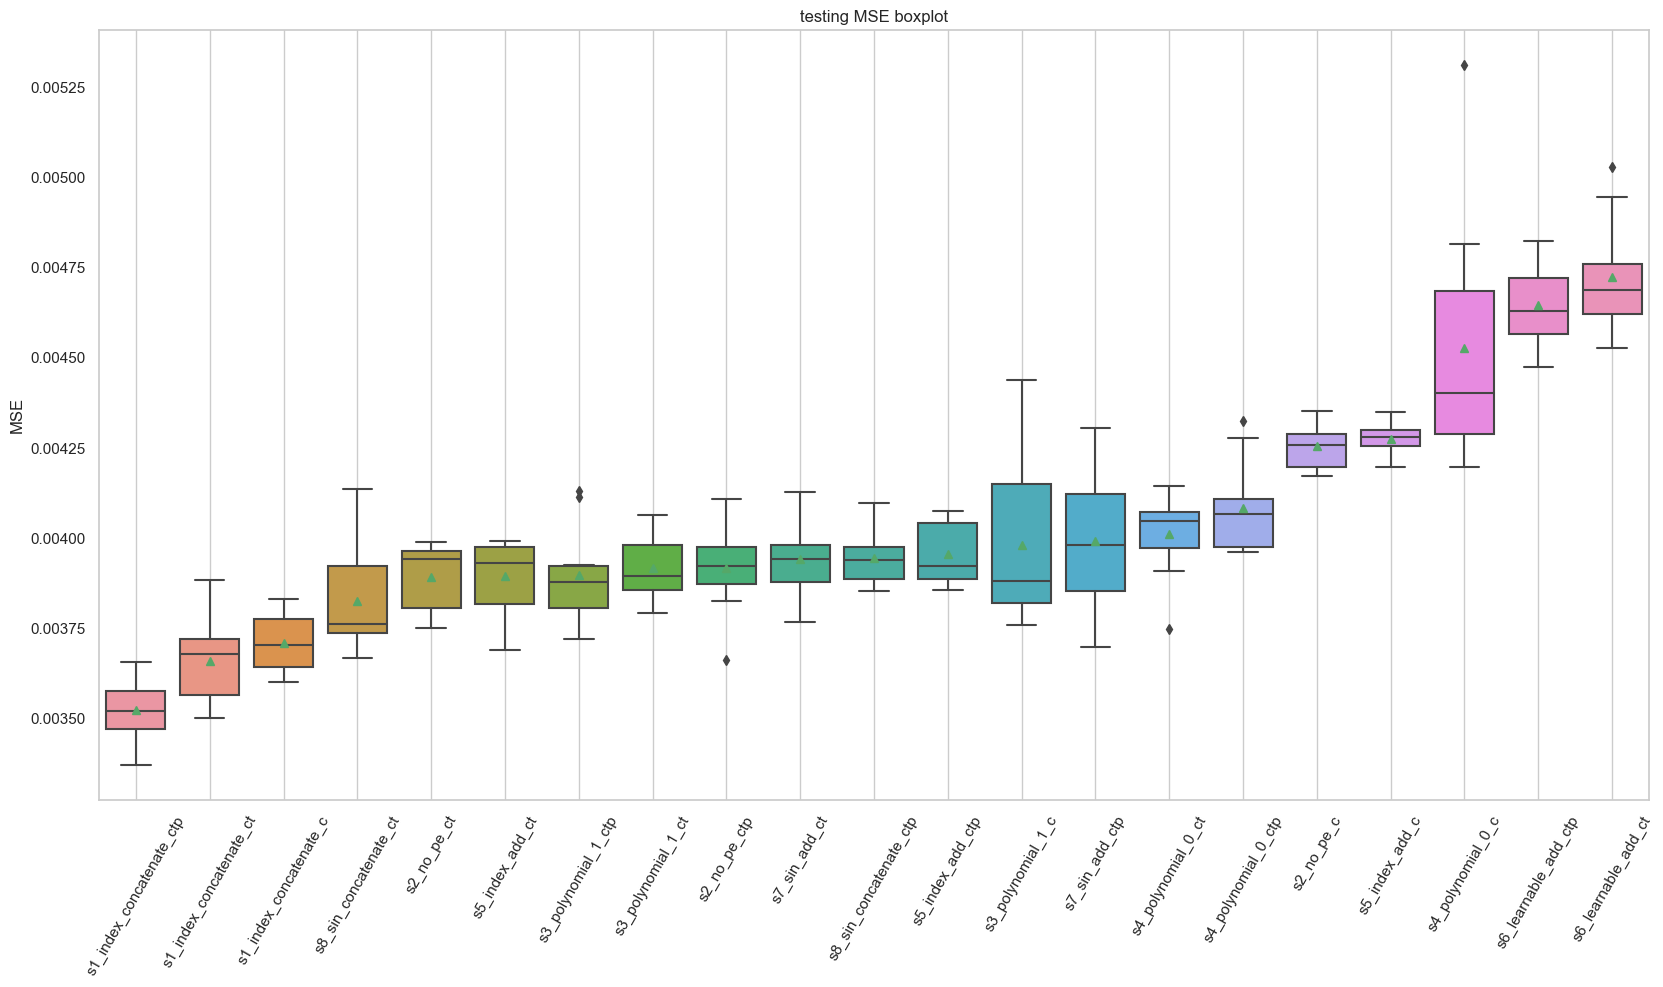

In [123]:
boxplot_test(mse_dict_no_t, True)

### Comparing MSE boxplot for CNN_transformer 

In [218]:
def boxplot_test(dictt, showmean, font, angle):
    plt.figure(figsize=(20,10))
    A = []
    labelss = []
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        y = y[:,2]
        A.append(y)
        labelss.append(x)
    ax = sns.boxplot(A, showmeans=showmean)
    ax.grid()
    ax.set_xticklabels(labelss, rotation=angle, fontsize=font)
    plt.title(f'testing MSE boxplot')
    plt.ylabel('MSE')
    plt.show()

In [219]:
def boxplot_vali(dictt, showmean, font, angle):
    plt.figure(figsize=(20,10))
    A = []
    labelss = []
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        y = y[:,1]
        A.append(y)
        labelss.append(x)
    ax = sns.boxplot(A, showmeans=showmean)
    ax.grid()
    ax.set_xticklabels(labelss, rotation=angle,fontsize=font)
    plt.title(f'validation MSE boxplot')
    plt.ylabel('MSE')
    plt.show()

In [220]:
mse_dict_ct = {
    "index_concatenate_ct": s1_index_concatenate_ct,
    #
    "original_vector_ct": s2_no_pe_ct,
    #
    "polynomial_1_ct": s3_polynomial_1_ct,
    #
    "polynomial_0_ct": s4_polynomial_0_ct, 
    #
    "index_add_ct":s5_index_add_ct,
    #
    "learnable_add_ct":s6_learnable_add_ct,
    #
    "sinusoidal_add_ct":s7_sin_add_ct, 
    #
    "sinusoidal_concatenate_ct":s8_sin_concatenate_ct,
}


In [221]:
mse_dict = sort_testing_MSE_dict(mse_dict_ct)

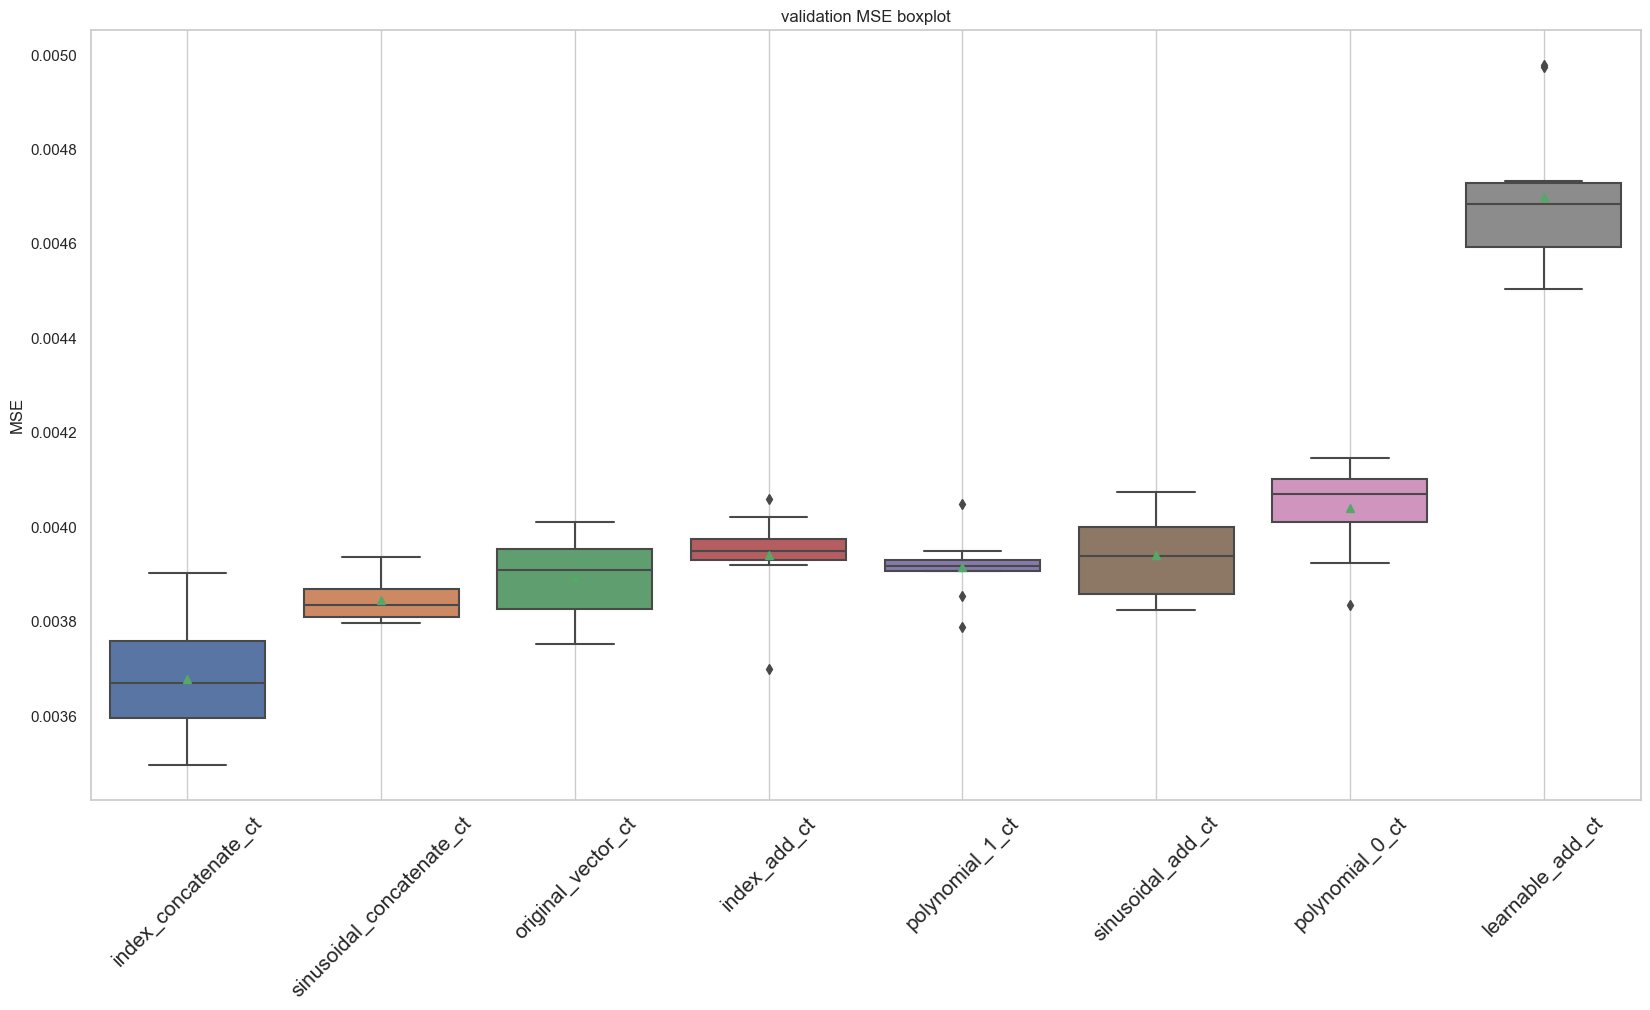

In [222]:
boxplot_vali(mse_dict, True, 15, 45)

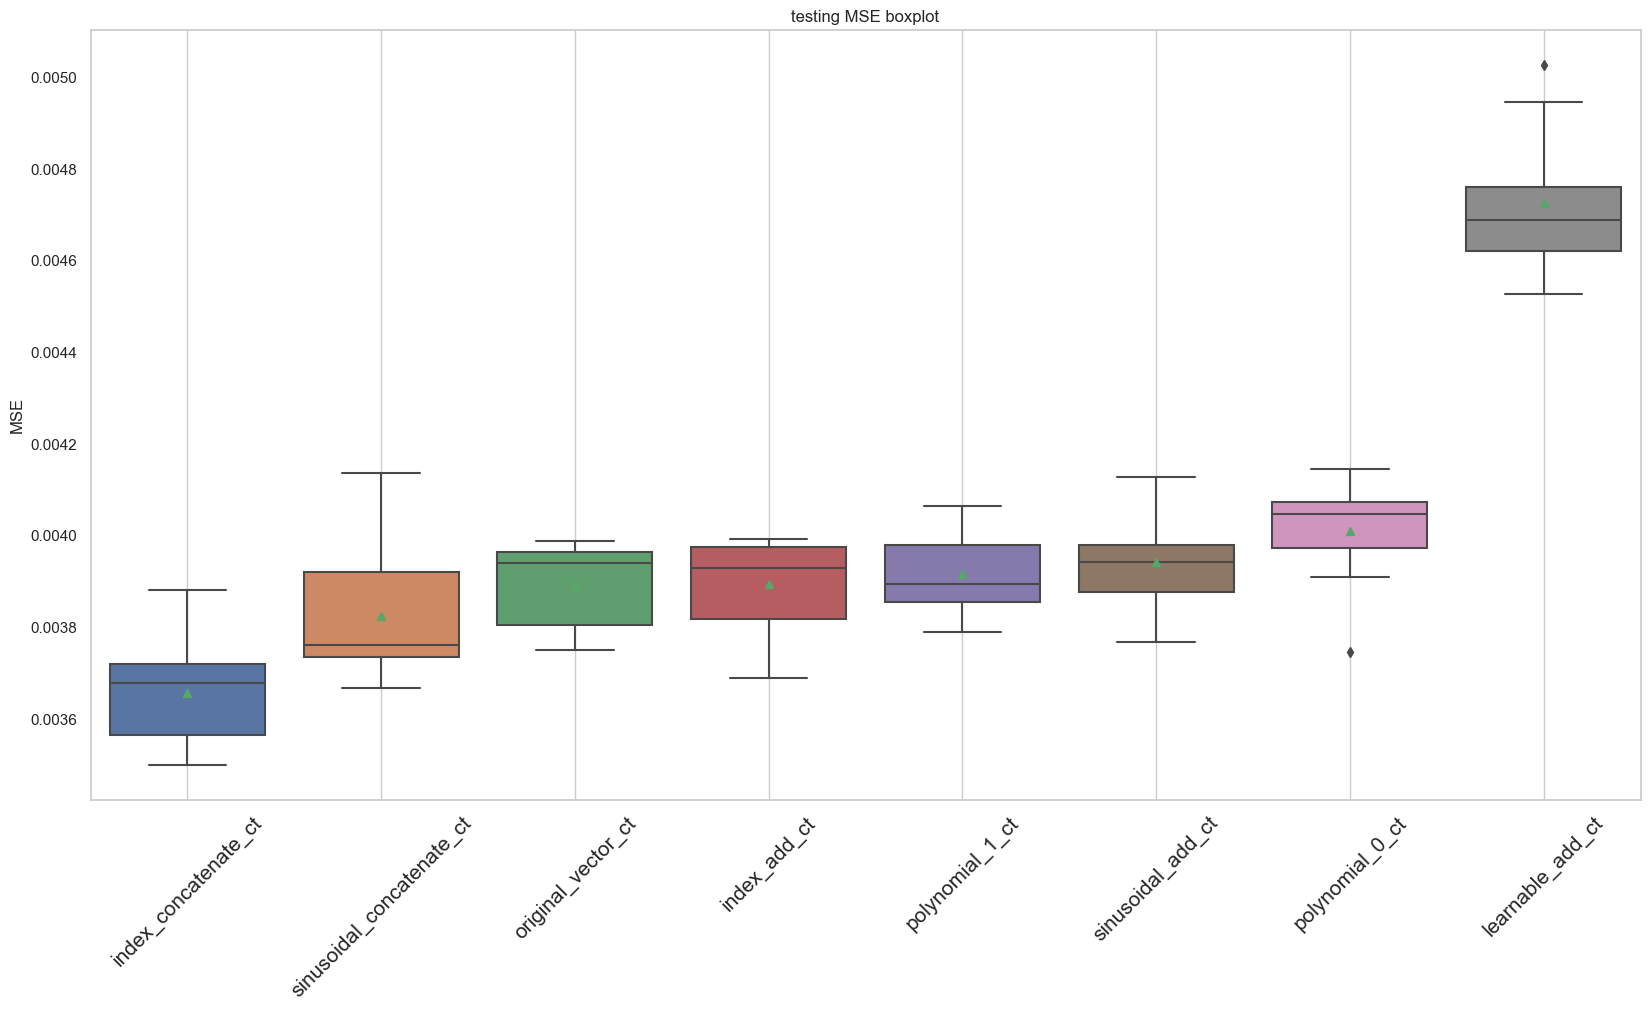

In [224]:
boxplot_test(mse_dict, True, 15, 45)

### Comparing MSE boxplot for four models based on original vector representation.

In [225]:
mse_dict_origin = {
    "original_vector_ct": s2_no_pe_ct,
    "original_vector_ctp": s2_no_pe_ctp,
    "original_vector_c": s2_no_pe_c,
    "original_vector_t": s2_no_pe_t,
}
mse_dict_origin_nt = {
    "original_vector_ct": s2_no_pe_ct,
    "original_vector_ctp": s2_no_pe_ctp,
    "original_vector_c": s2_no_pe_c,
}

In [226]:
mse_dict_origin = sort_testing_MSE_dict(mse_dict_origin)
mse_dict_origin_nt = sort_testing_MSE_dict(mse_dict_origin_nt)

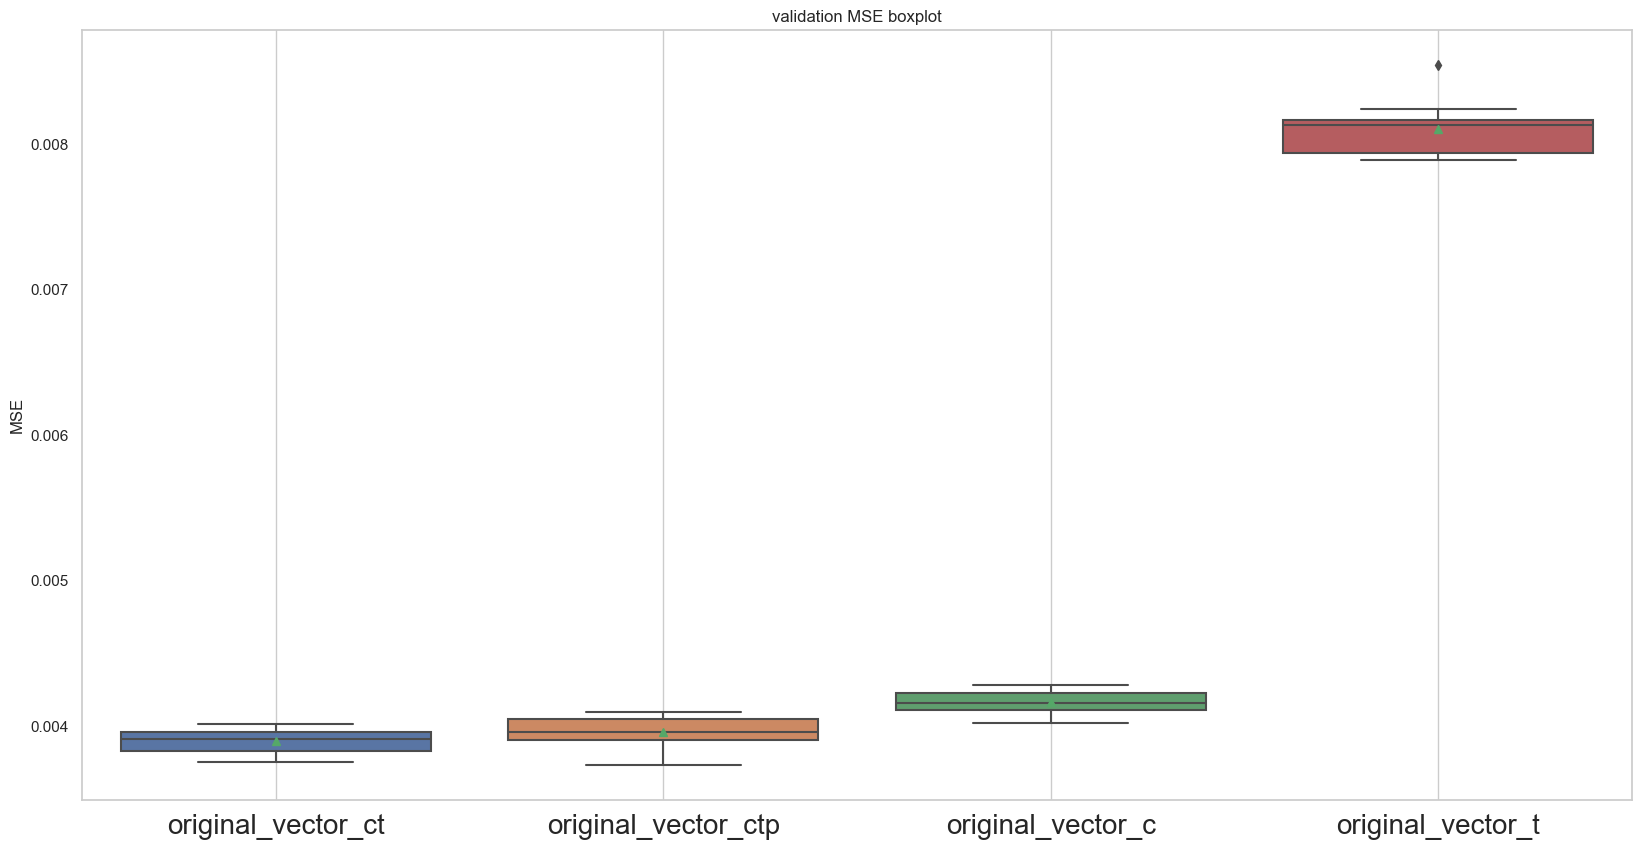

In [228]:
boxplot_vali(mse_dict_origin, True, 20, 0)

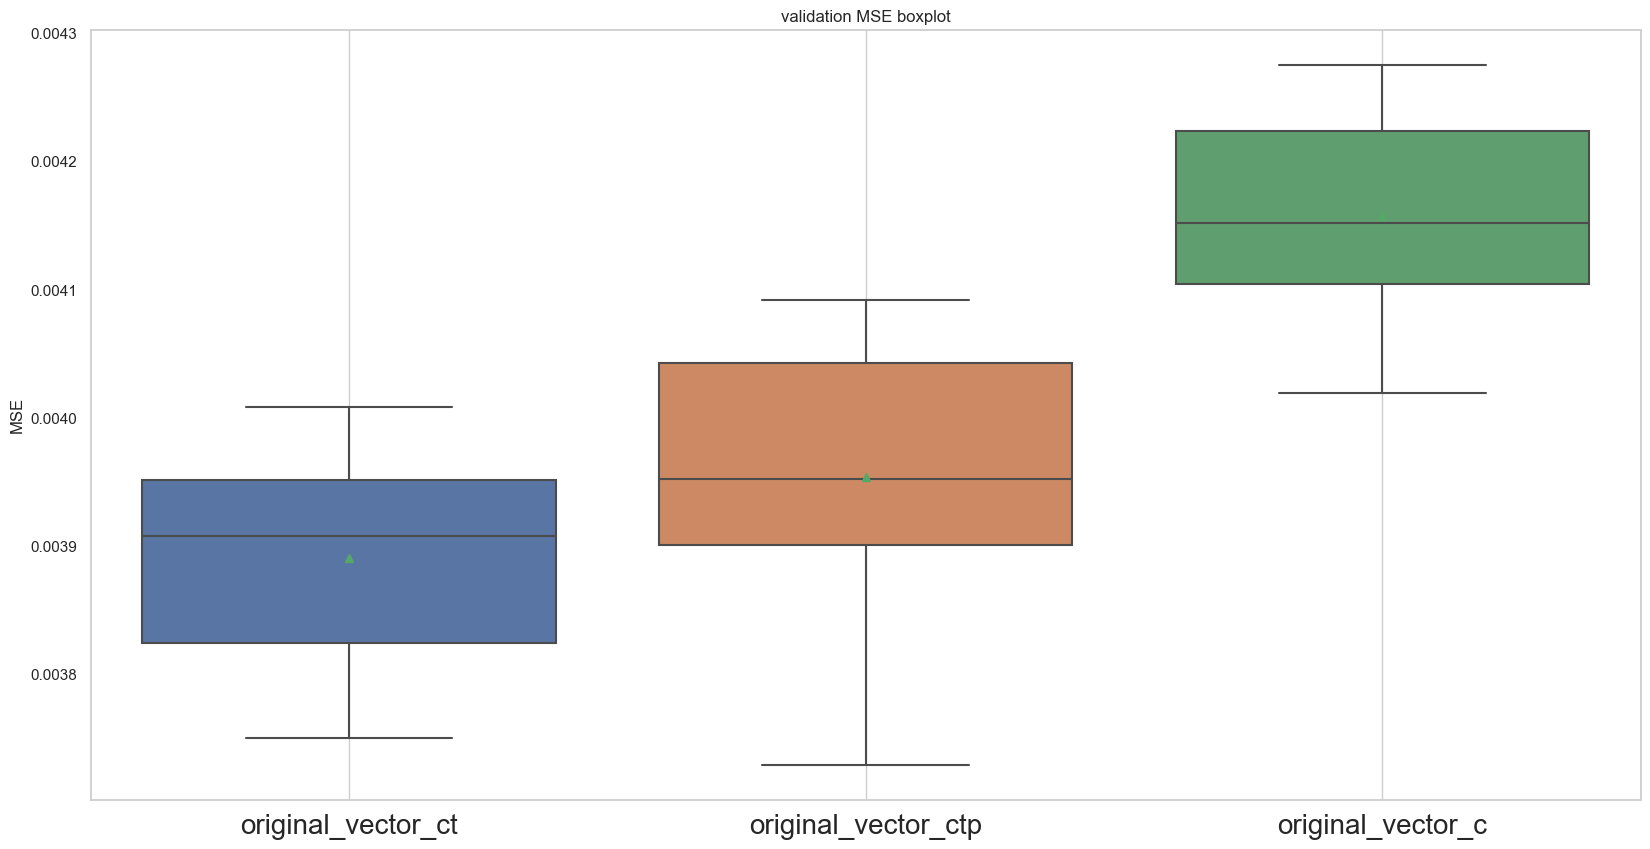

In [231]:
boxplot_vali(mse_dict_origin_nt, True, 20, 0)

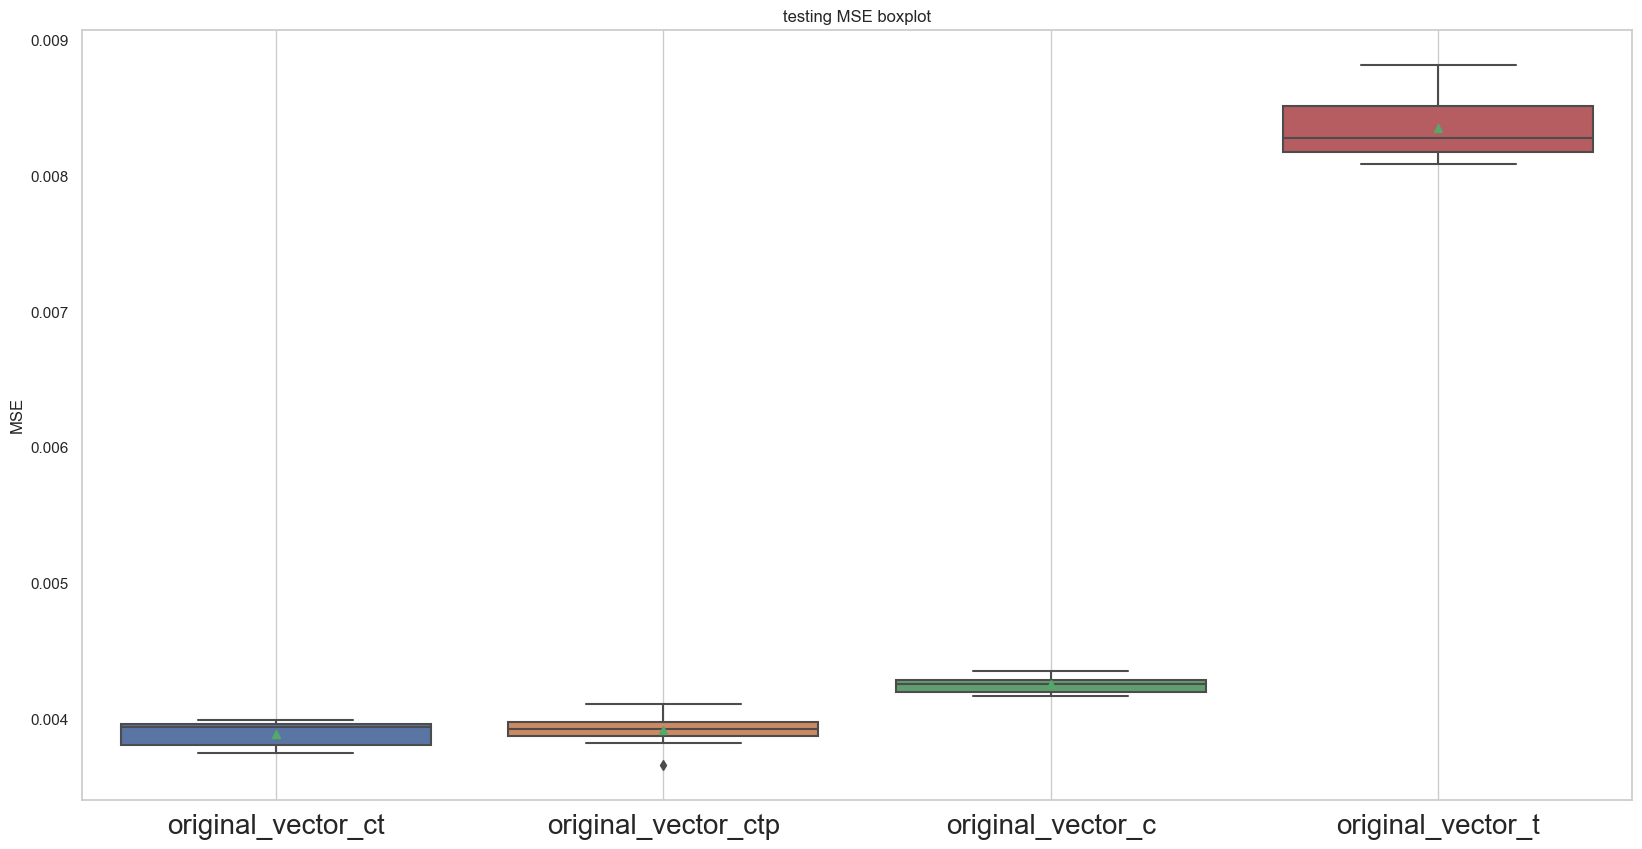

In [229]:
boxplot_test(mse_dict_origin, True, 20, 0)

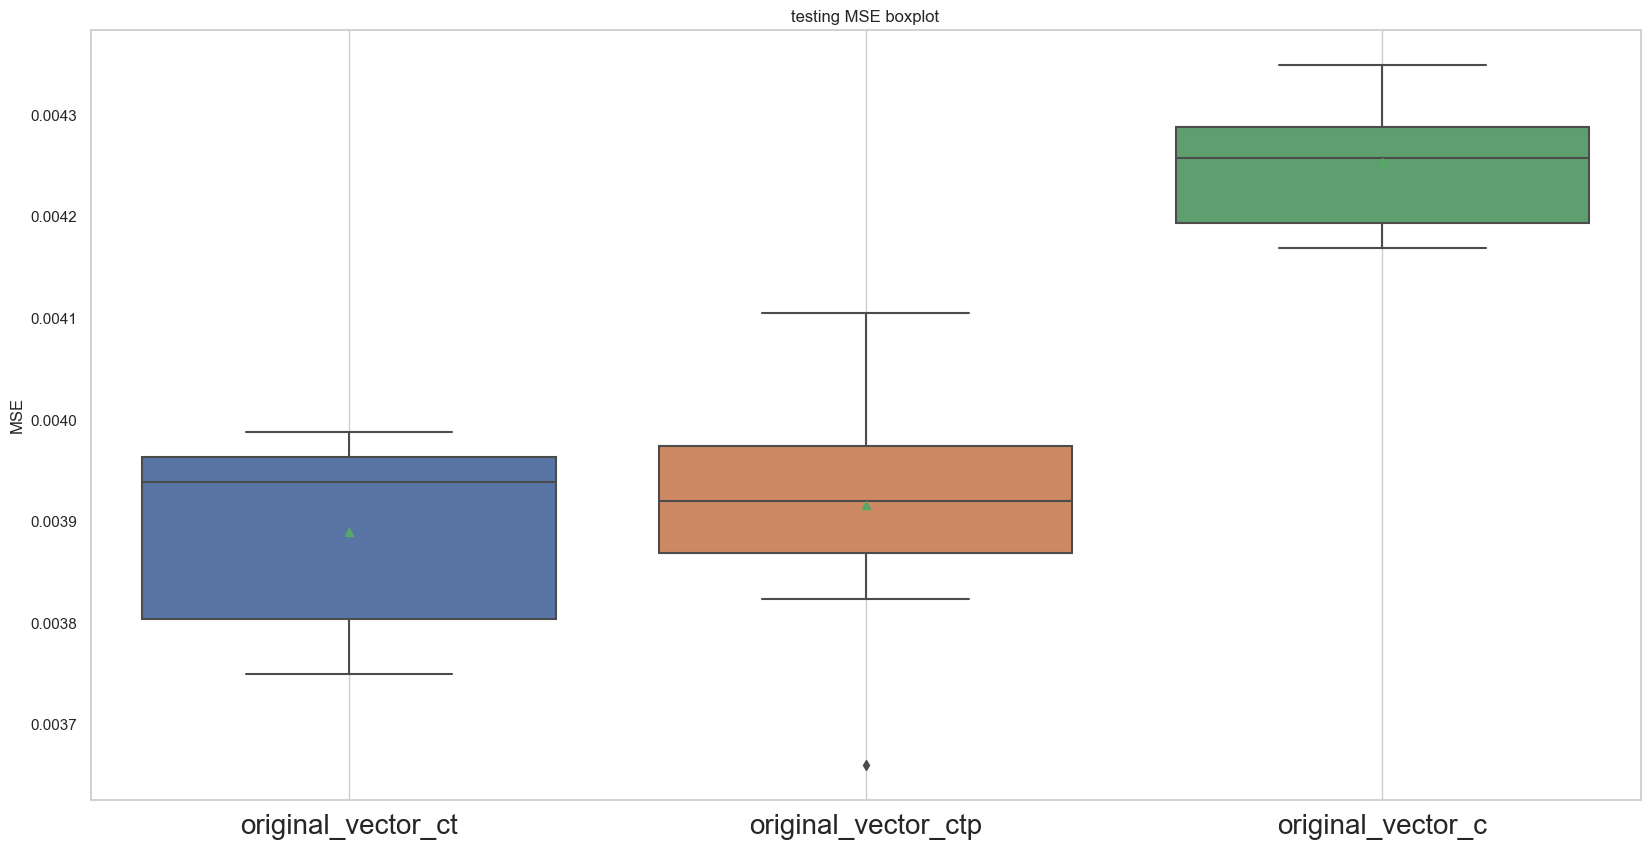

In [230]:
boxplot_test(mse_dict_origin_nt, True, 20, 0)

### Comparing MSE boxplot for four models based on concatenating index PEV at axis 1.

In [244]:
mse_dict = {
    "index_concatenate_ct": s1_index_concatenate_ct,
    "index_concatenate_ctp": s1_index_concatenate_ctp,
    "index_concatenate_c": s1_index_concatenate_c,
    "index_concatenate_t": s1_index_concatenate_t,
}
mse_dict_nt = {
    "index_concatenate_ct": s1_index_concatenate_ct,
    "index_concatenate_ctp": s1_index_concatenate_ctp,
    "index_concatenate_c": s1_index_concatenate_c,
}

In [245]:
mse_dict = sort_testing_MSE_dict(mse_dict)
mse_dict_nt = sort_testing_MSE_dict(mse_dict_nt)

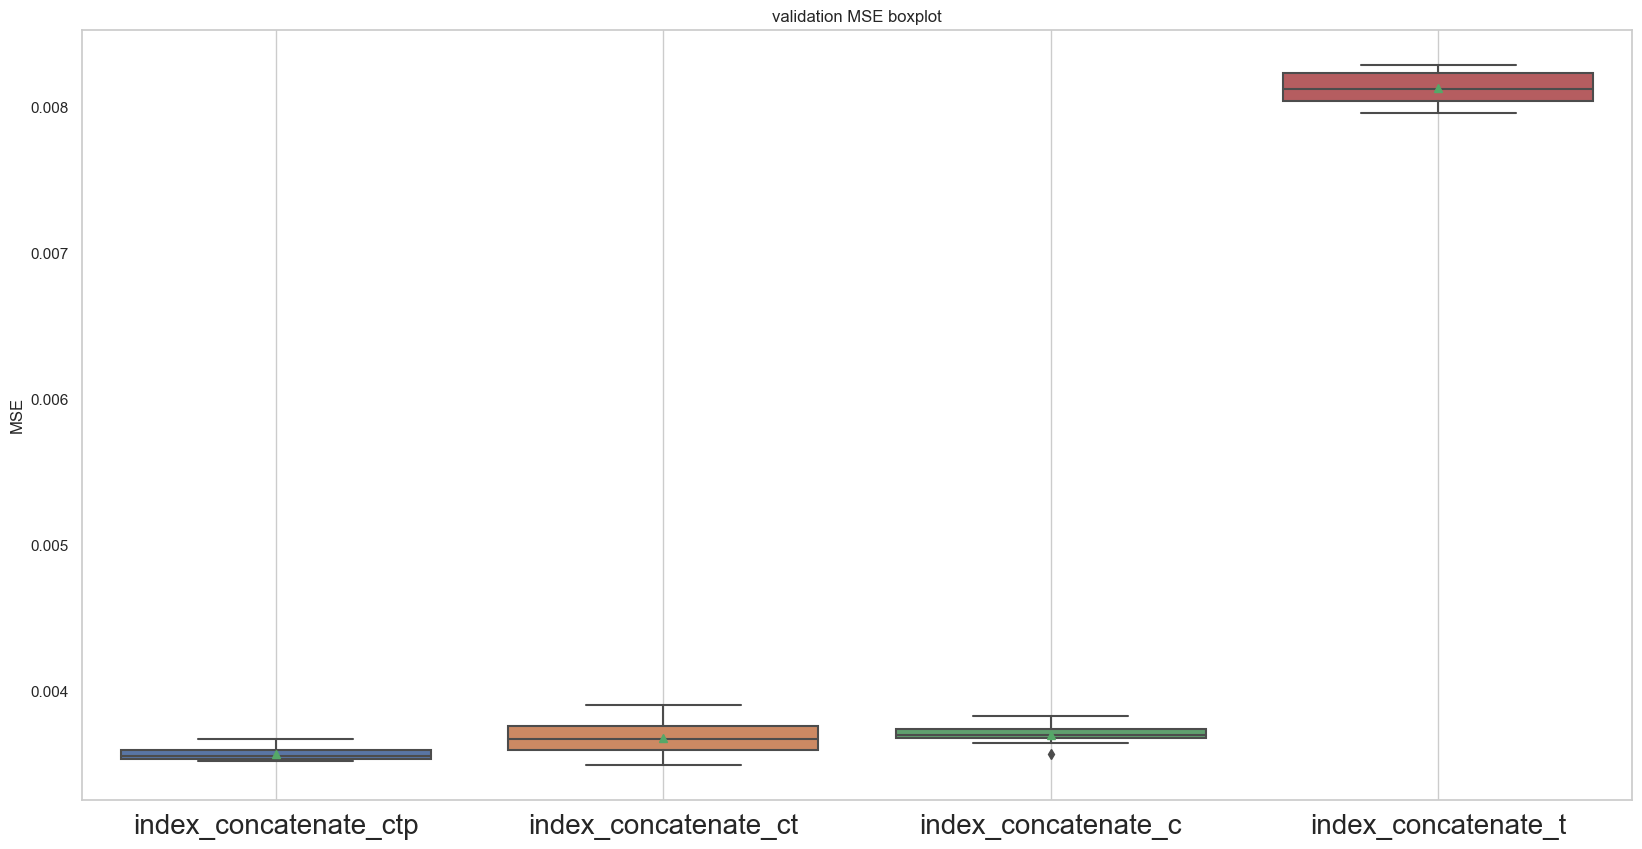

In [246]:
boxplot_vali(mse_dict, True, 20, 0)

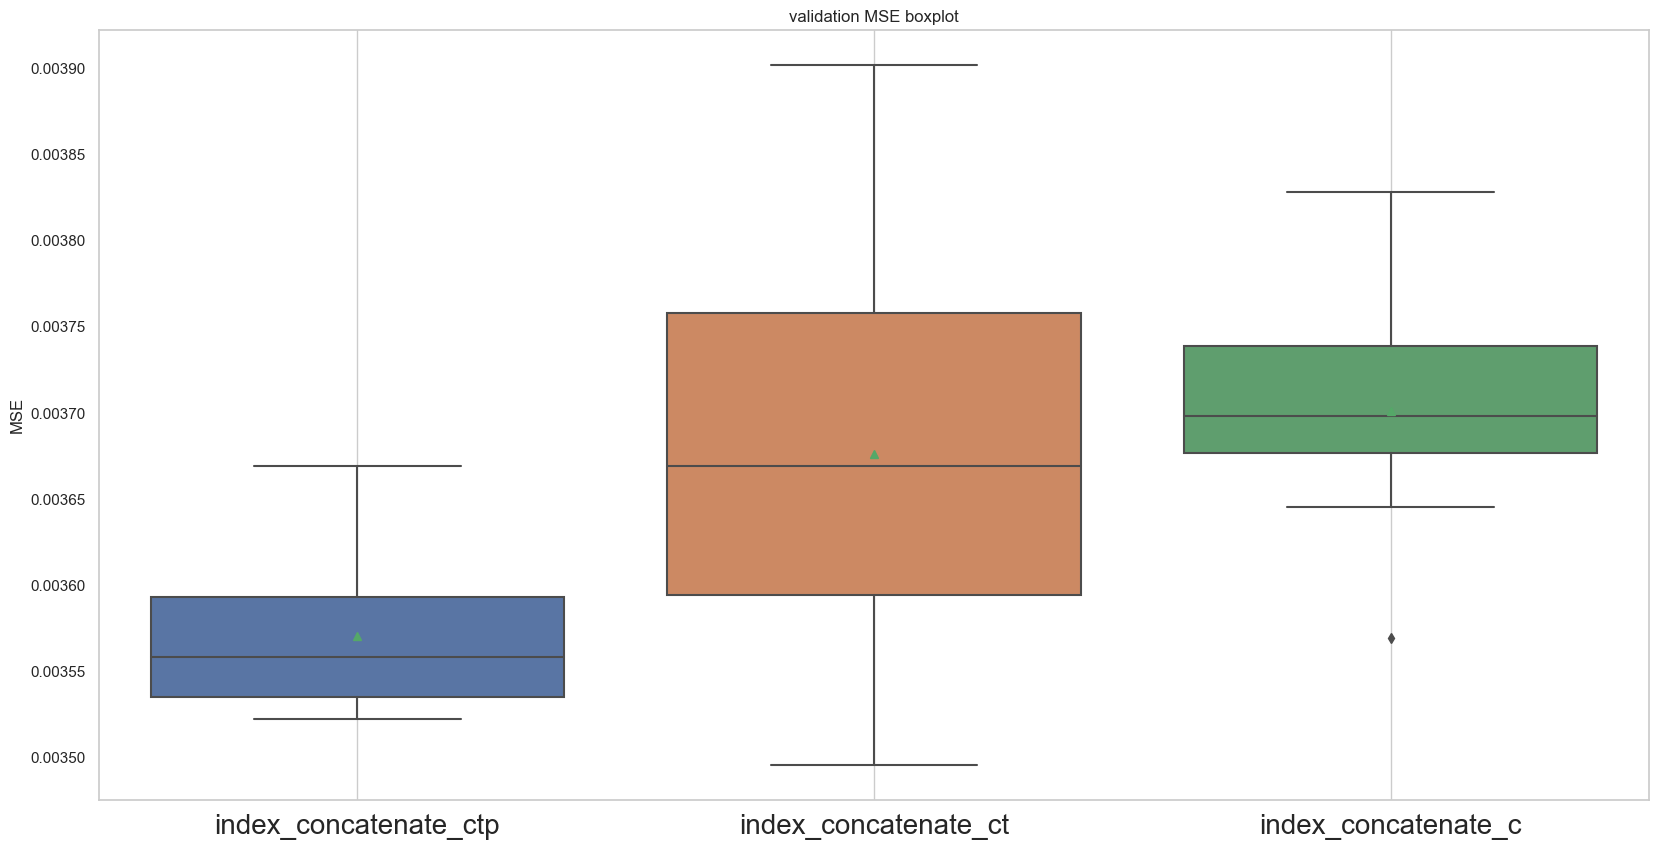

In [247]:
boxplot_vali(mse_dict_nt, True, 20, 0)

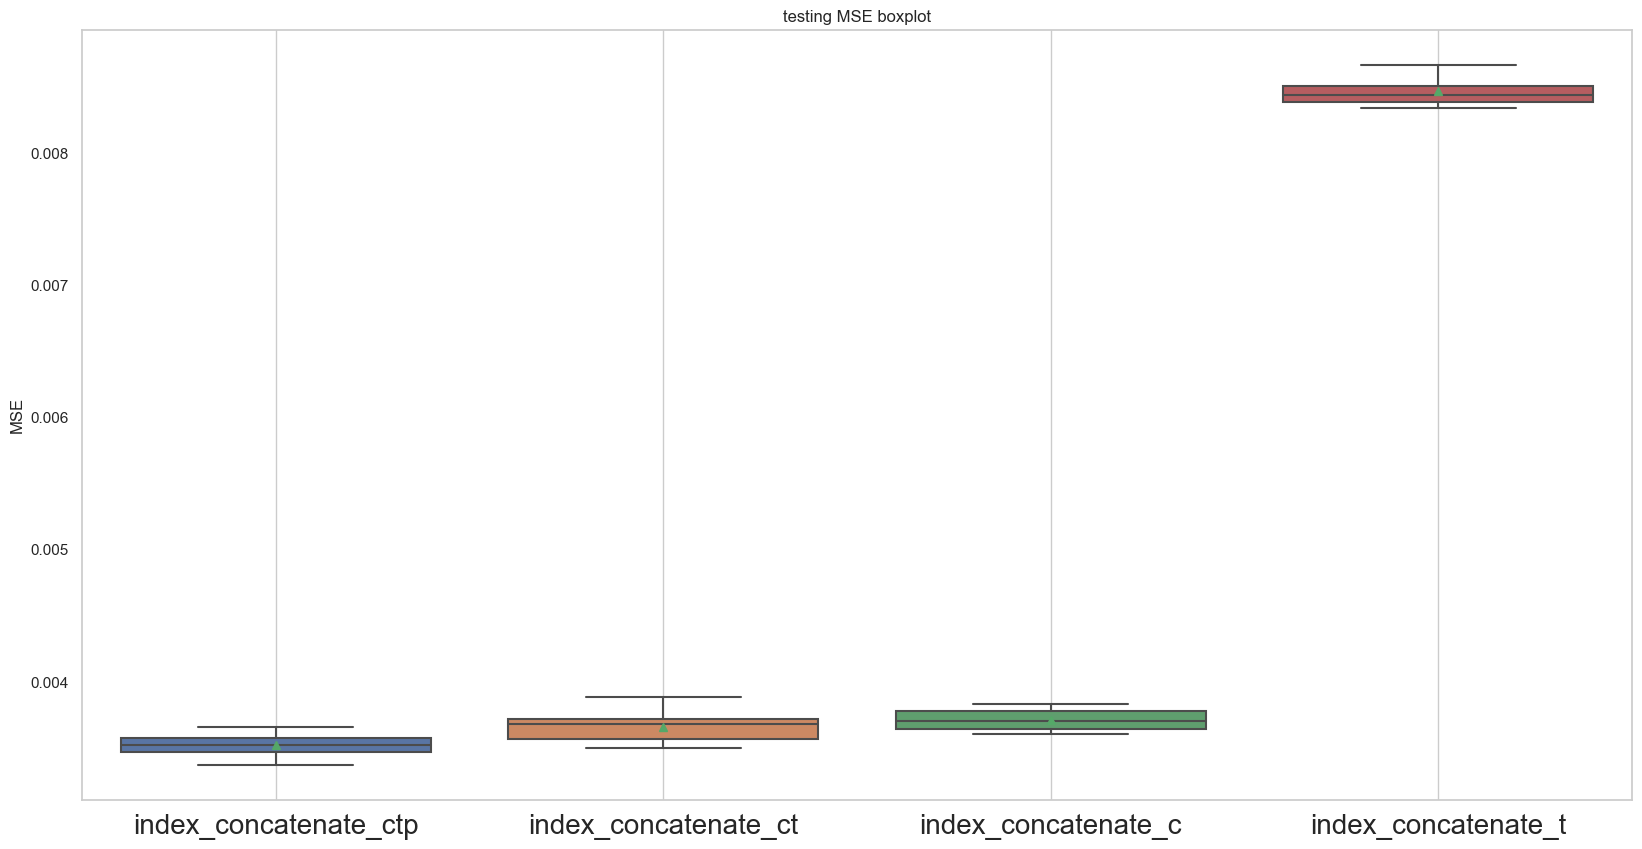

In [248]:
boxplot_test(mse_dict, True, 20, 0)

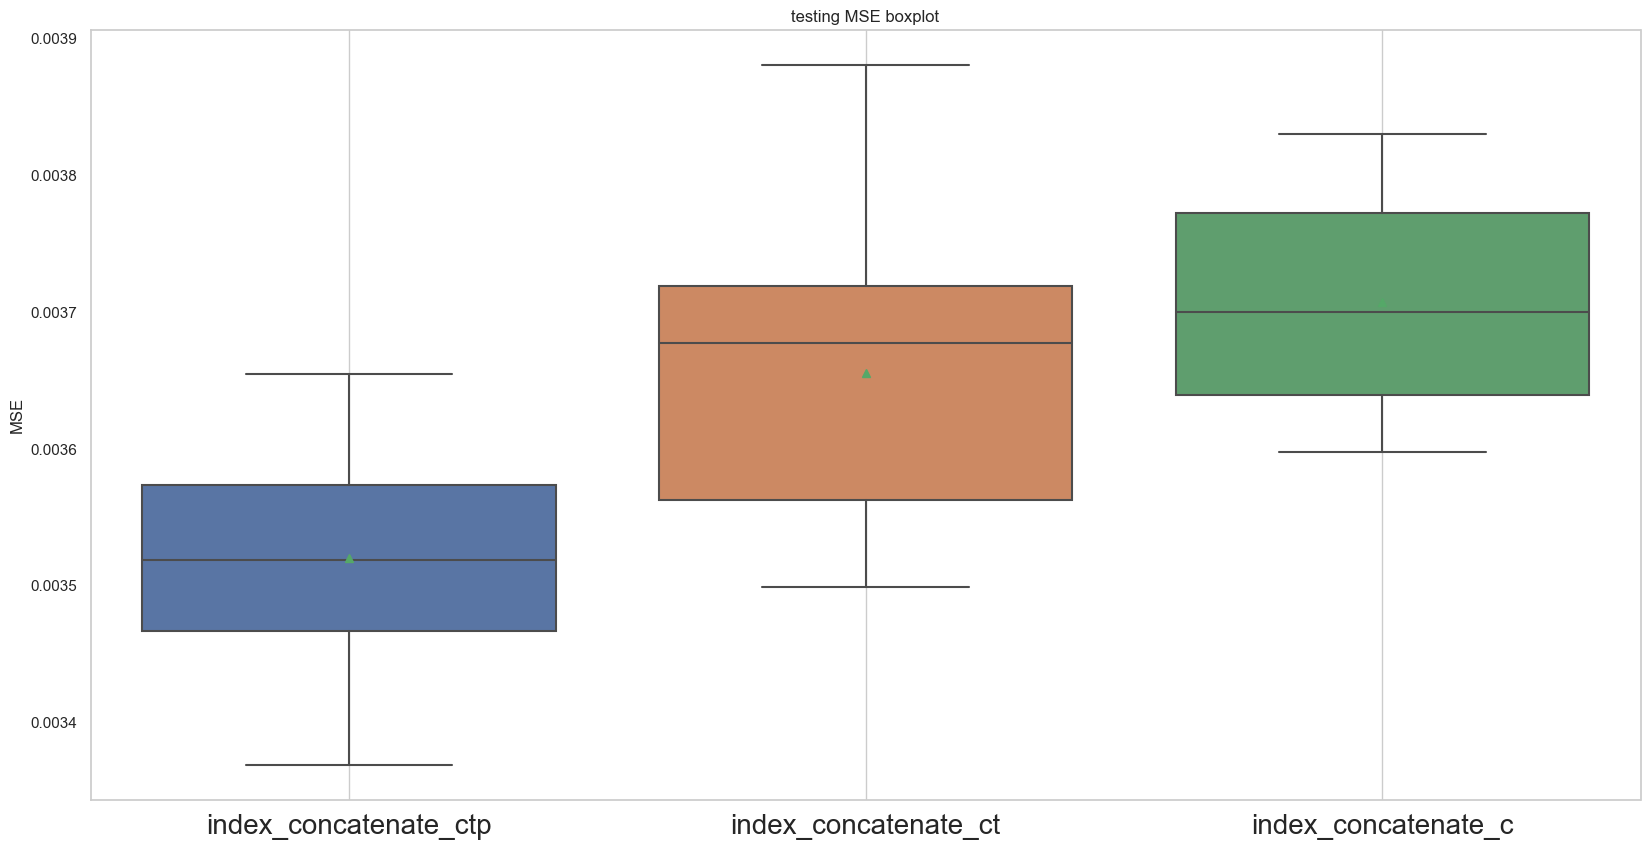

In [249]:
boxplot_test(mse_dict_nt, True, 20, 0)

### Print Testing MSE ranking from lowest to largest. 

In [186]:
 for x,y in mse_dict.items():
        y= y.to_numpy(copy=True)
        y = y[:,2]
        mean = np.mean(y)
        std = np.std(y)
        print("{:.9f}".format(mean),'+/-', "{:.6f}".format(std),' for ',x)

0.003655355 +/- 0.000111  for  index_concatenate_ct
0.003821914 +/- 0.000147  for  sinusoidal_concatenate_ct
0.003889571 +/- 0.000091  for  original_vector_ct
0.003892000 +/- 0.000098  for  index_add_ct
0.003915088 +/- 0.000082  for  polynomial_1_ct
0.003940820 +/- 0.000100  for  sinusoidal_add_ct
0.004008438 +/- 0.000111  for  polynomial_0_ct
0.004723759 +/- 0.000148  for  learnable_add_ct


# PART 6: Converge speed comparison for different models (using original vector as data representation)

### Representation 1: original vector (no positional encoding)

In [126]:
def plott_index(dictt, ti, mode, indexx):
    plt.figure(figsize=(10,5))
    for x, y in dictt.items():
        index = 0
        y = np.array(y)
        if(mode=='train'):
            y = y[:, 1]
        elif(mode=='vali'):
            y = y[:, 2]
        else:
            y = y[:, 3]
        #print(x)
        #print(y)
        for i in range(0, 9):
            t = y[index: index+80]
            if(indexx==i):
                plt.plot(t, label=f'{x} in trail {i}')
                plt.grid()
            index=index+80

    plt.title(f'{mode} MSE in trail {indexx}')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

In [127]:
def plott_mean(dictt, ti, mode):
    plt.figure(figsize=(10,5))
    for x, y in dictt.items():
        index = 0
        y = np.array(y)
        fina = np.zeros((80,))
        if(mode=='train'):
            y = y[:, 1]
        elif(mode=='vali'):
            y = y[:, 2]
        else:
            y = y[:, 3]
        for i in range(0, 9):
            t = y[index: index+80]
            fina = fina + (t*0.1)
            index=index+80
        plt.plot(t, label=f'{x} in trail {i}')
        plt.grid()
    plt.title(f'{mode} MSE mean')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

In [128]:
s2_no_pe_ct = pd.read_csv(cnn_transformer_path+"s2_no_pe_process_ct.csv")
s2_no_pe_ctp = pd.read_csv(cnn_transformer_pe_path+"s2_no_pe_whole_ctp.csv")
s2_no_pe_c = pd.read_csv(cnn_path+"no_pe_whole_s2.csv")
s2_no_pe_t = pd.read_csv(transformer_path+"s2_no_pe_process.csv")

In [129]:
dicct_origin = {
    's2_no_pe_ct': s2_no_pe_ct,
    's2_no_pe_ctp':s2_no_pe_ctp,
    's2_no_pe_c':s2_no_pe_c,
    's2_no_pe_t':s2_no_pe_t,
}

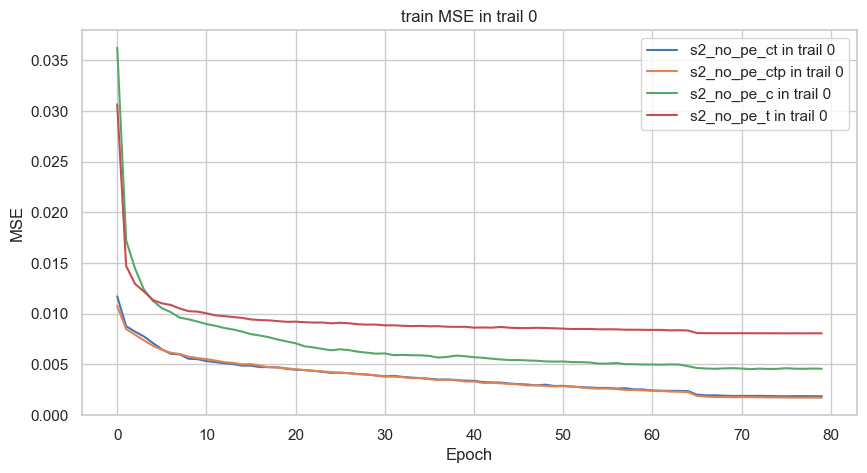

In [130]:
plott_index(dicct_origin, ti='original vector', mode='train', indexx = 0)

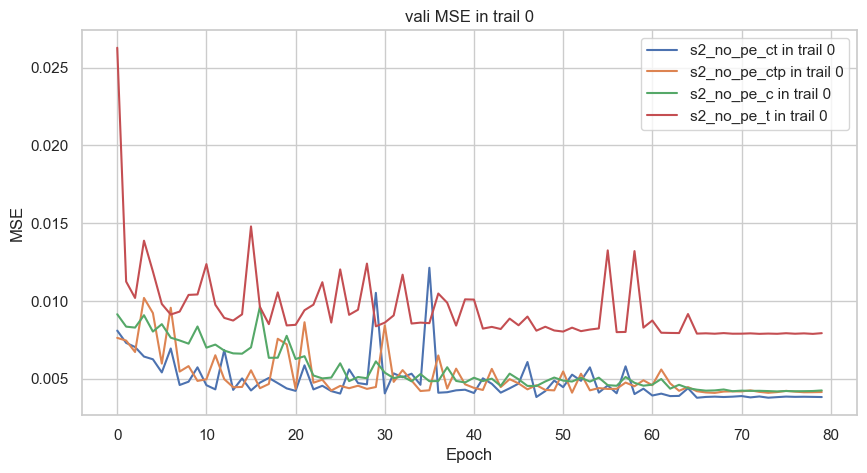

In [131]:
plott_index(dicct_origin, ti='original vector', mode='vali', indexx = 0)

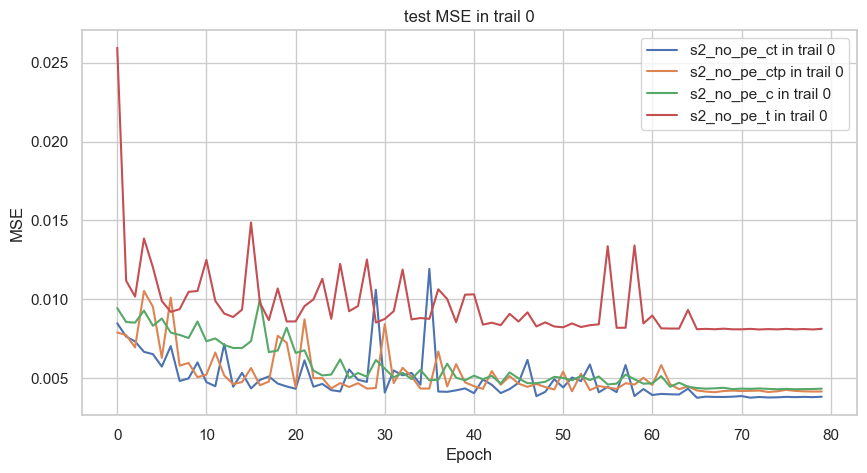

In [132]:
plott_index(dicct_origin, ti='original vector', mode='test', indexx = 0)

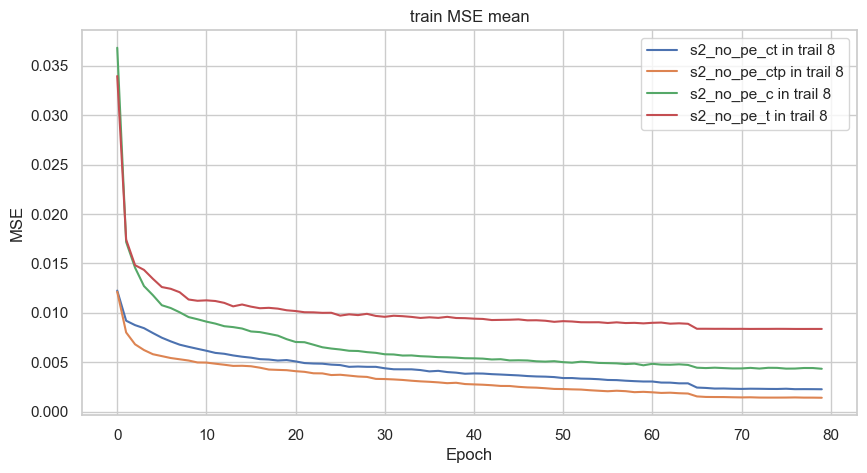

In [133]:
plott_mean(dicct_origin, ti='original vector', mode='train')

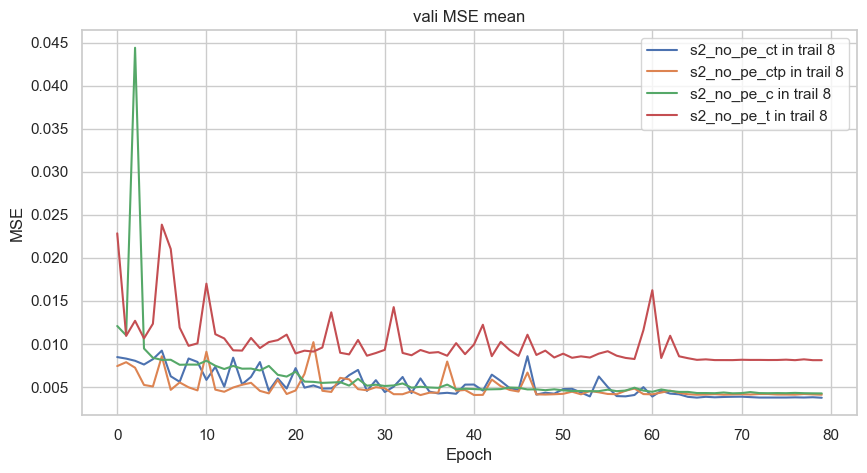

In [134]:
plott_mean(dicct_origin, ti='original vector', mode='vali')

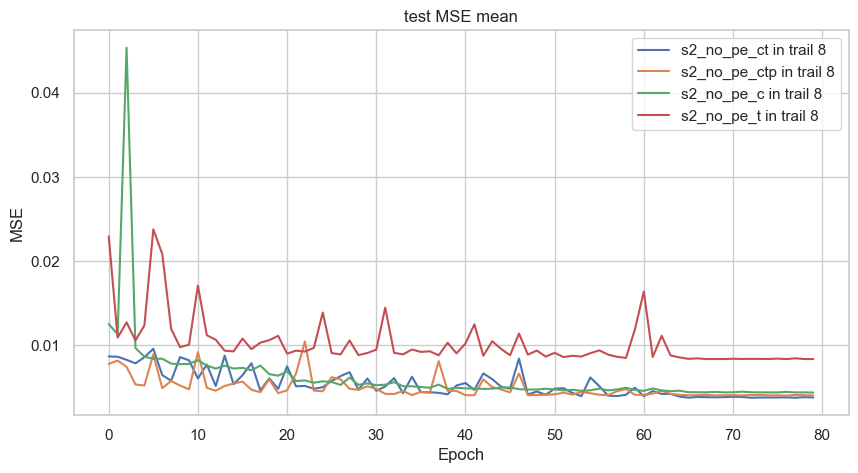

In [135]:
plott_mean(dicct_origin, ti='original vector', mode='test')